In [230]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import poisson
from astropy.io import ascii
#from sklearn.linear_model import LinearRegression
#import seaborn as sns
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from scipy.odr import *
import os
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord, search_around_sky
def match_catalogs(samp_x, samp_y, cat_x, cat_y, max_sep=0.1*u.arcsec):
    if not isinstance(max_sep, astropy.units.quantity.Quantity):
        max_sep = max_sep * u.degree
    sample = SkyCoord(ra=samp_x*u.degree, dec=samp_y*u.degree)
    catalog = SkyCoord(ra=cat_x*u.degree, dec=cat_y*u.degree)
    idx, d2d, d3d = sample.match_to_catalog_sky(catalog)
    samp_sel = d2d < max_sep
    return samp_sel, idx

def count_catalogs(samp_x, samp_y, cat_x, cat_y, max_sep=0.1*u.arcsec):
    if not isinstance(max_sep, astropy.units.quantity.Quantity):
        max_sep = max_sep * u.degree
    sample = SkyCoord(ra=samp_x*u.degree, dec=samp_y*u.degree)
    catalog = SkyCoord(ra=cat_x*u.degree, dec=cat_y*u.degree)
    #idx, d2d, d3d = sample.search_around_sky(catalog)
    #samp_sel = d2d < max_sep
    idx_obj, idx_cat, sep2d, _ = search_around_sky(sample, catalog, max_sep)
    counts = np.bincount(idx_obj, minlength=len(sample))
    return np.array(counts)
    #return samp_sel, idx
#import seaborn as sns
from scipy import stats

In [2]:
#hduweb=fits.open(' COSMOSWeb_mastercatalog_v1_lephare.fits')
hdu=fits.open('COSMOSWeb_mastercatalog_v1_photom_primary.fits')
#hduweb.info()
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2843 / length of dimension 1                          
NAXIS2  =               784016 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  287 / number of table fields                         
EXTNAME = 'PHOTOMETRY HOTCOLD AND SE++' / extension name                        
TTYPE1  = 'id      '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'segment-id'                                                          
TFORM2  = 'K       '        

In [56]:


max(hdu[1].data['id'])

784015

In [57]:
min(hdu[1].data['id'])

0

In [58]:
len(hdu[1].data['id'])

784016

In [59]:
dftab = pd.read_csv('passageincosmosweb.dat', sep='\t')
dftab
#dfcw.to_csv('passageincosmosweb_finalizedz_forpeter_final.dat', sep='\t', index=False)

index   objid  redshift  redshift_error      ra_obj   dec_obj  \
0         1     9.0   1.97364         0.00025  150.142183  2.476540   
1         2    31.0   0.81933         0.00000  150.143154  2.478128   
2         3    91.0   2.11985         0.00115  150.144131  2.480157   
3         4   143.0   2.13190         0.00000  150.133466  2.481628   
4         5   183.0   1.96633         0.00053  150.126745  2.482093   
...     ...     ...       ...             ...         ...       ...   
1291   2179  2000.0   2.34045         0.00000  149.709534  2.065826   
1292   2180  2044.0   1.96392         0.00000  149.714962  2.066504   
1293   2181  2117.0   2.99858         0.00157  149.715759  2.067628   
1294   2184  2365.0   2.67948         0.00206  149.708403  2.070837   
1295   2186  2608.0   1.83314         0.00000  149.703272  2.073770   

      snr_tot_others    snr_OII   snr_OIII     snr_Hb  ...  emline_flag  \
0              41.54  24.607843  52.884615  11.690141  ...          1.0   
1               8.65  -1.000000  -1.000000  -1.000000  ...          4.0   
2              10.53   3.012912  11.250000   1.484127  ...          2.0   
3               9.00   8.907035   9.005848   0.035373  ...          1.0   
4              17.62  18.614719  20.941176   6.349206  ...          1.0   
...              ...        ...        ...        ...  ...          ...   
1291            6.19  -1.000000  -1.000000  -1.000000  ...          4.0   
1292            6.43  -1.000000  -1.000000  -1.000000  ...          4.0   
1293            6.67  -1.000000   6.653465   1.378109  ...          3.0   
1294            6.09  -1.000000   7.247619   3.213920  ...          2.0   
1295            0.00  -1.000000  -1.000000  -1.000000  ...          4.0   

         Par    cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
0     Par024  150.142181   2.476513  431674.0   1.6867  24.219292      1.6867   
1     Par024  150.143155   2.478125  431943.0   1.6826  27.680216      1.6826   
2     Par024  150.144135   2.480148  432297.0   2.3428  25.440988      2.3428   
3     Par024  150.133470   2.481622  431949.0   2.1160  25.157714      2.1160   
4     Par024  150.126745   2.482088  431684.0   1.4427  25.892424      1.4427   
...      ...         ...        ...       ...      ...        ...         ...   
1291  Par049  149.709518   2.065808  204600.0   1.6346  26.302782      1.6346   
1292  Par049  149.714961   2.066507  204957.0   1.0340  23.220630      1.0340   
1293  Par049  149.715753   2.067623  205127.0   2.9463  27.758898      2.9463   
1294  Par049  149.708408   2.070833  205213.0   3.0175  26.664479      3.0175   
1295  Par049  149.703275   2.073782  205491.0   0.3658  24.291948      0.3658   

      cosmoszlow  cosmoszup  
0         1.6800     1.7000  
1         1.1410     1.9177  
2         2.3110     2.3612  
3         2.0821     2.1656  
4         1.4078     1.9876  
...          ...        ...  
1291      1.6008     1.6428  
1292      0.9930     1.0400  
1293      2.8249     3.0354  
1294      2.8819     3.1190  
1295      0.1004     1.2607  

[1296 rows x 23 columns]

In [60]:
dftab[dftab['redshift']>4.5]

index   objid  redshift  redshift_error      ra_obj   dec_obj  \
690    921  2038.0   4.65045             0.0  150.100964  2.419427   

     snr_tot_others    snr_OII  snr_OIII  snr_Hb  ...  emline_flag     Par  \
690           78.36  31.067961      -1.0    -1.0  ...          4.0  Par028   

       cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
690  150.100969   2.419415  650143.0    -99.0  22.625453      1.2799   

     cosmoszlow  cosmoszup  
690        1.27     1.2871  

[1 rows x 23 columns]

In [3]:
hdu2=fits.open('COSMOSWeb_mastercatalog_v1_lephare.fits')
#hduweb.info()
hdu2[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  344 / length of dimension 1                          
NAXIS2  =               784016 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   43 / number of table fields                         
EXTNAME = 'LEPHARE '           / extension name                                 
TTYPE1  = 'zfinal  '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'type    '                                                            
TFORM2  = 'K       '        

(0.0, 20.0)

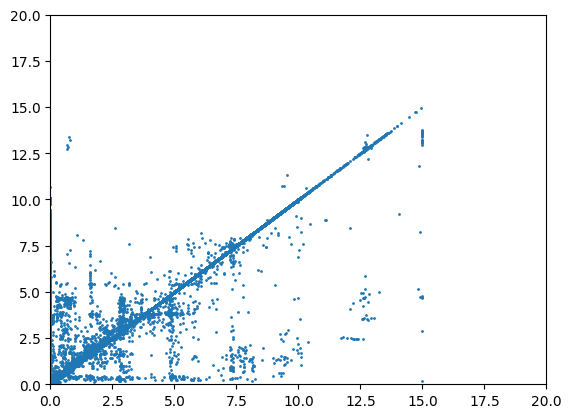

In [559]:
plt.scatter(hdu2[1].data['zfinal'],hdu2[1].data['zpdf_med'],s=1)
plt.xlim(0,20)
plt.ylim(0,20)


In [4]:
hdu20=fits.open('COSMOS2020_CLASSIC_R1_v2.2_p3.fits')
hdu20[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3491 / length of dimension 1                          
NAXIS2  =              1720700 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  754 / number of table fields                         
EXTNAME = 'PHASE3CATALOG'                                                       
TTYPE1  = 'ID      '                                                            
TCOMM1  = 'ID (specifically ID_CLASSIC, as this is the Classic catalogue)'      
TUCD1   = 'meta.id;meta.main'                                                   
TFORM1  = 'K       '        

In [613]:
colstokeep=["objid","redshift",'redshift_error','ra_obj','dec_obj','emline_flag','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII']#,'snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','pb_12822_flux',

file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df1 = df1[colstokeep]
df1['Par']  = ['Par024' for _ in range(len(df1))]

file_path_class1 = 'Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df2 = df2[colstokeep]
df2['Par']  = ['Par051' for _ in range(len(df2))]

file_path_class1 = 'Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df3 = df3[colstokeep]
df3['Par']  = ['Par025' for _ in range(len(df3))]

file_path_class1 = 'Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df4 = df4[colstokeep]
df4['Par']  = ['Par023' for _ in range(len(df4))]

file_path_class1 = 'Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df5 = df5[colstokeep]
df5['Par']  = ['Par053' for _ in range(len(df5))]

file_path_class1 = 'Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df6 = df6[colstokeep]
df6['Par']  = ['Par026' for _ in range(len(df6))]

file_path_class1 = 'Par003lines_reconciled_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df7 = df7[colstokeep]
df7['Par']  = ['Par003' for _ in range(len(df7))]

file_path_class1 = 'Par028lines_reconciled_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df8 = df8[colstokeep]
df8['Par']  = ['Par028' for _ in range(len(df8))]

file_path_class1 = 'Par052lines_reconciled_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df9 = df9[colstokeep]
df9['Par']  = ['Par052' for _ in range(len(df9))]

file_path_class1 = 'Par017lines_reconciled_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df10 = df10[colstokeep]
df10['Par']  = ['Par017' for _ in range(len(df10))]

file_path_class1 = 'Par005lines_reconciled_with_flags.dat'
df11 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df11 = df11[colstokeep]
df11['Par']  = ['Par005' for _ in range(len(df11))]

file_path_class1 = 'Par006lines_reconciled_with_flags.dat'
df12 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df12 = df12[colstokeep]
df12['Par']  = ['Par006' for _ in range(len(df12))]

file_path_class1 = 'Par020lines_reconciled_with_flags.dat'
df13 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df13 = df13[colstokeep]
df13['Par']  = ['Par020' for _ in range(len(df13))]

file_path_class1 = 'Par029lines_reconciled_with_flags.dat'
df14 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df14 = df14[colstokeep]
df14['Par']  = ['Par029' for _ in range(len(df14))]

file_path_class1 = 'Par049lines_reconciled_with_flags.dat'
df15 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df15 = df15[colstokeep]
df15['Par']  = ['Par049' for _ in range(len(df15))]
# 
df = pd.concat([df7,df11,df12,df10,df13,df4,df1,df3,df6,df8,df14,df15,df2,df9,df5], ignore_index=True)#df6,df14
allowed = [1,2,3,4]
df = df[df['emline_flag'].isin(allowed)]

df = df[df['objid'] != 801]#removes duplicate object
#df
df.loc[df['redshift'] >4.6, 'emline_flag'] = '1'#adjusts agn to flag of 1

df['index'] = range(len(df['redshift']))
df = df.reset_index()
df




<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
<>:59: SyntaxWarning: invalid escape sequence '\s'
<>:64: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escap

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

     emline_flag  snr_OII   snr_OIII    snr_Hb     snr_Ha  snr_Pb  snr_SIII  \
0            4.0     -1.0   3.457944  1.469012  -1.000000    -1.0      -1.0   
1            4.0     -1.0   4.851190  1.674641  -1.000000    -1.0      -1.0   
2            3.0     -1.0   7.933333  0.667727  -1.000000    -1.0      -1.0   
3            4.0     -1.0  -1.000000 -1.000000   6.531915    -1.0      -1.0   
4            4.0     -1.0  -1.000000 -1.000000   9.038095    -1.0      -1.0   
...          ...      ...        ...       ...        ...     ...       ...   
2179         3.0     -1.0   7.504673  0.000000  -1.000000    -1.0      -1.0   
2180         2.0     -1.0  10.386740  2.271318  -1.000000    -1.0      -1.0   
2181         4.0     -1.0  -1.000000 -1.000000  11.651786    -1.0      -1.0   
2182         4.0     -1.0  -1.000000 -1.000000  10.322581    -1.0      -1.0   
2183         4.0     -1.0  -1.000000 -1.000000   6.029963    -1.0      -1.0   

         Par  index  
0     Par003      0  
1     Par003      1  
2     Par003      2  
3     Par003      3  
4     Par003      4  
...      ...    ...  
2179  Par053   2179  
2180  Par053   2180  
2181  Par053   2181  
2182  Par053   2182  
2183  Par053   2183  

[2184 rows x 15 columns]

In [633]:
df[df['snr_SIII']>2]#[df['snr_OII']<2][df['snr_OIII']<2][df['snr_Hb']<2][df['snr_SIII']<2][df['snr_Pb']<2]
len(df[df['snr_Ha']>5])

1223

In [634]:
df

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

     emline_flag  snr_OII   snr_OIII    snr_Hb     snr_Ha  snr_Pb  snr_SIII  \
0            4.0     -1.0   3.457944  1.469012  -1.000000    -1.0      -1.0   
1            4.0     -1.0   4.851190  1.674641  -1.000000    -1.0      -1.0   
2            3.0     -1.0   7.933333  0.667727  -1.000000    -1.0      -1.0   
3            4.0     -1.0  -1.000000 -1.000000   6.531915    -1.0      -1.0   
4            4.0     -1.0  -1.000000 -1.000000   9.038095    -1.0      -1.0   
...          ...      ...        ...       ...        ...     ...       ...   
2179         3.0     -1.0   7.504673  0.000000  -1.000000    -1.0      -1.0   
2180         2.0     -1.0  10.386740  2.271318  -1.000000    -1.0      -1.0   
2181         4.0     -1.0  -1.000000 -1.000000  11.651786    -1.0      -1.0   
2182         4.0     -1.0  -1.000000 -1.000000  10.322581    -1.0      -1.0   
2183         4.0     -1.0  -1.000000 -1.000000   6.029963    -1.0      -1.0   

         Par  index  
0     Par003      0  
1     Par003      1  
2     Par003      2  
3     Par003      3  
4     Par003      4  
...      ...    ...  
2179  Par053   2179  
2180  Par053   2180  
2181  Par053   2181  
2182  Par053   2182  
2183  Par053   2183  

[2184 rows x 15 columns]

In [635]:
len([177, 237, 276, 612, 283, 260, 208, 275, 231, 894, 218, 251, 207, 850, 197])

15

In [ ]:
df
df.to_csv('passagezfinal.dat', index=False)

In [137]:
df.loc[df['redshift'] >4.6, 'emline_flag'] = '1'
df[df['redshift']>4.6]

index   objid  redshift  redshift_error      ra_obj   dec_obj  \
829    921  2038.0   4.65045             0.0  150.100964  2.419427   

     snr_tot_others    snr_OII  snr_OIII  snr_Hb  snr_Ha  snr_Pb  snr_SIII  \
829           78.36  31.067961      -1.0    -1.0    -1.0    -1.0      -1.0   

    emline_flag     Par  
829           1  Par028

In [ ]:
#Make sure Pa are included in flagging (double check flag 9 although they are probably flag 4 with pab)
#remove duplicate object (Par026_00801)
#give agn a high flag
#rewrite index numbers to range


In [140]:
df[df['objid'] != 801]


index   objid  redshift  redshift_error      ra_obj   dec_obj  \
0         0     8.0   1.96988         0.00000  150.142174  2.476397   
1         1     9.0   1.97364         0.00025  150.142183  2.476540   
2         2    31.0   0.81933         0.00000  150.143154  2.478128   
3         3    91.0   2.11985         0.00115  150.144131  2.480157   
4         4   143.0   2.13190         0.00000  150.133466  2.481628   
...     ...     ...       ...             ...         ...       ...   
2179   2310  2275.0   1.72630         0.00141  149.689222  2.069251   
2180   2311  2365.0   2.67948         0.00206  149.708403  2.070837   
2181   2312  2529.0   2.87519         0.00000  149.691295  2.073345   
2182   2313  2608.0   1.83314         0.00000  149.703272  2.073770   
2183   2314  2703.0   1.72349         0.00315  149.695108  2.076333   

      snr_tot_others    snr_OII   snr_OIII     snr_Hb     snr_Ha  snr_Pb  \
0               7.33   4.067612   8.238994   1.587156  -1.000000    -1.0   
1              41.54  24.607843  52.884615  11.690141  -1.000000    -1.0   
2               8.65  -1.000000  -1.000000  -1.000000   8.640646    -1.0   
3              10.53   3.012912  11.250000   1.484127  -1.000000    -1.0   
4               9.00   8.907035   9.005848   0.035373  -1.000000    -1.0   
...              ...        ...        ...        ...        ...     ...   
2179           17.78  -1.000000  -1.000000  -1.000000  21.260997    -1.0   
2180            6.09  -1.000000   7.247619   3.213920  -1.000000    -1.0   
2181            4.45  -1.000000   5.026178   3.618785  -1.000000    -1.0   
2182            0.00  -1.000000  -1.000000  -1.000000   2.987179    -1.0   
2183            8.57  -1.000000  -1.000000  -1.000000   8.557047    -1.0   

      snr_SIII emline_flag     Par  
0         -1.0         2.0  Par024  
1         -1.0         1.0  Par024  
2         -1.0         4.0  Par024  
3         -1.0         2.0  Par024  
4         -1.0         1.0  Par024  
...        ...         ...     ...  
2179      -1.0         4.0  Par049  
2180      -1.0         2.0  Par049  
2181      -1.0         2.0  Par049  
2182      -1.0         4.0  Par049  
2183      -1.0         4.0  Par049  

[2184 rows x 15 columns]

In [133]:
df[df['objid']==801]

Empty DataFrame
Columns: [index, objid, redshift, redshift_error, ra_obj, dec_obj, snr_tot_others, snr_OII, snr_OIII, snr_Hb, snr_Ha, snr_Pb, snr_SIII, emline_flag, Par]
Index: []

In [116]:
samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

numbs=count_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

(array([ 766.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1296.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

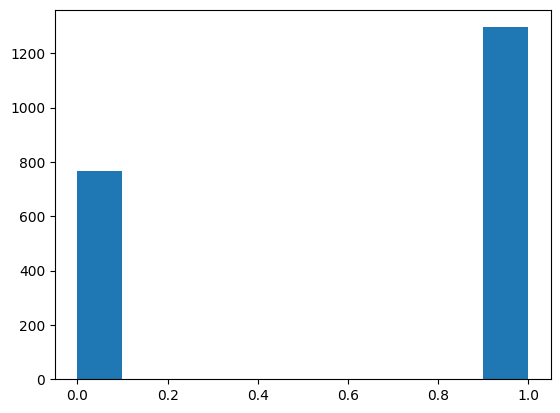

In [117]:
plt.hist(numbs)


In [268]:
file_path_class1 = 'passagezfinal.dat'
file_path_class1 = 'passagezfinal_updatedz.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#')
df

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  
0     -1.000000          4.0  Par003      0  
1     -1.000000          4.0  Par003      1  
2     -1.000000          3.0  Par003      2  
3      6.531915          4.0  Par003      3  
4      9.038095          4.0  Par003      4  
...         ...          ...     ...    ...  
2179  -1.000000          3.0  Par053   2179  
2180  -1.000000          2.0  Par053   2180  
2181  11.651786          4.0  Par053   2181  
2182  10.322581          4.0  Par053   2182  
2183   6.029963          4.0  Par053   2183  

[2184 rows x 10 columns]

In [185]:
file_path_class1 = 'passagezfinal.dat'
#file_path_class1 = 'passagezfinal_updatedz.dat'
file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#')
#df

samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]

tt45 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt45[sel_samp] = hdu[1].data['warn_flag'][idx[sel_samp]]


df['cosmosra']=tt
df['cosmosdec']=tt2
df['cosmosid']=tt3
df['cosmosz']=tt4
df['cosmoshst']=tt44
df['cosmoszmed']=tt5
df['cosmoszlow']=tt6
df['cosmoszup']=tt7
df['warn_flag']=tt45

df


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  ...  emline_flag_best  \
0     -1.000000          4.0  Par003      0  ...               4.0   
1     -1.000000          4.0  Par003      1  ...               4.0   
2     -1.000000          3.0  Par003      2  ...               3.0   
3      6.531915          4.0  Par003      3  ...               4.0   
4      9.038095          4.0  Par003      4  ...               4.0   
...         ...          ...     ...    ...  ...               ...   
2178  -1.000000          3.0  Par053   2179  ...               3.0   
2179  -1.000000          2.0  Par053   2180  ...               2.0   
2180  11.651786          4.0  Par053   2181  ...               4.0   
2181  10.322581          4.0  Par053   2182  ...               1.5   
2182   6.029963          4.0  Par053   2183  ...               1.5   

        cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
0     150.410715   2.384564  511464.0   0.1172  25.211860      0.1172   
1     150.410797   2.384621  511465.0   2.1090  25.216494      2.1090   
2     150.415515   2.387915  512161.0   0.6671  27.743172      0.6671   
3     150.406756   2.387884  511697.0   2.9169  25.966786      2.9169   
4     150.422776   2.389848  512848.0   3.1868  25.964520      3.1868   
...          ...        ...       ...      ...        ...         ...   
2178   -1.000000  -1.000000      -1.0  -1.0000  -1.000000     -1.0000   
2179   -1.000000  -1.000000      -1.0  -1.0000  -1.000000     -1.0000   
2180  150.117799   1.806220  311236.0   2.2941  26.928000      2.2941   
2181  150.105874   1.808868  311071.0   3.8818  24.959286      3.8818   
2182  150.108506   1.810472  311327.0   3.4153  25.855949      3.4153   

      cosmoszlow  cosmoszup  warn_flag  
0         0.0454     0.1836        0.0  
1         2.0293     2.2053        0.0  
2         0.4550     0.7600        0.0  
3         2.7610     3.0821        0.0  
4         3.0388     3.4203        0.0  
...          ...        ...        ...  
2178     -1.0000    -1.0000       -1.0  
2179     -1.0000    -1.0000       -1.0  
2180      0.2840     2.6514        0.0  
2181      3.7380     3.9778        0.0  
2182      3.3540     3.4581        0.0  

[2183 rows x 21 columns]

In [187]:
np.unique(np.array(df['warn_flag']))

array([-1.,  0.,  1.,  2.,  4.])

In [589]:
file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#')
field='Par053'
print(len(df[df['emline_flag_best']==1.5][df['zbest']!=df['redshift']][df['Par']==field]))
df#[df['emline_flag_best']==1.5][df['zbest']!=df['redshift']][df['Par']==field]

7


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1677297913.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df['emline_flag_best']==1.5][df['zbest']!=df['redshift']][df['Par']==field]))
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1677297913.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df['emline_flag_best']==1.5][df['zbest']!=df['redshift']][df['Par']==field]))


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  
0     -1.000000          4.0  Par003      0  2.963650               4.0  
1     -1.000000          4.0  Par003      1  2.973340               4.0  
2     -1.000000          3.0  Par003      2  3.363050               3.0  
3      6.531915          4.0  Par003      3  2.166660               4.0  
4      9.038095          4.0  Par003      4  1.907170               4.0  
...         ...          ...     ...    ...       ...               ...  
2179  -1.000000          3.0  Par053   2179  2.855520               3.0  
2180  -1.000000          2.0  Par053   2180  3.244230               2.0  
2181  11.651786          4.0  Par053   2181  1.739150               4.0  
2182  10.322581          4.0  Par053   2182  3.788742               1.5  
2183   6.029963          4.0  Par053   2183  3.351100               1.5  

[2184 rows x 12 columns]

In [605]:
field='Par053'
print(len(df[df['emline_flag_best']==3][df['Par']==field]))
#df

9


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1465878860.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df['emline_flag_best']==3][df['Par']==field]))


In [444]:
allowed=[1,2,3,4]

dfcw=df[df['cosmosid'] != -1]
#dfcw=dfcw[dfcw['emline_flag'].isin(allowed)]
#dfcw=dfcw
dfcw


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2169     2300  2764.0   2.58084         0.00106  150.111570  1.809054   
2170     2301  2836.0   2.76117         0.00049  150.097342  1.811004   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2169  -1.000000          3.0  Par053   2169  2.580840               3.0   
2170  -1.000000          2.0  Par053   2170  2.761170               2.0   
2181  11.651786          4.0  Par053   2181  1.739150               4.0   
2182  10.322581          4.0  Par053   2182  3.788742               1.5   
2183   6.029963          4.0  Par053   2183  3.351100               1.5   

        cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
0     150.410715   2.384564  511464.0   0.1172  25.211860      0.1172   
1     150.410797   2.384621  511465.0   2.1090  25.216494      2.1090   
2     150.415515   2.387915  512161.0   0.6671  27.743172      0.6671   
3     150.406756   2.387884  511697.0   2.9169  25.966786      2.9169   
4     150.422776   2.389848  512848.0   3.1868  25.964520      3.1868   
...          ...        ...       ...      ...        ...         ...   
2169  150.111577   1.809041  311291.0   2.6624  25.325308      2.6624   
2170  150.097345   1.811002  310970.0   2.7442  26.251591      2.7442   
2181  150.117799   1.806220  311236.0   2.2941  26.928000      2.2941   
2182  150.105874   1.808868  311071.0   3.8818  24.959286      3.8818   
2183  150.108506   1.810472  311327.0   3.4153  25.855949      3.4153   

      cosmoszlow  cosmoszup  
0         0.0454     0.1836  
1         2.0293     2.2053  
2         0.4550     0.7600  
3         2.7610     3.0821  
4         3.0388     3.4203  
...          ...        ...  
2169      2.5409     2.7304  
2170      2.6829     2.8077  
2181      0.2840     2.6514  
2182      3.7380     3.9778  
2183      3.3540     3.4581  

[1333 rows x 20 columns]

In [445]:
# Example 3: Custom delimiter (e.g., tab)
dfcw.to_csv('passageincosmosweb_finalizedz_forpeter_final.dat', sep='\t', index=False)



In [431]:
dfq=df
dfq=dfq[dfq['cosmosid'] == -1]
#dfq = dfq.reset_index()

samp_x = np.array(dfq['ra_obj'])#.data
samp_y = np.array(dfq['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



dfq['cosmos2020ra']=tt
dfq['cosmos2020dec']=tt2
dfq['cosmos2020id']=tt3
dfq['cosmos2020z']=tt4
dfq['cosmos2020hst']=tt44
dfq['cosmos2020zlow']=tt6
dfq['cosmos2020zup']=tt7
dfq



/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2188854151.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['cosmos2020ra']=tt
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2188854151.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['cosmos2020dec']=tt2
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2188854151.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
26         45  1439.0   2.03595         0.00117  150.427845  2.404654   
28         47  1721.0   1.96702         0.00227  150.398260  2.407479   
43         65  2684.0   3.34795         0.00000  150.412213  2.418843   
47         70    38.0   0.75611         0.00000  150.663636  2.060239   
48         71    61.0   0.83834         0.00055  150.660835  2.062183   
...       ...     ...       ...             ...         ...       ...   
2176     2308  1385.0   1.98953         0.00173  150.083750  1.791630   
2177     2309  1726.0   1.73094         0.00324  150.086634  1.792008   
2178     2310  1760.0   1.90693         0.00253  150.106729  1.795688   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   

         snr_Ha  emline_flag     Par  index  ...  cosmoszmed  cosmoszlow  \
26     7.627119          4.0  Par003     26  ...        -1.0        -1.0   
28     4.347458          4.0  Par003     28  ...        -1.0        -1.0   
43    -1.000000          4.0  Par003     43  ...        -1.0        -1.0   
47     9.261993          4.0  Par005     47  ...        -1.0        -1.0   
48    11.833333          4.0  Par005     48  ...        -1.0        -1.0   
...         ...          ...     ...    ...  ...         ...         ...   
2176   5.090909          4.0  Par053   2176  ...        -1.0        -1.0   
2177  10.333333          4.0  Par053   2177  ...        -1.0        -1.0   
2178   5.061728          4.0  Par053   2178  ...        -1.0        -1.0   
2179  -1.000000          3.0  Par053   2179  ...        -1.0        -1.0   
2180  -1.000000          2.0  Par053   2180  ...        -1.0        -1.0   

      cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
26         -1.0     -1.000000      -1.000000          -1.0      -1.0000   
28         -1.0     -1.000000      -1.000000          -1.0      -1.0000   
43         -1.0     -1.000000      -1.000000          -1.0      -1.0000   
47         -1.0    150.663634       2.060226      668627.0          NaN   
48         -1.0    150.660829       2.062186      669553.0       0.7782   
...         ...           ...            ...           ...          ...   
2176       -1.0    150.083743       1.791626      388114.0          NaN   
2177       -1.0    150.086707       1.791971      388541.0          NaN   
2178       -1.0    150.106742       1.795670      391486.0       2.9012   
2179       -1.0     -1.000000      -1.000000          -1.0      -1.0000   
2180       -1.0    150.096611       1.802626      398706.0       3.2625   

      cosmos2020hst  cosmos2020zlow  cosmos2020zup  
26        -1.000000         -1.0000        -1.0000  
28        -1.000000         -1.0000        -1.0000  
43        -1.000000         -1.0000        -1.0000  
47        24.397160          1.9204         2.1175  
48        24.456970          0.7423         0.8135  
...             ...             ...            ...  
2176      23.734461          1.0567         1.1628  
2177      24.747309          1.4914         1.5490  
2178      25.552387          2.7692         2.9978  
2179      -1.000000         -1.0000        -1.0000  
2180      25.735296          3.1249         3.4148  

[851 rows x 25 columns]

In [432]:
dfc2=dfq[dfq['cosmos2020id'] != -1]
#dfcw=dfcw[dfcw['emline_flag'].isin(allowed)]
#dfcw=dfcw
dfc2

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
47         70    38.0   0.75611         0.00000  150.663636  2.060239   
48         71    61.0   0.83834         0.00055  150.660835  2.062183   
51         74   126.0   0.79801         0.00000  150.657307  2.064484   
53         76   199.0   1.13512         0.00131  150.655040  2.066336   
54         77   223.0   1.11811         0.00126  150.651223  2.066586   
...       ...     ...       ...             ...         ...       ...   
2174     2306   822.0   1.08772         0.00047  150.107261  1.785705   
2176     2308  1385.0   1.98953         0.00173  150.083750  1.791630   
2177     2309  1726.0   1.73094         0.00324  150.086634  1.792008   
2178     2310  1760.0   1.90693         0.00253  150.106729  1.795688   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   

         snr_Ha  emline_flag     Par  index  ...  cosmoszmed  cosmoszlow  \
47     9.261993          4.0  Par005     47  ...        -1.0        -1.0   
48    11.833333          4.0  Par005     48  ...        -1.0        -1.0   
51    14.565826          4.0  Par005     51  ...        -1.0        -1.0   
53     7.126984          2.0  Par005     53  ...        -1.0        -1.0   
54     4.989011          2.0  Par005     54  ...        -1.0        -1.0   
...         ...          ...     ...    ...  ...         ...         ...   
2174  -1.000000          4.0  Par053   2174  ...        -1.0        -1.0   
2176   5.090909          4.0  Par053   2176  ...        -1.0        -1.0   
2177  10.333333          4.0  Par053   2177  ...        -1.0        -1.0   
2178   5.061728          4.0  Par053   2178  ...        -1.0        -1.0   
2180  -1.000000          2.0  Par053   2180  ...        -1.0        -1.0   

      cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
47         -1.0    150.663634       2.060226      668627.0          NaN   
48         -1.0    150.660829       2.062186      669553.0       0.7782   
51         -1.0    150.657304       2.064493      672268.0       0.8131   
53         -1.0    150.655014       2.066327      673500.0       1.8623   
54         -1.0    150.651201       2.066608      674794.0       1.0706   
...         ...           ...            ...           ...          ...   
2174       -1.0    150.107257       1.785699      381393.0       1.1013   
2176       -1.0    150.083743       1.791626      388114.0          NaN   
2177       -1.0    150.086707       1.791971      388541.0          NaN   
2178       -1.0    150.106742       1.795670      391486.0       2.9012   
2180       -1.0    150.096611       1.802626      398706.0       3.2625   

      cosmos2020hst  cosmos2020zlow  cosmos2020zup  
47        24.397160          1.9204         2.1175  
48        24.456970          0.7423         0.8135  
51        23.724409          0.7742         0.8437  
53        25.650965          1.7337         1.9831  
54        24.407507          1.0380         1.0954  
...             ...             ...            ...  
2174      24.586285          1.0771         1.1269  
2176      23.734461          1.0567         1.1628  
2177      24.747309          1.4914         1.5490  
2178      25.552387          2.7692         2.9978  
2180      25.735296          3.1249         3.4148  

[564 rows x 25 columns]

In [274]:
from collections import Counter
counts = Counter(dfc2['Par'])
print(counts)

Counter({'Par006': 104, 'Par020': 97, 'Par005': 89, 'Par029': 74, 'Par049': 32, 'Par053': 22, 'Par051': 19, 'Par028': 3, 'Par026': 2, 'Par024': 1, 'Par025': 1, 'Par052': 1})


In [433]:
dfc2.to_csv('passageincosmos2020_forpeter.dat', sep='\t', index=False)


In [168]:
2184-(1295+445)

444

In [25]:
df[df['redshift']>4.5]

objid  redshift  redshift_error      ra_obj   dec_obj  snr_tot_others  \
921  2038.0   4.65045             0.0  150.100964  2.419427           78.36   

       snr_OII  snr_OIII  snr_Hb  snr_Ha  ...  emline_flag     Par  \
921  31.067961      -1.0    -1.0    -1.0  ...          4.0  Par028   

       cosmosra cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
921  150.100969  2.419415  650143.0    -99.0  22.625453      1.2799   

     cosmoszlow  cosmoszup  
921        1.27     1.2871  

[1 rows x 22 columns]

In [225]:
file_path_class1 = 'passageincosmosweb.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')
df

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
1290     2300  2764.0   2.58084         0.00106  150.111570  1.809054   
1291     2301  2836.0   2.76117         0.00049  150.097342  1.811004   
1292     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
1293     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
1294     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

      emline_flag     Par  index    cosmosra  cosmosdec  cosmosid  cosmosz  \
0             4.0  Par003      0  150.410715   2.384564  511464.0   0.1172   
1             4.0  Par003      1  150.410797   2.384621  511465.0   2.1090   
2             3.0  Par003      2  150.415515   2.387915  512161.0   0.6671   
3             4.0  Par003      3  150.406756   2.387884  511697.0   2.9169   
4             4.0  Par003      4  150.422776   2.389848  512848.0   3.1868   
...           ...     ...    ...         ...        ...       ...      ...   
1290          3.0  Par053   2169  150.111577   1.809041  311291.0   2.6624   
1291          2.0  Par053   2170  150.097345   1.811002  310970.0   2.7442   
1292          4.0  Par053   2181  150.117799   1.806220  311236.0   2.2941   
1293          4.0  Par053   2182  150.105874   1.808868  311071.0   3.8818   
1294          4.0  Par053   2183  150.108506   1.810472  311327.0   3.4153   

      cosmoshst  cosmoszmed  cosmoszlow  cosmoszup  
0     25.211860      0.1172      0.0454     0.1836  
1     25.216494      2.1090      2.0293     2.2053  
2     27.743172      0.6671      0.4550     0.7600  
3     25.966786      2.9169      2.7610     3.0821  
4     25.964520      3.1868      3.0388     3.4203  
...         ...         ...         ...        ...  
1290  25.325308      2.6624      2.5409     2.7304  
1291  26.251591      2.7442      2.6829     2.8077  
1292  26.928000      2.2941      0.2840     2.6514  
1293  24.959286      3.8818      3.7380     3.9778  
1294  25.855949      3.4153      3.3540     3.4581  

[1295 rows x 17 columns]

In [226]:
file_path_class1 = 'passageincosmos2020.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')
dfq

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0         70    38.0   0.75611         0.00000  150.663636  2.060239   
1         71    61.0   0.83834         0.00055  150.660835  2.062183   
2         74   126.0   0.79801         0.00000  150.657307  2.064484   
3         78   259.0   1.10606         0.00023  150.659236  2.067418   
4         79   265.0   1.15882         0.00000  150.655325  2.067364   
..       ...     ...       ...             ...         ...       ...   
440     2297  2622.0   1.98836         0.00120  150.095314  1.806182   
441     2306   822.0   1.08772         0.00047  150.107261  1.785705   
442     2308  1385.0   1.98953         0.00173  150.083750  1.791630   
443     2310  1760.0   1.90693         0.00253  150.106729  1.795688   
444     2312  2379.0   3.24423         0.00000  150.096601  1.802628   

     emline_flag     Par  index  cosmosra  ...  cosmoszmed  cosmoszlow  \
0            4.0  Par005     47      -1.0  ...        -1.0        -1.0   
1            4.0  Par005     48      -1.0  ...        -1.0        -1.0   
2            4.0  Par005     51      -1.0  ...        -1.0        -1.0   
3            1.0  Par005     55      -1.0  ...        -1.0        -1.0   
4            4.0  Par005     56      -1.0  ...        -1.0        -1.0   
..           ...     ...    ...       ...  ...         ...         ...   
440          4.0  Par053   2166      -1.0  ...        -1.0        -1.0   
441          4.0  Par053   2174      -1.0  ...        -1.0        -1.0   
442          4.0  Par053   2176      -1.0  ...        -1.0        -1.0   
443          4.0  Par053   2178      -1.0  ...        -1.0        -1.0   
444          2.0  Par053   2180      -1.0  ...        -1.0        -1.0   

     cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
0         -1.0    150.663634       2.060226      668627.0          NaN   
1         -1.0    150.660829       2.062186      669553.0       0.7782   
2         -1.0    150.657304       2.064493      672268.0       0.8131   
3         -1.0    150.659225       2.067413      674431.0       1.1373   
4         -1.0    150.655319       2.067364      674852.0       1.1451   
..         ...           ...            ...           ...          ...   
440       -1.0    150.095318       1.806177      403221.0       1.9909   
441       -1.0    150.107257       1.785699      381393.0       1.1013   
442       -1.0    150.083743       1.791626      388114.0          NaN   
443       -1.0    150.106742       1.795670      391486.0       2.9012   
444       -1.0    150.096611       1.802626      398706.0       3.2625   

     cosmos2020hst  cosmos2020zlow  cosmos2020zup  
0        24.397160          1.9204         2.1175  
1        24.456970          0.7423         0.8135  
2        23.724409          0.7742         0.8437  
3        25.712790          1.0796         1.2457  
4        24.553871          1.1103         1.1935  
..             ...             ...            ...  
440      24.835567          1.9053         2.0890  
441      24.586285          1.0771         1.1269  
442      23.734461          1.0567         1.1628  
443      25.552387          2.7692         2.9978  
444      25.735296          3.1249         3.4148  

[445 rows x 24 columns]

In [193]:
dfq[np.isnan(dfq['cosmos2020z'])==False]

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
1         71    61.0   0.83834         0.00055  150.660835  2.062183   
2         74   126.0   0.79801         0.00000  150.657307  2.064484   
3         78   259.0   1.10606         0.00023  150.659236  2.067418   
4         79   265.0   1.15882         0.00000  150.655325  2.067364   
5         83   297.0   0.73304         0.00082  150.662210  2.067862   
..       ...     ...       ...             ...         ...       ...   
439     2293  2544.0   2.04273         0.00029  150.090536  1.805090   
440     2297  2622.0   1.98836         0.00120  150.095314  1.806182   
441     2306   822.0   1.08772         0.00047  150.107261  1.785705   
443     2310  1760.0   1.90693         0.00253  150.106729  1.795688   
444     2312  2379.0   3.24423         0.00000  150.096601  1.802628   

     emline_flag     Par  index  cosmosra  ...  cosmoszmed  cosmoszlow  \
1            4.0  Par005     48      -1.0  ...        -1.0        -1.0   
2            4.0  Par005     51      -1.0  ...        -1.0        -1.0   
3            1.0  Par005     55      -1.0  ...        -1.0        -1.0   
4            4.0  Par005     56      -1.0  ...        -1.0        -1.0   
5            4.0  Par005     60      -1.0  ...        -1.0        -1.0   
..           ...     ...    ...       ...  ...         ...         ...   
439          4.0  Par053   2162      -1.0  ...        -1.0        -1.0   
440          4.0  Par053   2166      -1.0  ...        -1.0        -1.0   
441          4.0  Par053   2174      -1.0  ...        -1.0        -1.0   
443          4.0  Par053   2178      -1.0  ...        -1.0        -1.0   
444          2.0  Par053   2180      -1.0  ...        -1.0        -1.0   

     cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
1         -1.0    150.660829       2.062186      669553.0       0.7782   
2         -1.0    150.657304       2.064493      672268.0       0.8131   
3         -1.0    150.659225       2.067413      674431.0       1.1373   
4         -1.0    150.655319       2.067364      674852.0       1.1451   
5         -1.0    150.662219       2.067855      674947.0       0.4197   
..         ...           ...            ...           ...          ...   
439       -1.0    150.090526       1.805068      401555.0       1.9769   
440       -1.0    150.095318       1.806177      403221.0       1.9909   
441       -1.0    150.107257       1.785699      381393.0       1.1013   
443       -1.0    150.106742       1.795670      391486.0       2.9012   
444       -1.0    150.096611       1.802626      398706.0       3.2625   

     cosmos2020hst  cosmos2020zlow  cosmos2020zup  
1        24.456970          0.7423         0.8135  
2        23.724409          0.7742         0.8437  
3        25.712790          1.0796         1.2457  
4        24.553871          1.1103         1.1935  
5        25.139364          0.3907         0.6654  
..             ...             ...            ...  
439      25.203083          1.8862         2.0782  
440      24.835567          1.9053         2.0890  
441      24.586285          1.0771         1.1269  
443      25.552387          2.7692         2.9978  
444      25.735296          3.1249         3.4148  

[366 rows x 24 columns]

In [451]:
file_path_class1 = 'passageincosmos2020_forpeter.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')
dfq

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0         70    38.0   0.75611         0.00000  150.663636  2.060239   
1         71    61.0   0.83834         0.00055  150.660835  2.062183   
2         74   126.0   0.79801         0.00000  150.657307  2.064484   
3         76   199.0   1.13512         0.00131  150.655040  2.066336   
4         77   223.0   1.11811         0.00126  150.651223  2.066586   
..       ...     ...       ...             ...         ...       ...   
559     2306   822.0   1.08772         0.00047  150.107261  1.785705   
560     2308  1385.0   1.98953         0.00173  150.083750  1.791630   
561     2309  1726.0   1.73094         0.00324  150.086634  1.792008   
562     2310  1760.0   1.90693         0.00253  150.106729  1.795688   
563     2312  2379.0   3.24423         0.00000  150.096601  1.802628   

        snr_Ha  emline_flag     Par  index  ...  cosmoszmed  cosmoszlow  \
0     9.261993          4.0  Par005     47  ...        -1.0        -1.0   
1    11.833333          4.0  Par005     48  ...        -1.0        -1.0   
2    14.565826          4.0  Par005     51  ...        -1.0        -1.0   
3     7.126984          2.0  Par005     53  ...        -1.0        -1.0   
4     4.989011          2.0  Par005     54  ...        -1.0        -1.0   
..         ...          ...     ...    ...  ...         ...         ...   
559  -1.000000          4.0  Par053   2174  ...        -1.0        -1.0   
560   5.090909          4.0  Par053   2176  ...        -1.0        -1.0   
561  10.333333          4.0  Par053   2177  ...        -1.0        -1.0   
562   5.061728          4.0  Par053   2178  ...        -1.0        -1.0   
563  -1.000000          2.0  Par053   2180  ...        -1.0        -1.0   

     cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
0         -1.0    150.663634       2.060226      668627.0          NaN   
1         -1.0    150.660829       2.062186      669553.0       0.7782   
2         -1.0    150.657304       2.064493      672268.0       0.8131   
3         -1.0    150.655014       2.066327      673500.0       1.8623   
4         -1.0    150.651201       2.066608      674794.0       1.0706   
..         ...           ...            ...           ...          ...   
559       -1.0    150.107257       1.785699      381393.0       1.1013   
560       -1.0    150.083743       1.791626      388114.0          NaN   
561       -1.0    150.086707       1.791971      388541.0          NaN   
562       -1.0    150.106742       1.795670      391486.0       2.9012   
563       -1.0    150.096611       1.802626      398706.0       3.2625   

     cosmos2020hst  cosmos2020zlow  cosmos2020zup  
0        24.397160          1.9204         2.1175  
1        24.456970          0.7423         0.8135  
2        23.724409          0.7742         0.8437  
3        25.650965          1.7337         1.9831  
4        24.407507          1.0380         1.0954  
..             ...             ...            ...  
559      24.586285          1.0771         1.1269  
560      23.734461          1.0567         1.1628  
561      24.747309          1.4914         1.5490  
562      25.552387          2.7692         2.9978  
563      25.735296          3.1249         3.4148  

[564 rows x 25 columns]

In [453]:
(564+1333)

1897

min 0.08103
max 4.26625
21.40504178880088
30.479885879937008


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color=colorq[0],s=size,norm=norm,zorder=0,label='Flag 1',alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:87: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  ax0.scatter([4.65045],[4.64],color=colorq[0],s=[22.625453],norm=norm,zorder=4,alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:119: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax1.scatter(x,y,color=colorq[0],s=size,norm=norm,zorder=0,alpha=0.4,label='Flag 1')#,facecolors='none',edgecolors=None,linewidths=1.5)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:153: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' wi

21.93389129638672
27.942642211914062


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:236: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax1.scatter(x,y,color=colorq[2],s=size,norm=norm,zorder=2,alpha=0.4,label='Flag 3')#,facecolors='none',edgecolors=None,linewidths=1.5)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:271: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color=colorq[3],s=size,norm=norm,label='Flag 4',alpha=0.4,zorder=1)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3997122082.py:296: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax1.scatter(x,y,color=colorq[3],s=size,norm=norm,zorder=1,alpha=0.4,label='Flag 4')#,facecolors='none',edgecolors=None,linewidths=1.5)


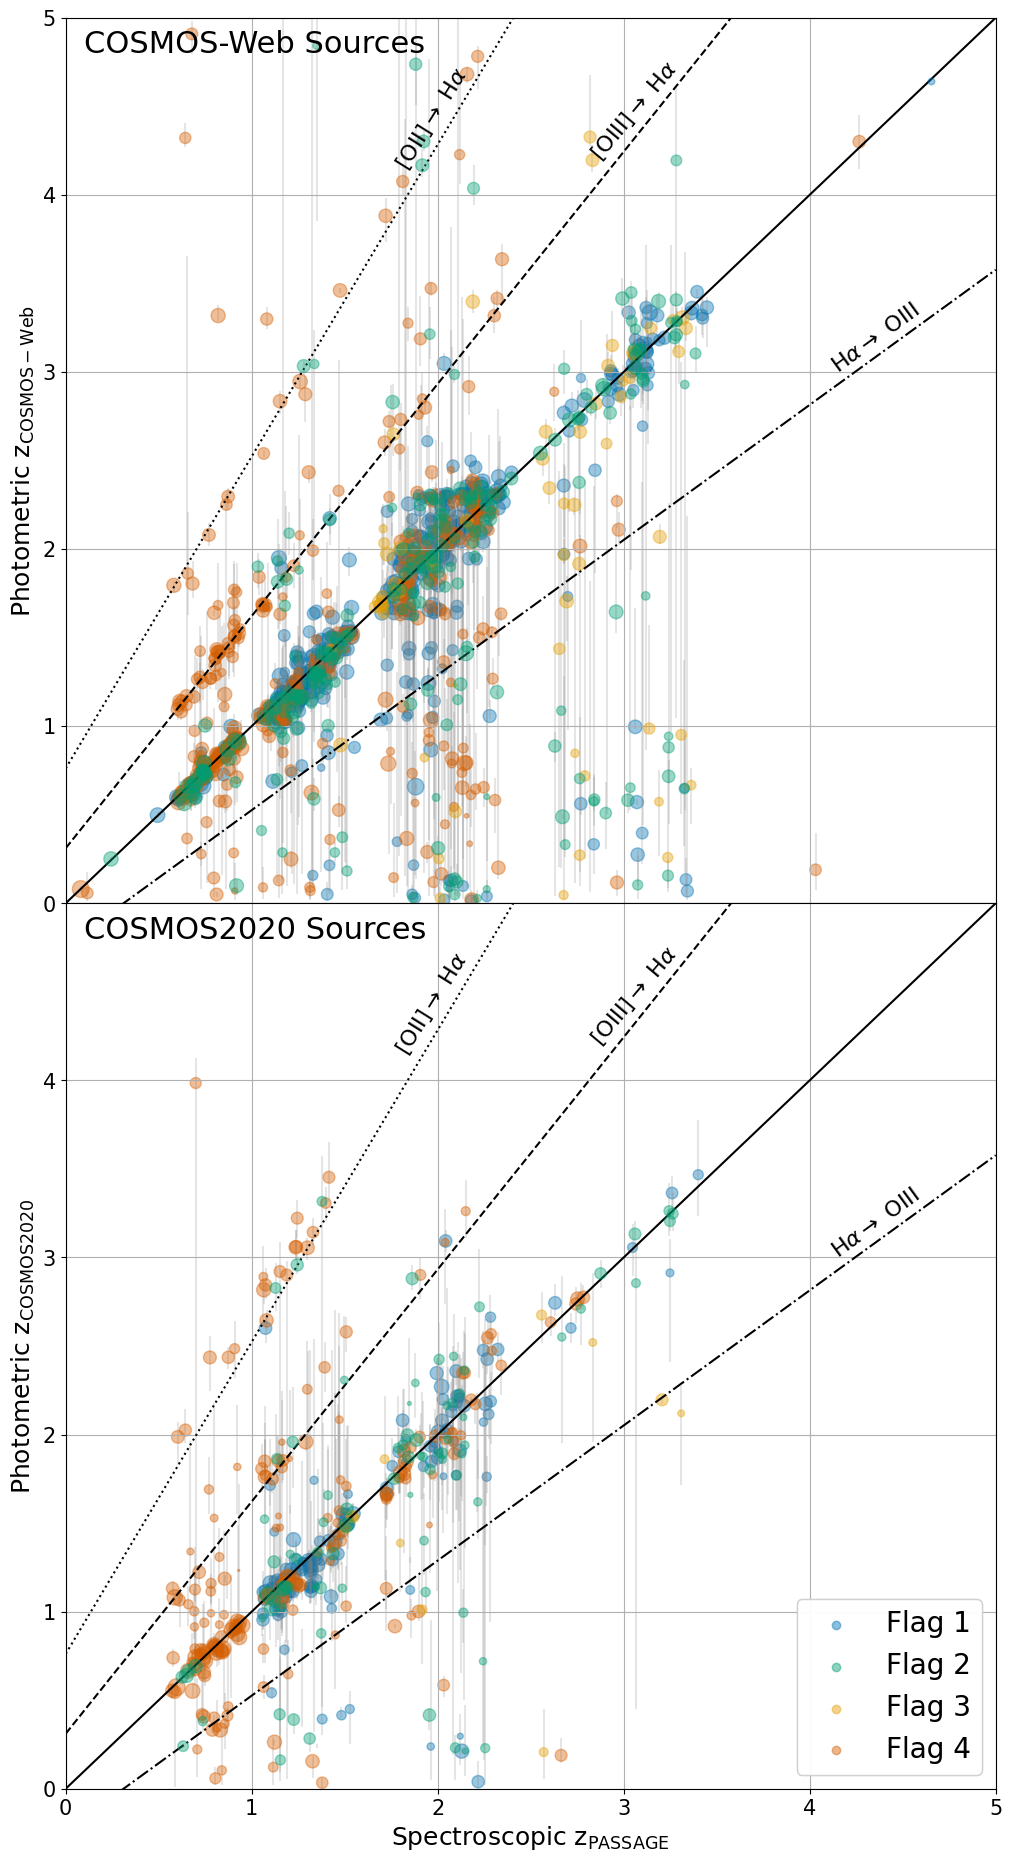

In [175]:
file_path_class1 = 'passageincosmosweb_forpeter.dat'
file_path_class1 = 'passageincosmosweb_finalizedz_forpeter_final.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')

file_path_class1 = 'passageincosmos2020_forpeter.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')

df=df[df['cosmosz']>0]
dfq=dfq[dfq['cosmos2020z']>0]


x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

#print(dz2)
print('min',min(x))
print('max',max(x))

fig, (ax0,ax1) = plt.subplots(2, 1,figsize=(12,23),sharex=True,gridspec_kw={'hspace': 0})
#fig, (ax0,ax1) = plt.subplots(1, 2,figsize=(12,5))

colorq=["#1F2933","#3B82F6","#10B981","#EF4444","#F59E0B"]
colorq = [
    "#0072B2",  # Blue
    "#009E73",  # Bluish green
    "#E69F00",  # Orange
    "#D55E00",  # Vermillion
    "#CC79A7",  # Reddish purple
]
ax1.scatter([-1],[-1],color=colorq[0],alpha=0.4,label='Flag 1')
ax1.scatter([-1],[-1],color=colorq[1],alpha=0.4,label='Flag 2')
ax1.scatter([-1],[-1],color=colorq[2],alpha=0.4,label='Flag 3')
ax1.scatter([-1],[-1],color=colorq[3],alpha=0.4,label='Flag 4')
first_legend = ax1.legend(fontsize=20,loc='lower right')
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax1.add_artist(first_legend)

from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(size),vmax=np.max(size))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
#print(size)
#size=np.log10(np.array(size[f==1])/1-20)*10

size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
# = 5 + (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==1]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
#size=np.subtract(size,20)
#print(size)
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color=colorq[0],s=size,norm=norm,zorder=0,label='Flag 1',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)

#df9agn=df[df['redshift']>4.5]
ax0.scatter([4.65045],[4.64],color=colorq[0],s=[22.625453],norm=norm,zorder=4,alpha=0.4)
#for jj in df9:
#    if df9==
#650143




x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

print(np.min(dz2))
print(np.max(dz2))

size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==1]
size=np.where(size<0,0,size)
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color=colorq[0],s=size,norm=norm,zorder=0,alpha=0.4,label='Flag 1')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==2]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color=colorq[1],s=size,norm=norm,label='Flag 2',alpha=0.4,zorder=3)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==2]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==2]
size=np.where(size<0,0,size)
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color=colorq[1],s=size,norm=norm,zorder=3,alpha=0.4,label='Flag 2')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==3]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color=colorq[2],s=size,norm=norm,label='Flag 3',alpha=0.4,zorder=2)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==3]
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color=colorq[2],s=size,norm=norm,zorder=2,alpha=0.4,label='Flag 3')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

x=x[f==4]
size=np.array(dz2)#np.array(size)
size=np.where(size<15,22,size)
#print(dz2)
#prin(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==4]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color=colorq[3],s=size,norm=norm,label='Flag 4',alpha=0.4,zorder=1)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==4]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==4]
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color=colorq[3],s=size,norm=norm,zorder=1,alpha=0.4,label='Flag 4')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
ax1.plot(x,y,"k",linestyle='dashdot')
ax0.plot(x,y,"k",linestyle='dashdot')
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")

#y=6565/9533*(1+x)-1
#ax0.plot(x,y,"k--")
#ax1.plot(x,y,"k--")
#y=6565/12822*(1+x)-1
#ax0.plot(x,y,"k--")
#ax1.plot(x,y,"k--")


x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
ax1.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha


#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax1.plot(x,y,"k:")


ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{COSMOS-Web}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")
ax1.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax1.set_ylabel(r'$\rm Photometric\ z_{COSMOS2020}$', fontsize=18)
#ax0.set_title('COSMOS-Web Sources', fontsize=16)
#ax1.set_title('COSMOS2020 Sources', fontsize=16)
#plt.title('Flag 4 Only', fontsize=13)
ax1.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)


ax1.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax1.yaxis.set_tick_params(labelsize=15)

#plt.legend(fontsize=15)

# Create the second legend
#l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
#l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
#second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)
ax0.text(2.8,4.2,r'[OIII]$\rightarrow$ H$\alpha$',rotation=50,fontsize=16)
ax0.text(1.75,4.15,r'[OII]$\rightarrow$ H$\alpha$',rotation=58,fontsize=16)
ax0.text(4.1,3.,r'H$\alpha$$\rightarrow$ OIII',rotation=36,fontsize=16)
ax1.text(2.8,4.2,r'[OIII]$\rightarrow$ H$\alpha$',rotation=50,fontsize=16)
ax1.text(1.75,4.15,r'[OII]$\rightarrow$ H$\alpha$',rotation=58,fontsize=16)
ax1.text(4.1,3.,r'H$\alpha$$\rightarrow$ OIII',rotation=36,fontsize=16)

ax0.text(0.1,4.8,'COSMOS-Web Sources',fontsize=22)
ax1.text(0.1,4.8,'COSMOS2020 Sources',fontsize=22)
ax0.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticks([0, 1, 2, 3, 4])

2.7746 2.7988 2.8319 new 2.84239354467837
1.5419 1.5515 1.56 new 1.5405317532905771
1.6659 1.6808 1.6928 new 1.6997762122022908
1.0785 1.122 1.1438 new 1.1566751412871588
1.4002 1.419 1.4384 new 1.3796226268110154
1.1322 1.1406 1.15 new 1.1148225149553537


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/366646052.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zpass1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['redshift'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/366646052.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zcos1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmosz'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/366646052.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zcos1up=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmoszup'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/366646052.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zcos1low=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmoszlow'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/366646052.

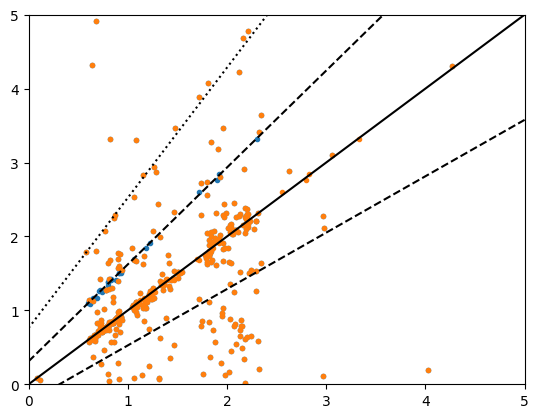

In [291]:
file_path_class1 = 'passageincosmosweb.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')
#passageincosmosweb_finalizedz_forpeter_final.dat
file_path_class1 = 'passageincosmos2020.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')

zpass1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['redshift'])
zcos1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmosz'])
zcos1up=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmoszup'])
zcos1low=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmoszlow'])
zpass2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['redshift'])
zcos2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['cosmos2020z'])
zcos2up=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['cosmos2020zup'])
zcos2low=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['cosmos2020zlow'])
zpass=zpass1#np.concatenate((zpass1, zpass2))
zcos=zcos1#np.concatenate((zcos1, zcos2))
zcosup=zcos1up#np.concatenate((zcos1up, zcos2up))
zcoslow=zcos1low#np.concatenate((zcos1low, zcos2low))
plt.scatter(zpass,zcos,marker=".")
newz1=[]
for iii in range(len(zpass)):
    target=zpass[iii]
    csz=zcos[iii]
    y5007=6564.61/5008.24*(1+target)-1
    if abs(y5007-csz)<0.05:
        zl=zcoslow[iii]
        zu=zcosup[iii]
        if zl<y5007<zu:
            newz1.append(y5007)
            #print(zl,csz,zu,'new',y5007)
        else:
            print(zl,csz,zu,'new',y5007)
            newz1.append(target)
    else:
        newz1.append(target)

plt.scatter(newz1,zcos,marker=".")
plt.plot([0,5],[0,5],"k")
plt.xlim(0,5)
plt.ylim(0,5)
x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
plt.plot(x,y,"k:")

In [483]:
file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#')
#df
df[df['emline_flag']==1]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
25         44  1358.0   2.67917         0.00000  150.399126  2.403869   
49         72   114.0   1.44138         0.00000  150.652965  2.063534   
55         78   259.0   1.10606         0.00023  150.659236  2.067418   
57         80   269.0   1.39243         0.00000  150.654035  2.067509   
58         81   271.0   1.39752         0.00031  150.653792  2.067564   
...       ...     ...       ...             ...         ...       ...   
2117     2246   572.0   3.00915         0.00000  150.112277  1.782799   
2123     2252   718.0   2.69132         0.00024  150.086138  1.784581   
2139     2268  1412.0   3.07614         0.00043  150.109623  1.791983   
2145     2275  1730.0   3.24873         0.00023  150.109856  1.795248   
2167     2298  2642.0   3.15604         0.00000  150.105684  1.806777   

         snr_Ha  emline_flag     Par  index    zbest  emline_flag_best  
25    -1.000000          1.0  Par003     25  2.67917               1.0  
49    19.492386          1.0  Par005     49  1.44138               1.0  
55    20.987654          1.0  Par005     55  1.10606               1.0  
57     7.594678          1.0  Par005     57  1.39243               1.0  
58     9.262295          1.0  Par005     58  1.39752               1.0  
...         ...          ...     ...    ...      ...               ...  
2117  -1.000000          1.0  Par053   2117  3.00915               1.0  
2123  -1.000000          1.0  Par053   2123  2.69132               1.0  
2139  -1.000000          1.0  Par053   2139  3.07614               1.0  
2145  -1.000000          1.0  Par053   2145  3.24873               1.0  
2167  -1.000000          1.0  Par053   2167  3.15604               1.0  

[859 rows x 12 columns]

In [482]:
859+425+110+790

2184

In [485]:
file_path_class1 = 'passageincosmosweb_forpeter.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')


file_path_class1 = 'passageincosmos2020_forpeter.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')

zpass1=np.array(df[df['cosmosz']>0]['redshift'])
zcos1=np.array(df[df['cosmosz']>0]['cosmosz'])
index1=np.array(df[df['cosmosz']>0]['index'])
snha1=np.array(df[df['cosmosz']>0]['snr_Ha'])
zpass2=np.array(dfq[dfq['cosmos2020z']>0]['redshift'])
zcos2=np.array(dfq[dfq['cosmos2020z']>0]['cosmos2020z'])
index2=np.array(dfq[dfq['cosmos2020z']>0]['index'])
snha2=np.array(dfq[dfq['cosmos2020z']>0]['snr_Ha'])
zpass=np.concatenate((zpass1, zpass2))
zcos=np.concatenate((zcos1, zcos2))

c1=0
c2=0
for i in range(len(zpass)):
    c1+=1
    if abs(zpass[i]-zcos[i])<0.2:
        c2+=1
        
print(c2/c1)



0.6509758897818599


In [566]:
file_path_class1 = 'passageincosmosweb_forpeter.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')


file_path_class1 = 'passageincosmos2020_forpeter.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')

zpass1=np.array(df[df['cosmosz']>0]['redshift'])
zcos1=np.array(df[df['cosmosz']>0]['cosmosz'])
index1=np.array(df[df['cosmosz']>0]['index'])
snha1=np.array(df[df['cosmosz']>0]['snr_Ha'])
zpass2=np.array(dfq[dfq['cosmos2020z']>0]['redshift'])
zcos2=np.array(dfq[dfq['cosmos2020z']>0]['cosmos2020z'])
index2=np.array(dfq[dfq['cosmos2020z']>0]['index'])
snha2=np.array(dfq[dfq['cosmos2020z']>0]['snr_Ha'])
zpass=np.concatenate((zpass1, zpass2))
zcos=np.concatenate((zcos1, zcos2))

c1=0
c2=0
for i in range(len(zpass)):
    c1+=1
    if abs(zpass[i]-zcos[i])<0.5:
        c2+=1
        
print(c2/c1)



0.7824339839265212


In [567]:
file_path_class1 = 'passageincosmosweb_forpeter.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')


file_path_class1 = 'passageincosmos2020_forpeter.dat'
dfq = pd.read_csv(file_path_class1,header=0, comment='#',sep='\t')

zpass1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['redshift'])
zcos1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmosz'])
index1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['index'])
snha1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['snr_Ha'])
zpass2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['redshift'])
zcos2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['cosmos2020z'])
index2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['index'])
snha2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['snr_Ha'])
zpass=np.concatenate((zpass1, zpass2))
zcos=np.concatenate((zcos1, zcos2))


dzs=(zcos-zpass)/(1+zpass)
sigmanmad=1.48*np.nanmedian(np.abs(dzs-np.nanmedian(dzs)))
sigmanmad

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1989779616.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zpass1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['redshift'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1989779616.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zcos1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmosz'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1989779616.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['index'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1989779616.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  snha1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['snr_Ha'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1989779616.py:12:

0.09385157235467231

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3950985452.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zpass1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['redshift'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3950985452.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zcos1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmosz'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3950985452.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['index'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3950985452.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  snha1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['snr_Ha'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3950985452.py:5: Us

0.09385157235467231

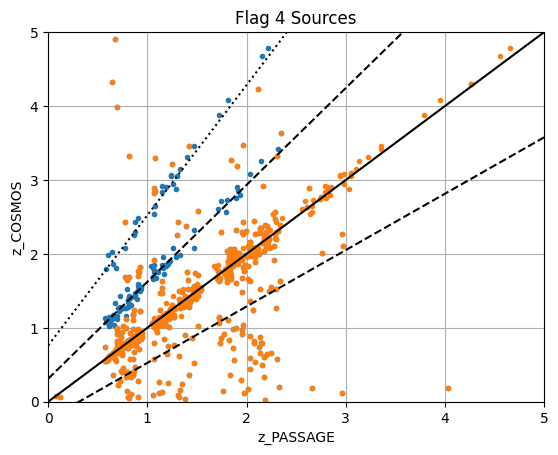

In [468]:
zpass1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['redshift'])
zcos1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['cosmosz'])
index1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['index'])
snha1=np.array(df[df['cosmosz']>0][df['emline_flag']==4]['snr_Ha'])
zpass2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['redshift'])
zcos2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['cosmos2020z'])
index2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['index'])
snha2=np.array(dfq[dfq['cosmos2020z']>0][dfq['emline_flag']==4]['snr_Ha'])
zpass=np.concatenate((zpass1, zpass2))
zcos=np.concatenate((zcos1, zcos2))
ind=np.concatenate((index1, index2))
snha=np.concatenate((snha1, snha2))
#print(len())
newz=[]
co2=0
co3=0
ttl=0
ttla=0
newflag=[]
for iii in range(len(zpass)):
    target=zpass[iii]
    y5007=6564.61/5008.24*(1+target)-1
    y3727=6564.61/3728.485*(1+target)-1
    csz=zcos[iii]
    ttl+=1
    if snha[iii]>2:
        ttla+=1
        if abs(y5007-csz)<0.18071541033990154:
            newz.append(y5007)
            newflag.append(11)
            co3+=1
        elif abs(y3727-csz)<0.18071541033990154:
            newz.append(y3727)
            newflag.append(11)
            co2+=1
        elif abs(target-csz)<0.18071541033990154: #if it already agrees, the flags should be 11 too
            newz.append(target)
            newflag.append(11)
        else:
            newz.append(target)
            newflag.append(4)
    else:
        if abs(target-csz)<0.18071541033990154: #if it already agrees, the flags should be 11 too
            newz.append(target)
            newflag.append(11)
        else:
            newz.append(target)
            newflag.append(4)
plt.plot(zpass,zcos,".")        
plt.plot(newz,zcos,".")
plt.plot([0,5],[0,5],"k")
plt.xlim(0,5)
plt.ylim(0,5)
x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
plt.plot(x,y,"k:")
plt.xlabel('z_PASSAGE')
plt.ylabel('z_COSMOS')
plt.title('Flag 4 Sources')
plt.grid()
dzs=(zcos-zpass)/(1+zpass)
sigmanmad=1.48*np.nanmedian(np.abs(dzs-np.nanmedian(dzs)))
sigmanmad

In [469]:
print(co3)
print(co2)
print(ttl)
print(ttla)

81
27
589
544


In [472]:
(81+27)/589

0.1833616298811545

In [439]:
file_path_class1 = 'passagezfinal.dat'
dfmaster = pd.read_csv(file_path_class1,header=0, comment='#')
dfmaster

#ind = [2, 4]
#newz = [9.9, 8.8]

mapping = dict(zip(ind, newz))

dfmaster['zbest'] = dfmaster['index'].map(mapping).fillna(dfmaster['redshift'])

mapping = dict(zip(ind, newflag))
dfmaster['emline_flag_best'] = dfmaster['index'].map(mapping).fillna(dfmaster['emline_flag'])



dfmaster.to_csv('passagezfinal_updatedz_forpeter.dat', index=False)

In [440]:
file_path_class1 = 'passagezfinal_updatedz_forpeter.dat'
dfmaster2 = pd.read_csv(file_path_class1,header=0, comment='#')
#dfmaster2['emline_flag_best'] = dfmaster2['emline_flag_best'].replace(11, 1.5)
dfmaster2.loc[dfmaster2['emline_flag_best'] == 11, 'emline_flag_best'] = 1.5

dfmaster2
dfmaster2.to_csv('passagezfinal_updatedz_forpeter2.dat', index=False)

In [491]:

file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
dfmaster3 = pd.read_csv(file_path_class1,header=0, comment='#')
dfmaster3
#print(min(dfmaster3['zbest']))
#print(max(dfmaster3['zbest']))




0.08103
4.660059972160274


In [208]:
5*sigmanmad

0.1828051579601147

In [296]:
dfmaster

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  
0     -1.000000          4.0  Par003      0  2.963650  
1     -1.000000          4.0  Par003      1  2.973340  
2     -1.000000          3.0  Par003      2  3.363050  
3      6.531915          4.0  Par003      3  2.166660  
4      9.038095          4.0  Par003      4  1.907170  
...         ...          ...     ...    ...       ...  
2179  -1.000000          3.0  Par053   2179  2.855520  
2180  -1.000000          2.0  Par053   2180  3.244230  
2181  11.651786          4.0  Par053   2181  1.739150  
2182  10.322581          4.0  Par053   2182  3.788742  
2183   6.029963          4.0  Par053   2183  3.351100  

[2184 rows x 11 columns]

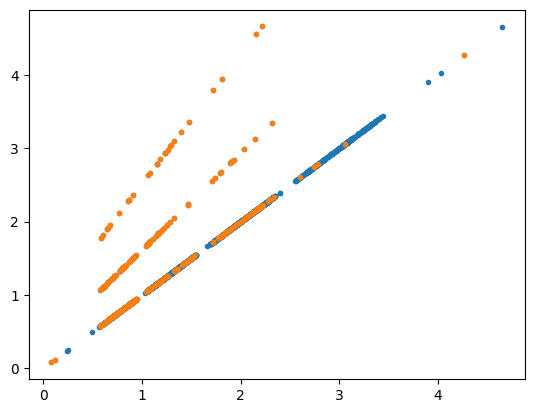

In [442]:
file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
dfmaster2 = pd.read_csv(file_path_class1,header=0, comment='#')
plt.plot(dfmaster2['redshift'],dfmaster2['zbest'],".")
dfmaster2 = dfmaster2[dfmaster2['emline_flag_best']==1.5]
plt.plot(dfmaster2['redshift'],dfmaster2['zbest'],".")
#dfmaster2

In [422]:
file_path_class1 = 'passagezfinal_updatedzbup2.dat'
dfmaster2 = pd.read_csv(file_path_class1,header=0, comment='#')
#dfmaster2['emline_flag_best'] = dfmaster2['emline_flag_best'].replace(11, 1.5)
dfmaster2.loc[dfmaster2['emline_flag_best'] == 11, 'emline_flag_best'] = 1.5

dfmaster2
dfmaster2.to_csv('passagezfinal_updatedz.dat', index=False)

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/2966144571.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20b_cmap = cm.get_cmap('Set1')


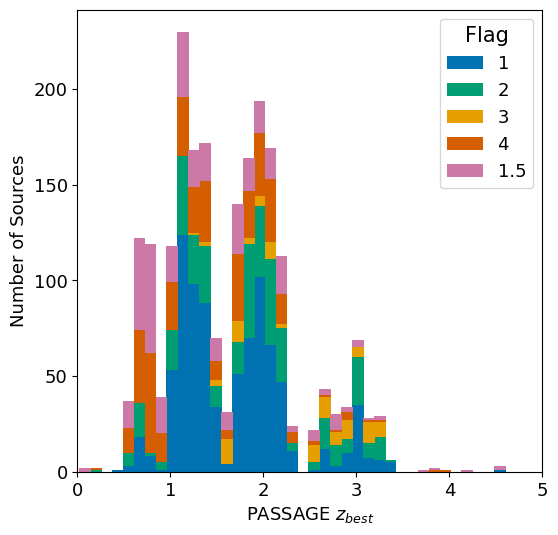

In [114]:
file_path_class1 = 'passagezfinal_updatedzbup2.dat'
#file_path_class1 = 'passagezfinal_updatedz.dat'
fdf = pd.read_csv(file_path_class1,header=0, comment='#')
fig = plt.subplots(1, 1, figsize=(6,6))
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get the tab20b colormap
#fdf=
tab20b_cmap = cm.get_cmap('Set1')
colors3=['c','b','purple','r','orange',]
colors3=["#1F2933","#3B82F6","#10B981","#EF4444","#F59E0B"]
colors3 = [
    "#0072B2",  # Blue
    "#009E73",  # Bluish green
    "#E69F00",  # Orange
    "#D55E00",  # Vermillion
    "#CC79A7",  # Reddish purple
]
nbins=40
cc=0
#fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
bins = np.linspace(np.min(fdf['zbest']),np.max(fdf['zbest']),nbins)#np.arange(0,4,20)
grouped = fdf.groupby('emline_flag_best')
#print(grouped)
bottom = np.zeros(len(bins) - 1)
for label, group in grouped:
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['zbest'], bins=bins)
    #print(counts)
    plt.bar(bins[:-1], counts, color=colors3[cc],width=5/nbins, bottom=bottom, label=label, alpha=1)#color=tab20b_cmap(cc)
    bottom += counts  # update bottom for stacking
    cc+=1
plt.xlabel('PASSAGE $z_{best}$', fontsize=13)
plt.ylabel('Number of Sources',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
#plt.title('Flags of Each $z_{best}$', fontsize=13)
#ax2.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.xlim(0,5)
#plt.title('Histogram of Redshifts')
plt.legend(labels=['1','2','3','4','1.5'],title='Flag',fontsize=13, title_fontsize=15)

In [636]:
file_path_class1 = 'passagezfinal_updatedzbup2.dat'
#file_path_class1 = 'passagezfinal_updatedz.dat'
fdf = pd.read_csv(file_path_class1,header=0, comment='#')
fdf


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  
0     -1.000000          4.0  Par003      0  2.963650               4.0  
1     -1.000000          4.0  Par003      1  2.973340               4.0  
2     -1.000000          3.0  Par003      2  3.363050               3.0  
3      6.531915          4.0  Par003      3  2.166660               4.0  
4      9.038095          4.0  Par003      4  1.907170               4.0  
...         ...          ...     ...    ...       ...               ...  
2179  -1.000000          3.0  Par053   2179  2.855520               3.0  
2180  -1.000000          2.0  Par053   2180  3.244230               2.0  
2181  11.651786          4.0  Par053   2181  1.739150               4.0  
2182  10.322581          4.0  Par053   2182  3.788742              11.0  
2183   6.029963          4.0  Par053   2183  3.351100              11.0  

[2184 rows x 12 columns]

In [653]:
allo='Par053'
fdf[fdf['Par']==allo]
len(fdf[fdf['Par']==allo])

83

In [660]:

finall=np.array([47,155,169,68,176,150,119,143,152,285,123,117,65,332,83])
initiall=np.array([177, 237, 276, 612, 283, 260, 208, 275, 231, 894, 218, 251, 207, 850, 197])
#np.sum([177, 237, 276, 612, 283, 260, 208, 275, 231, 894, 218, 251, 207, 850, 197])
for i in range(len(finall)):
    print(initiall[i],finall[i])


177 47
237 155
276 169
612 68
283 176
260 150
208 119
275 143
231 152
894 285
218 123
251 117
207 65
850 332
197 83


In [492]:
#file_path_class1 = 'passagezfinal_updatedz.dat'
file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#')
#df

samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df['cosmosra']=tt
df['cosmosdec']=tt2
df['cosmosid']=tt3
df['cosmosz']=tt4
df['cosmoshst']=tt44
df['cosmoszmed']=tt5
df['cosmoszlow']=tt6
df['cosmoszup']=tt7

df


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2179  -1.000000          3.0  Par053   2179  2.855520               3.0   
2180  -1.000000          2.0  Par053   2180  3.244230               2.0   
2181  11.651786          4.0  Par053   2181  1.739150               4.0   
2182  10.322581          4.0  Par053   2182  3.788742               1.5   
2183   6.029963          4.0  Par053   2183  3.351100               1.5   

        cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
0     150.410715   2.384564  511464.0   0.1172  25.211860      0.1172   
1     150.410797   2.384621  511465.0   2.1090  25.216494      2.1090   
2     150.415515   2.387915  512161.0   0.6671  27.743172      0.6671   
3     150.406756   2.387884  511697.0   2.9169  25.966786      2.9169   
4     150.422776   2.389848  512848.0   3.1868  25.964520      3.1868   
...          ...        ...       ...      ...        ...         ...   
2179   -1.000000  -1.000000      -1.0  -1.0000  -1.000000     -1.0000   
2180   -1.000000  -1.000000      -1.0  -1.0000  -1.000000     -1.0000   
2181  150.117799   1.806220  311236.0   2.2941  26.928000      2.2941   
2182  150.105874   1.808868  311071.0   3.8818  24.959286      3.8818   
2183  150.108506   1.810472  311327.0   3.4153  25.855949      3.4153   

      cosmoszlow  cosmoszup  
0         0.0454     0.1836  
1         2.0293     2.2053  
2         0.4550     0.7600  
3         2.7610     3.0821  
4         3.0388     3.4203  
...          ...        ...  
2179     -1.0000    -1.0000  
2180     -1.0000    -1.0000  
2181      0.2840     2.6514  
2182      3.7380     3.9778  
2183      3.3540     3.4581  

[2184 rows x 20 columns]

In [493]:
#file_path_class1 = 'passageincosmos2020.dat'
dfq=df
dfq=dfq[dfq['cosmosid'] == -1]
#dfq = dfq.reset_index()

samp_x = np.array(dfq['ra_obj'])#.data
samp_y = np.array(dfq['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



dfq['cosmos2020ra']=tt
dfq['cosmos2020dec']=tt2
dfq['cosmos2020id']=tt3
dfq['cosmos2020z']=tt4
dfq['cosmos2020hst']=tt44
dfq['cosmos2020zlow']=tt6
dfq['cosmos2020zup']=tt7
dfq


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1001252652.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['cosmos2020ra']=tt
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1001252652.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['cosmos2020dec']=tt2
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/1001252652.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
26         45  1439.0   2.03595         0.00117  150.427845  2.404654   
28         47  1721.0   1.96702         0.00227  150.398260  2.407479   
43         65  2684.0   3.34795         0.00000  150.412213  2.418843   
47         70    38.0   0.75611         0.00000  150.663636  2.060239   
48         71    61.0   0.83834         0.00055  150.660835  2.062183   
...       ...     ...       ...             ...         ...       ...   
2176     2308  1385.0   1.98953         0.00173  150.083750  1.791630   
2177     2309  1726.0   1.73094         0.00324  150.086634  1.792008   
2178     2310  1760.0   1.90693         0.00253  150.106729  1.795688   
2179     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2180     2312  2379.0   3.24423         0.00000  150.096601  1.802628   

         snr_Ha  emline_flag     Par  index  ...  cosmoszmed  cosmoszlow  \
26     7.627119          4.0  Par003     26  ...        -1.0        -1.0   
28     4.347458          4.0  Par003     28  ...        -1.0        -1.0   
43    -1.000000          4.0  Par003     43  ...        -1.0        -1.0   
47     9.261993          4.0  Par005     47  ...        -1.0        -1.0   
48    11.833333          4.0  Par005     48  ...        -1.0        -1.0   
...         ...          ...     ...    ...  ...         ...         ...   
2176   5.090909          4.0  Par053   2176  ...        -1.0        -1.0   
2177  10.333333          4.0  Par053   2177  ...        -1.0        -1.0   
2178   5.061728          4.0  Par053   2178  ...        -1.0        -1.0   
2179  -1.000000          3.0  Par053   2179  ...        -1.0        -1.0   
2180  -1.000000          2.0  Par053   2180  ...        -1.0        -1.0   

      cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
26         -1.0     -1.000000      -1.000000          -1.0      -1.0000   
28         -1.0     -1.000000      -1.000000          -1.0      -1.0000   
43         -1.0     -1.000000      -1.000000          -1.0      -1.0000   
47         -1.0    150.663634       2.060226      668627.0          NaN   
48         -1.0    150.660829       2.062186      669553.0       0.7782   
...         ...           ...            ...           ...          ...   
2176       -1.0    150.083743       1.791626      388114.0          NaN   
2177       -1.0     -1.000000      -1.000000          -1.0      -1.0000   
2178       -1.0    150.106742       1.795670      391486.0       2.9012   
2179       -1.0     -1.000000      -1.000000          -1.0      -1.0000   
2180       -1.0    150.096611       1.802626      398706.0       3.2625   

      cosmos2020hst  cosmos2020zlow  cosmos2020zup  
26        -1.000000         -1.0000        -1.0000  
28        -1.000000         -1.0000        -1.0000  
43        -1.000000         -1.0000        -1.0000  
47        24.397160          1.9204         2.1175  
48        24.456970          0.7423         0.8135  
...             ...             ...            ...  
2176      23.734461          1.0567         1.1628  
2177      -1.000000         -1.0000        -1.0000  
2178      25.552387          2.7692         2.9978  
2179      -1.000000         -1.0000        -1.0000  
2180      25.735296          3.1249         3.4148  

[889 rows x 27 columns]

183


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2639853915.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zpass1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['zbest'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2639853915.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zcos1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['cosmosz'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2639853915.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['index'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2639853915.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  snha1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['snr_Ha'])
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_

0.4484633989441658

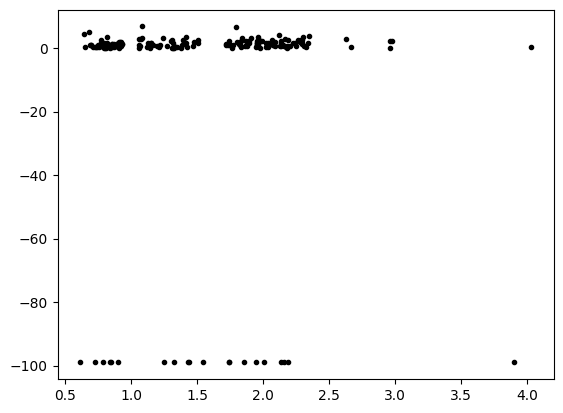

In [511]:
zpass1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['zbest'])
zcos1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['cosmosz'])
index1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['index'])
snha1=np.array(df[df['cosmosz']!=-1][df['emline_flag_best']==4]['snr_Ha'])
zpass2=np.array(dfq[dfq['cosmos2020z']>-1][df['cosmosz']==-1][dfq['emline_flag_best']==4]['zbest'])
zcos2=np.array(dfq[dfq['cosmos2020z']>-1][df['cosmosz']==-1][dfq['emline_flag_best']==4]['cosmos2020z'])
index2=np.array(dfq[dfq['cosmos2020z']>-1][df['cosmosz']==-1][dfq['emline_flag_best']==4]['index'])
snha2=np.array(dfq[dfq['cosmos2020z']>-1][df['cosmosz']==-1][dfq['emline_flag_best']==4]['snr_Ha'])
zpass=np.concatenate((zpass1, zpass2))
zcos=np.concatenate((zcos1, zcos2))
ind=np.concatenate((index1, index2))
snha=np.concatenate((snha1, snha2))
plt.plot(zpass,zcos,"k.")

dzs=(zcos-zpass)/(1+zpass)
sigmanmad=1.48*np.nanmedian(np.abs(dzs-np.nanmedian(dzs)))
print(len(zpass))
sigmanmad


In [513]:
790-(383+183)

#183

224

In [508]:
790-383

407

min 0.08103
max 4.660059972160274
21.405041788800876
30.479885879937008
21.93389129638672
27.942642211914062


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2233332272.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=1,label='Flag 1',alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2233332272.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  ax0.scatter([4.65045],[4.64],color="teal",s=[22.625453],norm=norm,zorder=1,alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2233332272.py:109: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax1.scatter(x,y,color="teal",s=size,norm=norm,zorder=1,alpha=0.4,label='Flag 1')#,facecolors='none',edgecolors=None,linewidths=1.5)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2233332272.py:143: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ign

Text(4.1, 3.0, 'H$\\alpha$$\\leftrightarrow$ OIII')

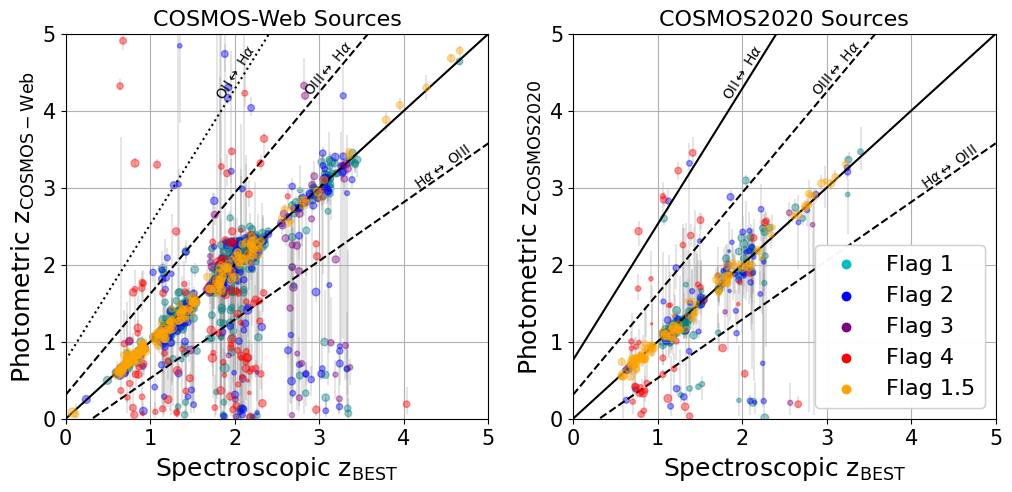

In [400]:
#file_path_class1 = 'passageincosmosweb.dat'
#df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')


df=df[df['cosmosz']>0]
dfq=dfq[dfq['cosmos2020z']>0]


x=df['zbest']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag_best']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

#print(dz2)
print('min',min(x))
print('max',max(x))

fig, (ax0,ax1) = plt.subplots(1, 2,figsize=(12,5))


ax1.scatter([-1],[-1],color='c',label='Flag 1')
ax1.scatter([-1],[-1],color='b',label='Flag 2')
ax1.scatter([-1],[-1],color='purple',label='Flag 3')
ax1.scatter([-1],[-1],color='r',label='Flag 4')
ax1.scatter([-1],[-1],color='orange',label='Flag 1.5')
first_legend = ax1.legend(fontsize=16,loc='lower right')
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax1.add_artist(first_legend)

from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(size),vmax=np.max(size))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
#print(size)
#size=np.log10(np.array(size[f==1])/1-20)*10

size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
# = 5 + (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==1]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
#size=np.subtract(size,20)
#print(size)
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=1,label='Flag 1',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)

#df9agn=df[df['redshift']>4.5]
ax0.scatter([4.65045],[4.64],color="teal",s=[22.625453],norm=norm,zorder=1,alpha=0.4)
#for jj in df9:
#    if df9==
#650143




x=dfq['zbest']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag_best']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

print(np.min(dz2))
print(np.max(dz2))

size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==1]
size=np.where(size<0,0,size)
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="teal",s=size,norm=norm,zorder=1,alpha=0.4,label='Flag 1')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['zbest']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag_best']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==2]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="blue",s=size,norm=norm,label='Flag 2',alpha=0.4,zorder=2)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['zbest']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag_best']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==2]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==2]
size=np.where(size<0,0,size)
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="blue",s=size,norm=norm,zorder=2,alpha=0.4,label='Flag 2')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=df['zbest']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag_best']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==3]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="purple",s=size,norm=norm,label='Flag 3',alpha=0.4,zorder=3)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=dfq['zbest']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag_best']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==3]
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="purple",s=size,norm=norm,zorder=3,alpha=0.4,label='Flag 3')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['zbest']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag_best']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']




x=x[f==4]
size=np.array(dz2)#np.array(size)
size=np.where(size<15,22,size)
#print(dz2)
#prin(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==4]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="r",s=size,norm=norm,label='Flag 4',alpha=0.4,zorder=4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['zbest']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag_best']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==4]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==4]
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="r",s=size,norm=norm,zorder=4,alpha=0.4,label='Flag 4')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=df['zbest']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag_best']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

x=x[f==11]
size=np.array(dz2)#np.array(size)
size=np.where(size<15,22,size)
#print(dz2)
#prin(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==11]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==11]
ylow=ylow[f==11]
y=y[f==11]
dz=dz2[f==11]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="orange",s=size,norm=norm,label='Flag 11',alpha=0.4,zorder=4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['zbest']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag_best']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']

x=x[f==11]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==11]
size=np.where(size<0,0,size)
yup=yup[f==11]
ylow=ylow[f==11]
y=y[f==11]
dz=dz2[f==11]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="orange",s=size,norm=norm,zorder=4,alpha=0.4,label='Flag 11')#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
ax0.plot(x,y,"k--")
y=5008/6565*(1+x)-1
ax1.plot(x,y,"k--")
#ax0.plot(x,y,"k",linestyle='dashdot')
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")

#y=6565/9533*(1+x)-1
#ax0.plot(x,y,"k--")
#ax1.plot(x,y,"k--")
#y=6565/12822*(1+x)-1
#ax0.plot(x,y,"k--")
#ax1.plot(x,y,"k--")


x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
ax1.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha


#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax1.plot(x,y,"k")


ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{BEST}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{COSMOS-Web}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")
ax1.set_xlabel(r'$\rm Spectroscopic\ z_{BEST}$', fontsize=18)
ax1.set_ylabel(r'$\rm Photometric\ z_{COSMOS2020}$', fontsize=18)
ax0.set_title('COSMOS-Web Sources', fontsize=16)
ax1.set_title('COSMOS2020 Sources', fontsize=16)
#plt.title('Flag 4 Only', fontsize=13)
ax1.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)


ax1.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax1.yaxis.set_tick_params(labelsize=15)

#plt.legend(fontsize=15)

# Create the second legend
#l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
#l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
#second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)
ax0.text(2.8,4.2,r'OIII$\leftrightarrow$ H$\alpha$',rotation=50,fontsize=10)
ax0.text(1.75,4.15,r'OII$\leftrightarrow$ H$\alpha$',rotation=58,fontsize=10)
ax0.text(4.1,3.,r'H$\alpha$$\leftrightarrow$ OIII',rotation=36,fontsize=10)
ax1.text(2.8,4.2,r'OIII$\leftrightarrow$ H$\alpha$',rotation=50,fontsize=10)
ax1.text(1.75,4.15,r'OII$\leftrightarrow$ H$\alpha$',rotation=58,fontsize=10)
ax1.text(4.1,3.,r'H$\alpha$$\leftrightarrow$ OIII',rotation=36,fontsize=10)

In [9]:
hduk=fits.open('specz_compilation_COSMOS_DR1.1_all.fits')
hduk[1].header#data['specz']#data

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  268 / length of dimension 1                          
NAXIS2  =               482579 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   32 / number of table fields                         
TTYPE1  = 'Id_specz'                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'Id_original'                                                         
TFORM2  = '20A     '                                                            
TTYPE3  = 'ra_original'     

In [149]:

#file_path_class1 = 'passagezfinal_updatedz.dat'
file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#')
#df

samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hduk[1].data['ra_corrected']#dat['ra      ']#.data
cat_y = hduk[1].data['dec_corrected']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hduk[1].data['ra_corrected'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hduk[1].data['dec_corrected'][idx[sel_samp]]

#tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt3[sel_samp] = hduk[1].data['id      '][idx[sel_samp]]

#tt44 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt4[sel_samp] = hduk[1].data['specz'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt5[sel_samp] = hduk[1].data['flag'][idx[sel_samp]]

#tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

#tt6 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

#tt7 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df['khostra']=tt
df['khostdec']=tt2
#df['cosmosid']=tt3
df['khostz']=tt4
df['khostflag']=tt5
#df['cosmoshst']=tt44
#df['cosmoszmed']=tt5
#df['cosmoszlow']=tt6
#df['cosmoszup']=tt7
allow=[3,4]
df[df['khostz']>0][df['khostflag'].isin(allow)][abs(df['zbest']-df['khostz'])>0.1]



/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/2789837450.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['khostflag'].isin(allow)][abs(df['zbest']-df['khostz'])>0.1]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/2789837450.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['khostflag'].isin(allow)][abs(df['zbest']-df['khostz'])>0.1]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
47         70    38.0   0.75611         0.00000  150.663636  2.060239   
907       971   584.0   1.14615         0.00000  150.227987  1.965428   
1682     1777  1055.0   1.71985         0.00000  149.703955  2.054273   
2094     2220  4344.0   1.81403         0.00000  150.149715  2.061238   
2175     2308  1385.0   1.98953         0.00173  150.083750  1.791630   

         snr_Ha  emline_flag     Par  index    zbest  emline_flag_best  \
47     9.261993          4.0  Par005     47  0.75611               4.0   
907   12.926375          1.0  Par025    907  1.14615               1.0   
1682   4.736486          4.0  Par049   1682  1.71985               4.0   
2094   6.349206          4.0  Par052   2094  1.81403               4.0   
2175   5.090909          4.0  Par053   2176  1.98953               4.0   

        khostra  khostdec   khostz  khostflag  
47    150.66364   2.06016  2.09596        4.0  
907   150.22798   1.96545  1.86810        3.0  
1682  149.70395   2.05425  1.15120        4.0  
2094  150.14964   2.06127  3.82575        4.0  
2175  150.08376   1.79163  1.16555        4.0

In [150]:
allowp=[1,2,1.5]
df[df['khostz']>0][df['khostflag'].isin(allow)][df['emline_flag_best'].isin(allowp)]

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1868205878.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['khostflag'].isin(allow)][df['emline_flag_best'].isin(allowp)]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1868205878.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['khostflag'].isin(allow)][df['emline_flag_best'].isin(allowp)]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
75        102   633.0   1.07978         0.00234  150.639111  2.072179   
122       150  1989.0   2.02143         0.00000  150.638228  2.084918   
153       181  2915.0   1.25143         0.00000  150.652681  2.093569   
206       234   216.0   1.30554         0.00051  150.680814  2.110987   
256       284  1255.0   1.13692         0.00000  150.673690  2.123091   
...       ...     ...       ...             ...         ...       ...   
1938     2059  2524.0   1.36174         0.00000  150.163459  2.043613   
1957     2079  2744.0   0.73767         0.00028  150.159002  2.045053   
2030     2154  3628.0   1.25136         0.00000  150.142183  2.051740   
2055     2181  3924.0   1.37640         0.00000  150.164627  2.055213   
2088     2214  4260.0   1.41537         0.00016  150.144633  2.059273   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
75     3.494540          4.0  Par005     75  2.661794               1.5   
122   -1.000000          1.0  Par005    122  2.021430               1.0   
153   36.113990          1.0  Par005    153  1.251430               1.0   
206   17.063830          1.0  Par006    206  1.305540               1.0   
256   15.909091          1.0  Par006    256  1.136920               1.0   
...         ...          ...     ...    ...       ...               ...   
1938  26.126761          1.0  Par052   1938  1.361740               1.0   
1957  25.250000          1.0  Par052   1957  0.737670               1.0   
2030  19.356436          1.0  Par052   2030  1.251360               1.0   
2055  90.140845          1.0  Par052   2055  1.376400               1.0   
2088  89.230769          1.0  Par052   2088  1.415370               1.0   

        khostra  khostdec   khostz  khostflag  
75    150.63913   2.07214  2.65730        3.0  
122   150.63823   2.08491  2.02400        3.0  
153   150.65266   2.09356  1.25550        4.0  
206   150.68082   2.11099  1.29175        4.0  
256   150.67369   2.12310  1.13019        4.0  
...         ...       ...      ...        ...  
1938  150.16345   2.04361  1.36200        3.0  
1957  150.15901   2.04505  0.72000        3.0  
2030  150.14221   2.05176  1.24015        4.0  
2055  150.16463   2.05522  1.36160        4.0  
2088  150.14462   2.05927  1.40486        4.0  

[82 rows x 16 columns]

In [166]:
df[df['khostz']>0]

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [173]:
alloww=[3,4]
dft=df[df['khostz']>0][~df['khostflag'].isin(alloww)]#[df['khostflag'].isin(allow)]
print(len(dft[abs(dft['zbest']-dft['khostz'])<0.1][dft['emline_flag_best']==4]))#[dft['emline_flag_best']==1]
print(len(dft[abs(dft['zbest']-dft['khostz'])<0.1]))#[dft['emline_flag_best']==1]
print(len(dft))
#dft[abs(dft['zbest']-dft['khostz'])>0.1][dft['emline_flag_best']==1]

4
86
141


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3767973594.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft=df[df['khostz']>0][~df['khostflag'].isin(alloww)]#[df['khostflag'].isin(allow)]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3767973594.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(dft[abs(dft['zbest']-dft['khostz'])<0.1][dft['emline_flag_best']==4]))#[dft['emline_flag_best']==1]


In [174]:
86/141

0.6099290780141844

In [ ]:
7 flag 4 dont agree, 5 do

In [153]:
39/61

0.639344262295082

In [154]:
dft.loc[dft['index'] == 907, 'emline_flag_best'] = 4
df.loc[df['index'] == 907, 'emline_flag_best'] = 4
df.loc[df['index'] == 2098, 'zbest'] = -1
dft[abs(dft['zbest']-dft['khostz'])>0.1]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
47         70    38.0  0.756110        0.000000  150.663636  2.060239   
192       220  3991.0  1.468550        0.000730  150.652796  2.104836   
208       236   228.0  0.585960        0.000000  150.693397  2.110936   
283       311  1810.0  1.826220        0.000530  150.686442  2.128916   
387       417  1647.0  2.033700        0.000740  150.299092  1.886324   
467       500   824.0  1.999460        0.000590  149.627854  2.214678   
491       529  1488.0  1.160780        0.000000  149.605877  2.220531   
673       720  1640.0  1.949960        0.000000  150.081108  2.548262   
719       771  3288.0  1.537220        0.000000  150.062241  2.561683   
766       818     9.0  1.973640        0.000250  150.142183  2.476540   
806       860  2050.0  1.970310        0.000490  150.151245  2.500683   
841       896  3530.0  0.735520        0.000000  150.130362  2.514578   
907       971   584.0  1.146150        0.000000  150.227987  1.965428   
922       988  1286.0  1.423235        0.000200  150.241429  1.972009   
925       993  1526.0  2.224110        0.000190  150.261965  1.973831   
945      1013  2254.0  0.721295        0.001745  150.250499  1.980912   
955      1025  2898.0  1.510900        0.000125  150.264900  1.986962   
1037     1118   243.0  0.925290        0.000270  150.133140  2.423513   
1048     1129   690.0  1.113860        0.000000  150.138070  2.428960   
1049     1130   753.0  1.253720        0.000960  150.126452  2.429746   
1054     1136   831.0  0.851930        0.000580  150.132497  2.430698   
1076     1158  1141.0  2.021430        0.000000  150.122688  2.434016   
1090     1173  1391.0  1.057620        0.000000  150.109623  2.436466   
1106     1189  1780.0  1.152580        0.000000  150.106754  2.439984   
1108     1191  1823.0  1.123340        0.000000  150.127684  2.440358   
1110     1193  1838.0  2.003400        0.000000  150.109836  2.440679   
1133     1217  2258.0  2.085390        0.000000  150.107988  2.444316   
1138     1222  2393.0  0.743110        0.001930  150.130551  2.445522   
1139     1223  2594.0  1.094120        0.000000  150.132831  2.447165   
1140     1225  2655.0  1.507580        0.000000  150.135060  2.447733   
1154     1240  2932.0  0.879890        0.000320  150.129244  2.449981   
1160     1246  3121.0  1.336860        0.000000  150.114777  2.451653   
1171     1259  3515.0  1.152580        0.000000  150.126247  2.455636   
1172     1260  3519.0  2.039570        0.000000  150.121315  2.455735   
1182     1271    86.0  1.865080        0.000000  150.099853  2.398299   
1195     1284   367.0  1.970690        0.000480  150.076337  2.403173   
1222     1311   830.0  1.245280        0.000200  150.069197  2.408594   
1228     1317   897.0  2.051130        0.000000  150.103442  2.409247   
1253     1342  1178.0  0.675800        0.000260  150.078323  2.411842   
1266     1355  1325.0  1.814780        0.000900  150.077916  2.412993   
1276     1365  1436.0  1.987750        0.000000  150.073504  2.414209   
1302     1391  1770.0  1.493710        0.000110  150.076571  2.417137   
1311     1400  1924.0  1.830730        0.000000  150.082065  2.418723   
1325     1415  2096.0  1.872060        0.000050  150.091282  2.420238   
1331     1421  2147.0  1.949960        0.000000  150.073281  2.420553   
1342     1432  2275.0  3.084210        0.000000  150.093847  2.421980   
1345     1435  2327.0  0.740950        0.000630  150.082483  2.422577   
1366     1456  2544.0  1.859340        0.000000  150.087157  2.424680   
1371     1461  2619.0  3.121950        0.000500  150.096342  2.425359   
1385     1475  2748.0  1.258080        0.000000  150.083423  2.426931   
1413     1503  3111.0  1.850240        0.000670  150.091862  2.431354   
1428     1518  3266.0  1.873500        0.000000  150.085539  2.433290   
1439     1529  3405.0  1.971320        0.000200  150.086168  2.435038   
1572     1667  1500.0  1.862990        0.001430  150.270324  1.7

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/2220126767.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['emline_flag_best']==1][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==1][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],color=palette[0],s=150,zorder=99,label='Flag 1',alpha=0.6)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/2220126767.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['emline_flag_best']==1][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==1][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],color=palette[0],s=150,zorder=99,label='Flag 1',alpha=0.6)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/2220126767.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['emline_flag_best']

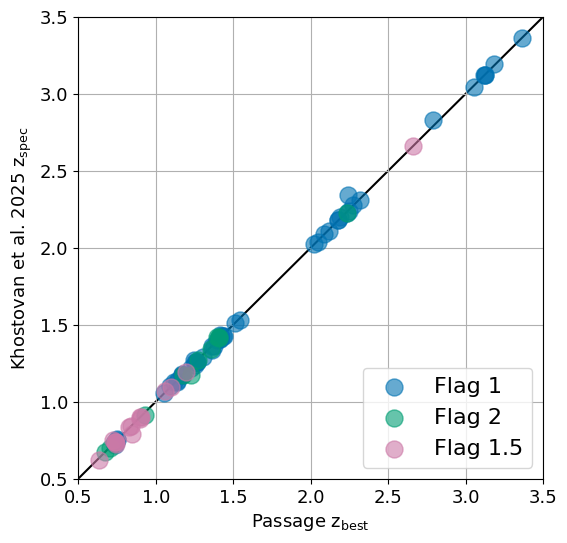

In [155]:
fig = plt.subplots(1, 1, figsize=(6,6))

palette = [
    "#0072B2",  # Blue
    "#009E73",  # Bluish green
    "#E69F00",  # Orange
    "#D55E00",  # Vermillion
    "#CC79A7",  # Reddish purple
]

plt.xlabel(r'PASSAGE $z_{best}$', fontsize=13)
plt.ylabel('Number of Sources',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
df.loc[df['index'] == 2098, 'zbest'] = -1
allow=[3,4]
plt.scatter(df[df['emline_flag_best']==1][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==1][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],color=palette[0],s=150,zorder=99,label='Flag 1',alpha=0.6)
plt.scatter(df[df['emline_flag_best']==2][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==2][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],s=150,color=palette[1],zorder=99,label='Flag 2',alpha=0.6)
#plt.scatter(df[df['emline_flag_best']==3][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==3][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],s=150,color=palette[2],zorder=99,label='Flag 3',alpha=0.6)
#plt.scatter(df[df['emline_flag_best']==4][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==4][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],s=150,color=palette[3],zorder=99,label='Flag 4',alpha=0.6)
plt.scatter(df[df['emline_flag_best']==1.5][df['khostz']>0][df['khostflag'].isin(allow)]['zbest'],df[df['emline_flag_best']==1.5][df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],s=150,color=palette[4],zorder=99,label='Flag 1.5',alpha=0.6)


plt.xlim(0.5,3.5)
plt.ylim(0.5,3.5)
plt.xlabel(r'Passage $\rm z_{best}$')
plt.ylabel(r'Khostovan et al. 2025 $\rm z_{spec}$')
x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
y=5008/6565*(1+x)-1
#plt.plot(x,y,"k--")
y=6565/3727*(1+x)-1
#plt.plot(x,y,"k:")
plt.plot([0.5,3.5],[0.5,3.5],"k",zorder=1)
plt.legend(fontsize=16,loc='lower right')
plt.grid()
xlow=df[df['khostz']>0][df['khostflag'].isin(allow)]['zbest']-df[df['khostz']>0][df['khostflag'].isin(allow)]['redshift_error']
xup=df[df['khostz']>0][df['khostflag'].isin(allow)]['zbest']+df[df['khostz']>0][df['khostflag'].isin(allow)]['redshift_error']
#plt.plot([xlow,xup],[df[df['khostz']>0][df['khostflag'].isin(allow)]['khostz'],df[df['khostz']>0][df['khostflag'].isin(allow)]['khostz']],color="red",alpha=1,zorder=0)



/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3521791390.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['emline_flag_best']==1][df['khostz']>0]['zbest'],df[df['emline_flag_best']==1][df['khostz']>0]['khostz'],color=palette[0],s=150,zorder=99,label='Flag 1',alpha=0.6)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3521791390.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['emline_flag_best']==1][df['khostz']>0]['zbest'],df[df['emline_flag_best']==1][df['khostz']>0]['khostz'],color=palette[0],s=150,zorder=99,label='Flag 1',alpha=0.6)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/3521791390.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['emline_flag_best']==2][df['khostz']>0]['zbest'],df[df['emline_flag_best']==2][df['khostz']>0]['khostz'],s=150,color=palette[1],zorder=

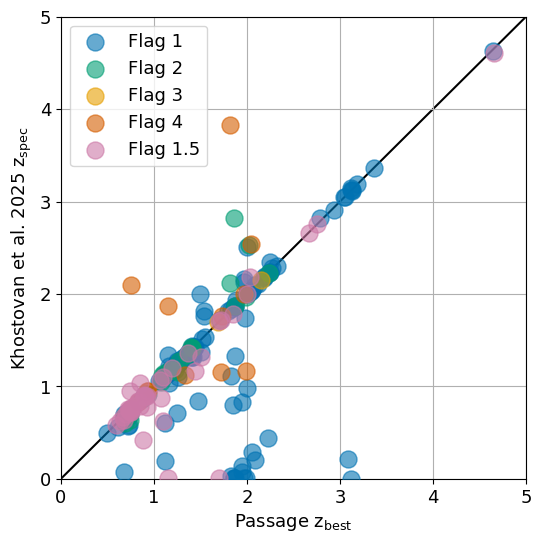

In [156]:
fig = plt.subplots(1, 1, figsize=(6,6))
plt.xlabel(r'PASSAGE $z_{best}$', fontsize=13)
plt.ylabel('Number of Sources',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
palette = [
    "#0072B2",  # Blue
    "#009E73",  # Bluish green
    "#E69F00",  # Orange
    "#D55E00",  # Vermillion
    "#CC79A7",  # Reddish purple
]
df.loc[df['index'] == 2098, 'zbest'] = -1
#allow=[3,4]
#["#1F2933","#3B82F6","#10B981","#EF4444","#F59E0B"]
plt.scatter(df[df['emline_flag_best']==1][df['khostz']>0]['zbest'],df[df['emline_flag_best']==1][df['khostz']>0]['khostz'],color=palette[0],s=150,zorder=99,label='Flag 1',alpha=0.6)
plt.scatter(df[df['emline_flag_best']==2][df['khostz']>0]['zbest'],df[df['emline_flag_best']==2][df['khostz']>0]['khostz'],s=150,color=palette[1],zorder=99,label='Flag 2',alpha=0.6)
plt.scatter(df[df['emline_flag_best']==3][df['khostz']>0]['zbest'],df[df['emline_flag_best']==3][df['khostz']>0]['khostz'],s=150,color=palette[2],zorder=99,label='Flag 3',alpha=0.6)
plt.scatter(df[df['emline_flag_best']==4][df['khostz']>0]['zbest'],df[df['emline_flag_best']==4][df['khostz']>0]['khostz'],s=150,color=palette[3],zorder=99,label='Flag 4',alpha=0.6)
plt.scatter(df[df['emline_flag_best']==1.5][df['khostz']>0]['zbest'],df[df['emline_flag_best']==1.5][df['khostz']>0]['khostz'],s=150,color=palette[4],zorder=99,label='Flag 1.5',alpha=0.6)

#plt.scatter(df[df['khostz']==0.28777][df['khostz']>0]['zbest'],df[df['khostz']==0.28777][df['khostz']>0]['khostz'],s=20,color='green',zorder=99,label='Flag 1.5')


plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel(r'Passage $\rm z_{best}$')
plt.ylabel(r'Khostovan et al. 2025 $\rm z_{spec}$')
x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
y=5008/6565*(1+x)-1
#plt.plot(x,y,"k--")
y=6565/3727*(1+x)-1
#plt.plot(x,y,"k:")
plt.plot([0,5],[0,5],"k",zorder=1)
plt.legend(fontsize=13)
plt.grid()

In [100]:
df[df['khostz']>0][df['Par']=='Par017']



/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/877894547.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['Par']=='Par017']


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
375      405   180.0   2.78872         0.00000  150.302818  1.873214   
387      417  1647.0   2.03370         0.00074  150.299092  1.886324   
408      439   334.0   1.73400         0.00056  150.306219  1.875139   

        snr_Ha  emline_flag     Par  index    zbest  emline_flag_best  \
375  -1.000000          1.0  Par017    375  2.78872               1.0   
387  25.927602          4.0  Par017    387  2.03370               1.5   
408  21.398964          4.0  Par017    408  1.73400               4.0   

       khostra  khostdec   khostz  khostflag  
375  150.30283   1.87318  2.82680        3.0  
387  150.29909   1.88631  2.18420        2.0  
408  150.30621   1.87514  1.75861       14.0

In [42]:
df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<1][df['zbest']>2]#['zbest']#,df[df['emline_flag_best']==1][df['khostz']>0]

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1029366716.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<1][df['zbest']>2]#['zbest']#,df[df['emline_flag_best']==1][df['khostz']>0]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1029366716.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<1][df['zbest']>2]#['zbest']#,df[df['emline_flag_best']==1][df['khostz']>0]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1029366716.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<1][df['zbest']>2]#['zbest']#,df[df['emline_flag_best']==1][df['khostz']>0]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
925       993  1526.0   2.22411         0.00019  150.261965  1.973831   
1133     1217  2258.0   2.08539         0.00000  150.107988  2.444316   
1228     1317   897.0   2.05113         0.00000  150.103442  2.409247   
1342     1432  2275.0   3.08421         0.00000  150.093847  2.421980   
1371     1461  2619.0   3.12195         0.00050  150.096342  2.425359   

         snr_Ha  emline_flag     Par  index    zbest  emline_flag_best  \
925   -1.000000          1.0  Par025    925  2.22411               1.0   
1133  -1.000000          1.0  Par026   1133  2.08539               1.0   
1228  14.600551          1.0  Par028   1228  2.05113               1.0   
1342  -1.000000          1.0  Par028   1342  3.08421               1.0   
1371  -1.000000          1.0  Par028   1371  3.12195               1.0   

        khostra  khostdec   khostz  khostflag  
925   150.26195   1.97386  0.43869        2.0  
1133  150.10803   2.44430  0.20223        2.0  
1228  150.10342   2.40925  0.28777        1.0  
1342  150.09386   2.42198  0.21033        1.0  
1371  150.09634   2.42535  0.00098        2.0

In [37]:
#150.2619646, 1.9738306
#150.2619967, 1.9740162

np.sqrt((150.2619646-150.2619967)**2+(1.9738306-1.9740162)**2)#*3600


0.00018835543528103715

In [38]:
8.33e-5


8.33e-05

In [546]:
df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<0.5]#[df['zbest']>1.5]

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/990428107.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<0.5]#[df['zbest']>1.5]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/990428107.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['emline_flag_best']==1][df['khostz']>0][df['khostz']<0.5]#[df['zbest']>1.5]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
1108     1191  1823.0   1.12334          0.0000  150.127684  2.440358   
1228     1317   897.0   2.05113          0.0000  150.103442  2.409247   
1276     1365  1436.0   1.98775          0.0000  150.073504  2.414209   
1331     1421  2147.0   1.94996          0.0000  150.073281  2.420553   
1342     1432  2275.0   3.08421          0.0000  150.093847  2.421980   
1366     1456  2544.0   1.85934          0.0000  150.087157  2.424680   
1371     1461  2619.0   3.12195          0.0005  150.096342  2.425359   

         snr_Ha  emline_flag     Par  index    zbest  emline_flag_best  \
1108  40.265487          1.0  Par026   1108  1.12334               1.0   
1228  14.600551          1.0  Par028   1228  2.05113               1.0   
1276  13.167702          1.0  Par028   1276  1.98775               1.0   
1331  14.107143          1.0  Par028   1331  1.94996               1.0   
1342  -1.000000          1.0  Par028   1342  3.08421               1.0   
1366  36.644295          1.0  Par028   1366  1.85934               1.0   
1371  -1.000000          1.0  Par028   1371  3.12195               1.0   

       khostz  
1108  0.19473  
1228  0.28777  
1276  0.01034  
1331  0.13703  
1342  0.21033  
1366  0.01036  
1371  0.00098

In [180]:
file_path_class1='passageincosmosweb_finalizedz_forpeter_final.dat'
df = pd.read_csv(file_path_class1,header=0, comment='#', sep='\t')

#file_path_class1 = 'passagezfinal_updatedz.dat'
#file_path_class1 = 'passagezfinal_updatedz_forpeter2.dat'
#df = pd.read_csv(file_path_class1,header=0, comment='#')
#df

samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hduk[1].data['ra_corrected']#dat['ra      ']#.data
cat_y = hduk[1].data['dec_corrected']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hduk[1].data['ra_corrected'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hduk[1].data['dec_corrected'][idx[sel_samp]]

#tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt3[sel_samp] = hduk[1].data['id      '][idx[sel_samp]]

#tt44 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt4[sel_samp] = hduk[1].data['specz'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt5[sel_samp] = hduk[1].data['flag'][idx[sel_samp]]

#tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

#tt6 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

#tt7 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
#tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df['khostra']=tt
df['khostdec']=tt2
#df['cosmosid']=tt3
df['khostz']=tt4
df['khostflag']=tt5
#df['cosmoshst']=tt44
#df['cosmoszmed']=tt5
#df['cosmoszlow']=tt6
#df['cosmoszup']=tt7
allow=[3,4]
df[df['khostz']>0][df['khostflag'].isin(allow)][abs(df['zbest']-df['khostz'])>0.1]
df


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1296423450.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['khostflag'].isin(allow)][abs(df['zbest']-df['khostz'])>0.1]
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_84710/1296423450.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['khostz']>0][df['khostflag'].isin(allow)][abs(df['zbest']-df['khostz'])>0.1]


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
1327     2300  2764.0   2.58084         0.00106  150.111570  1.809054   
1328     2301  2836.0   2.76117         0.00049  150.097342  1.811004   
1329     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
1330     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
1331     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  ...  cosmosid  cosmosz  \
0     -1.000000          4.0  Par003      0  ...  511464.0   0.1172   
1     -1.000000          4.0  Par003      1  ...  511465.0   2.1090   
2     -1.000000          3.0  Par003      2  ...  512161.0   0.6671   
3      6.531915          4.0  Par003      3  ...  511697.0   2.9169   
4      9.038095          4.0  Par003      4  ...  512848.0   3.1868   
...         ...          ...     ...    ...  ...       ...      ...   
1327  -1.000000          3.0  Par053   2169  ...  311291.0   2.6624   
1328  -1.000000          2.0  Par053   2170  ...  310970.0   2.7442   
1329  11.651786          4.0  Par053   2181  ...  311236.0   2.2941   
1330  10.322581          4.0  Par053   2182  ...  311071.0   3.8818   
1331   6.029963          4.0  Par053   2183  ...  311327.0   3.4153   

      cosmoshst  cosmoszmed  cosmoszlow  cosmoszup    khostra  khostdec  \
0     25.211860      0.1172      0.0454     0.1836  150.41074   2.38461   
1     25.216494      2.1090      2.0293     2.2053  150.41074   2.38461   
2     27.743172      0.6671      0.4550     0.7600   -1.00000  -1.00000   
3     25.966786      2.9169      2.7610     3.0821   -1.00000  -1.00000   
4     25.964520      3.1868      3.0388     3.4203   -1.00000  -1.00000   
...         ...         ...         ...        ...        ...       ...   
1327  25.325308      2.6624      2.5409     2.7304   -1.00000  -1.00000   
1328  26.251591      2.7442      2.6829     2.8077   -1.00000  -1.00000   
1329  26.928000      2.2941      0.2840     2.6514   -1.00000  -1.00000   
1330  24.959286      3.8818      3.7380     3.9778   -1.00000  -1.00000   
1331  25.855949      3.4153      3.3540     3.4581   -1.00000  -1.00000   

      khostz  khostflag  
0      -99.0        0.0  
1      -99.0        0.0  
2       -1.0       -1.0  
3       -1.0       -1.0  
4       -1.0       -1.0  
...      ...        ...  
1327    -1.0       -1.0  
1328    -1.0       -1.0  
1329    -1.0       -1.0  
1330    -1.0       -1.0  
1331    -1.0       -1.0  

[1332 rows x 24 columns]

In [181]:

df[df['objid']==3266]#dfd[dfd['']>0]

level_0   objid  redshift  redshift_error      ra_obj  dec_obj    snr_Ha  \
882     1518  3266.0    1.8735             0.0  150.085539  2.43329  57.54717   

     emline_flag     Par  index  ...  cosmosid  cosmosz  cosmoshst  \
882          1.0  Par028   1428  ...  423415.0   1.9522  25.128779   

     cosmoszmed  cosmoszlow  cosmoszup    khostra  khostdec   khostz  \
882      1.9522      1.9156      1.974  150.08557   2.43327  0.01029   

     khostflag  
882        1.0  

[1 rows x 24 columns]

In [182]:
dfq=df
#dfq=dfq[dfq['cosmosid'] == -1]
#dfq = dfq.reset_index()

samp_x = np.array(dfq['ra_obj'])#.data
samp_y = np.array(dfq['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



dfq['cosmos2020ra']=tt
dfq['cosmos2020dec']=tt2
dfq['cosmos2020id']=tt3
dfq['cosmos2020z']=tt4
dfq['cosmos2020hst']=tt44
dfq['cosmos2020zlow']=tt6
dfq['cosmos2020zup']=tt7
dfq



level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
1327     2300  2764.0   2.58084         0.00106  150.111570  1.809054   
1328     2301  2836.0   2.76117         0.00049  150.097342  1.811004   
1329     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
1330     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
1331     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  ...  khostdec  khostz  khostflag  \
0     -1.000000          4.0  Par003      0  ...   2.38461   -99.0        0.0   
1     -1.000000          4.0  Par003      1  ...   2.38461   -99.0        0.0   
2     -1.000000          3.0  Par003      2  ...  -1.00000    -1.0       -1.0   
3      6.531915          4.0  Par003      3  ...  -1.00000    -1.0       -1.0   
4      9.038095          4.0  Par003      4  ...  -1.00000    -1.0       -1.0   
...         ...          ...     ...    ...  ...       ...     ...        ...   
1327  -1.000000          3.0  Par053   2169  ...  -1.00000    -1.0       -1.0   
1328  -1.000000          2.0  Par053   2170  ...  -1.00000    -1.0       -1.0   
1329  11.651786          4.0  Par053   2181  ...  -1.00000    -1.0       -1.0   
1330  10.322581          4.0  Par053   2182  ...  -1.00000    -1.0       -1.0   
1331   6.029963          4.0  Par053   2183  ...  -1.00000    -1.0       -1.0   

      cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  cosmos2020hst  \
0       150.410749       2.384603     1020375.0       2.2344      24.837494   
1       150.410749       2.384603     1020375.0       2.2344      24.837494   
2        -1.000000      -1.000000          -1.0      -1.0000      -1.000000   
3       150.406751       2.387888     1023478.0       3.1820      25.790787   
4       150.422781       2.389852     1025574.0          NaN      26.699453   
...            ...            ...           ...          ...            ...   
1327    150.111575       1.809048      405589.0       2.5615      25.345657   
1328    150.097349       1.810997      407250.0       0.0546      26.189287   
1329    150.117795       1.806215      402221.0       0.0510      26.932524   
1330    150.105865       1.808863      405671.0       3.7344      24.544498   
1331    150.108519       1.810483      406952.0       3.5645      25.858517   

      cosmos2020zlow  cosmos2020zup  
0             2.1604         2.4043  
1             2.1604         2.4043  
2            -1.0000        -1.0000  
3             2.9544         3.3348  
4             0.0704         2.9734  
...              ...            ...  
1327          2.4766         2.6605  
1328          0.0268         0.1046  
1329          0.0190         0.1213  
1330          0.4110         3.8710  
1331          3.3898         3.7213  

[1332 rows x 31 columns]

In [183]:
dfq[dfq['objid']==3266]#dfd[dfd['']>0]

level_0   objid  redshift  redshift_error      ra_obj  dec_obj    snr_Ha  \
882     1518  3266.0    1.8735             0.0  150.085539  2.43329  57.54717   

     emline_flag     Par  index  ...  khostdec   khostz  khostflag  \
882          1.0  Par028   1428  ...   2.43327  0.01029        1.0   

     cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  cosmos2020hst  \
882    150.085604       2.433297     1070736.0          NaN      25.199976   

     cosmos2020zlow  cosmos2020zup  
882             NaN         0.0209  

[1 rows x 31 columns]

In [ ]:
#2227	4425.0	1.88166	0.0	150.146135	2.064027	53.94736842105264	1.0	Par052	2098	1.88166	1.0	150.14614705096798	2.064024108634318	87278.0	0.6584	21.88979672854204	0.6584	0.65	0.6682


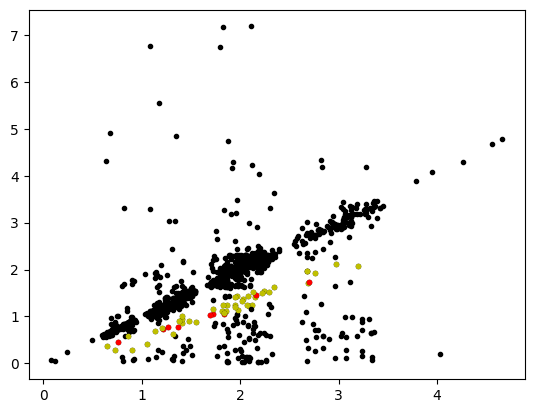

In [376]:
x=df['zbest']
y=df['cosmosz']
par=df['Par']
ind=df['index']
f=df['emline_flag_best']
x=x#[f<3]
y=y#[f<3]
par=par#[f<3]
ind=ind#[f<3]

inx=[]
c=0
for iii in range(len(x)):
    #print(iii)
    target=np.array(x)[iii]
    cosx=np.array(y)[iii]
    pr=np.array(par)[iii]
    xxx=np.array(ind)[iii]
    y6565=5008.24/6564.61*(1+target)-1
    #print(cosx,y6565)
    #if abs(y6565-cosx)<0.1828051579601147:
    if pr =='Par028':
        plt.plot([target],[cosx],"k.")
        if abs(y6565-cosx)<0.1828051579601147:
            plt.plot([target],[cosx],"r.")
            c+=1
            inx.append(xxx)
    else:
        plt.plot([target],[cosx],"k.")
        if abs(y6565-cosx)<0.1828051579601147:
            plt.plot([target],[cosx],"y.")
            c+=1
            inx.append(xxx)


        

In [377]:
c

52

In [374]:
df[df['index'].isin(inx)][['objid', 'redshift','cosmosz','cosmosid']]


objid  redshift  cosmosz  cosmosid
25    1358.0  2.679170   1.9715  513745.0
700   2480.0  2.152150   1.4111  439757.0
770    183.0  1.966330   1.4427  431684.0
789   1334.0  1.854440   1.1240  434171.0
911    797.0  2.122540   1.2370  118368.0
921   1174.0  1.412260   0.8501  119399.0
927   1699.0  1.404875   0.9470  118950.0
948   2524.0  1.552355   0.8799  121289.0
988    191.0  1.052640   0.4105  348179.0
1007  1662.0  1.949960   1.2440  118903.0
1059   959.0  1.868680   1.2378  465044.0
1127  2141.0  1.828930   1.2490  427192.0
1143  2722.0  1.410470   1.0028  426515.0
1200   475.0  2.698930   1.7321  647143.0
1244  1112.0  1.833230   1.0548  661065.0
1259  1255.0  1.269200   0.7771  647693.0
1323  2086.0  1.215420   0.7393  649504.0
1408  3088.0  1.725310   1.0450  650703.0
1419  3154.0  1.694140   1.0356  423850.0
1431  3294.0  1.373550   0.7651  451490.0
1434  3324.0  2.157530   1.4481  423806.0
1781   232.0  1.982120   1.1407  121603.0
1818   706.0  1.946060   1.2030  121744.0
1827   846.0  2.080160   1.4292  122809.0
1878  1679.0  1.950960   1.4104  123134.0
1929  2409.0  2.023930   1.3235   83708.0
2020  3450.0  1.135680   0.6990  125757.0
2099  4428.0  1.841230   1.0679   87223.0

In [ ]:
475,1112,1255,2086,3088,3154,3294,3324

In [335]:
x=df['zbest']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag_best']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

print('len',len(x))
for iii in range(len(x)):
    print(iii,np.array(x)[iii])
    

len 1249
0 2.96365
1 2.97334
2 3.36305
3 2.16666
4 1.90717
5 1.79045
6 2.69279
7 1.8007
8 1.82481
9 1.96422
10 1.81435
11 1.8652
12 1.81371
13 1.83927
14 2.2008
15 2.67677
16 2.31322
17 1.81371
18 2.67822
19 2.65334
20 2.671457089935785
21 2.75989
22 2.67888
23 3.19373
24 2.24452
25 2.67917
26 2.1177
27 2.03172
28 1.799
29 2.95922
30 2.18636
31 2.73348
32 1.94389
33 2.63121
34 2.89273
35 2.03553
36 2.6265
37 4.559596473822477
38 1.79906
39 3.31469
40 2.32624
41 2.1824
42 3.24133
43 2.84037
44 2.93258
45 2.78872
46 2.91587
47 2.7906
48 2.60036
49 2.13183
50 2.21473
51 2.0705
52 2.88605
53 3.23645
54 2.80087
55 3.06579
56 3.06199
57 2.0337
58 3.24133
59 2.96289
60 2.2105200000000003
61 3.34239
62 3.24133
63 2.70867
64 1.91869
65 2.21425
66 3.05413
67 1.05131
68 2.84239354467837
69 3.2378
70 1.79358
71 1.74609
72 1.734
73 3.08421
74 2.03954
75 1.99086
76 2.08781
77 2.2919400000000003
78 2.21663
79 2.93912
80 2.15767
81 1.86292
82 1.91351
83 2.1549
84 2.21473
85 1.87196
86 1.84025
87 3.285

In [ ]:
inx

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2040656359.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20b_cmap = cm.get_cmap('Set1')


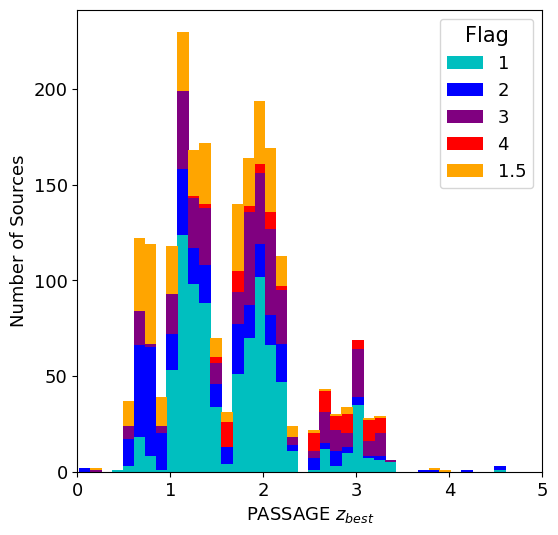

In [415]:
file_path_class1 = 'passagezfinal_updatedz.dat'
fdf = pd.read_csv(file_path_class1,header=0, comment='#')
fig = plt.subplots(1, 1, figsize=(6,6))
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get the tab20b colormap
#fdf=
tab20b_cmap = cm.get_cmap('Set1')
colors3=['c','b','purple','r','orange']
nbins=40
cc=0
#fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
bins = np.linspace(np.min(fdf['zbest']),np.max(fdf['zbest']),nbins)#np.arange(0,4,20)
grouped = fdf.groupby('emline_flag_best')
#print(grouped)
bottom = np.zeros(len(bins) - 1)
for label, group in grouped:
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['zbest'], bins=bins)
    #print(counts)
    plt.bar(bins[:-1], counts, color=colors3[cc],width=5/nbins, bottom=bottom, label=label, alpha=1)#color=tab20b_cmap(cc)
    bottom += counts  # update bottom for stacking
    cc+=1
plt.xlabel('PASSAGE $z_{best}$', fontsize=13)
plt.ylabel('Number of Sources',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
#plt.title('Flags of Each $z_{best}$', fontsize=13)
#ax2.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.xlim(0,5)
#plt.title('Histogram of Redshifts')
plt.legend(labels=['1','2','3','4','1.5'],title='Flag',fontsize=13, title_fontsize=15)

20.59663382286893
30.658650593536816


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/543553630.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=99,label='Flag 1')
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/543553630.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  ax0.scatter(df9agn['redshift'],[4.64],color="teal",s=[22.625453],norm=norm,zorder=1,alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/543553630.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",marker='D',s=size,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/543553630.py:93: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatt

21.93389129638672
27.942642211914062


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/543553630.py:203: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="r",marker='D',s=size,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)


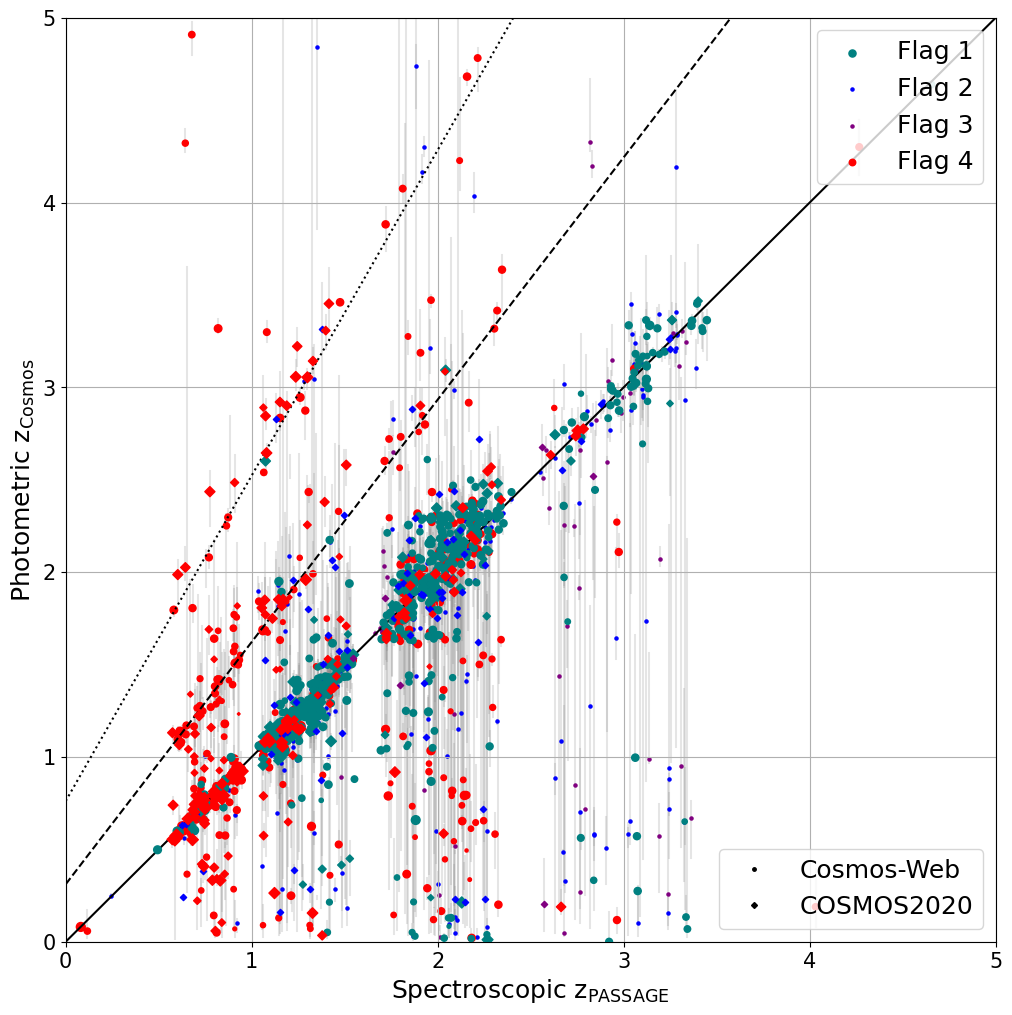

In [185]:
x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
#print(dz2)

fig, ax0 = plt.subplots(1, 1,figsize=(12,12))




from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(dz2),vmax=np.max(dz2))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]


size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
size=size[f==1]
size=np.where(size<0,0,size)



yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=99,label='Flag 1')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)

df9agn=df[df['redshift']>4.5]
ax0.scatter(df9agn['redshift'],[4.64],color="teal",s=[22.625453],norm=norm,zorder=1,alpha=0.4)


x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
size=size[f==1]
size=np.where(size<0,0,size)
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="teal",marker='D',s=size,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="blue",s=5,norm=norm,label='Flag 2')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="blue",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="purple",s=5,norm=norm,label='Flag 3')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']
x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="purple",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
size=size[f==4]
size=np.where(size<0,0,size)
#f=f[f==1]
sp=ax0.scatter(x,y,color="r",s=size,norm=norm,label='Flag 4')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmos2020hst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmos2020hst']
x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
size=size[f==4]
size=np.where(size<0,0,size)
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="r",marker='D',s=size,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")



ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)
#plt.legend(fontsize=15)
first_legend = ax0.legend(loc='upper right', fontsize=18)
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax0.add_artist(first_legend)
# Create the second legend
l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)


min 0.08103
max 4.65045
-1.0
30.658650593536816
-1.0
27.942642211914062


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3483521209.py:72: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=99,label='Flag 1',alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3483521209.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  ax3.scatter(x,y-x,color="teal",s=size,norm=norm,zorder=99,label='Flag 1',alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3483521209.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  ax0.scatter(df9agn['redshift'],[4.64],color="teal",s=[22.625453],norm=norm,zorder=99,alpha=0.4)
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3483521209.py:109: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax1.scatter(x,y,color="teal",ma

(0.0, 5.0)

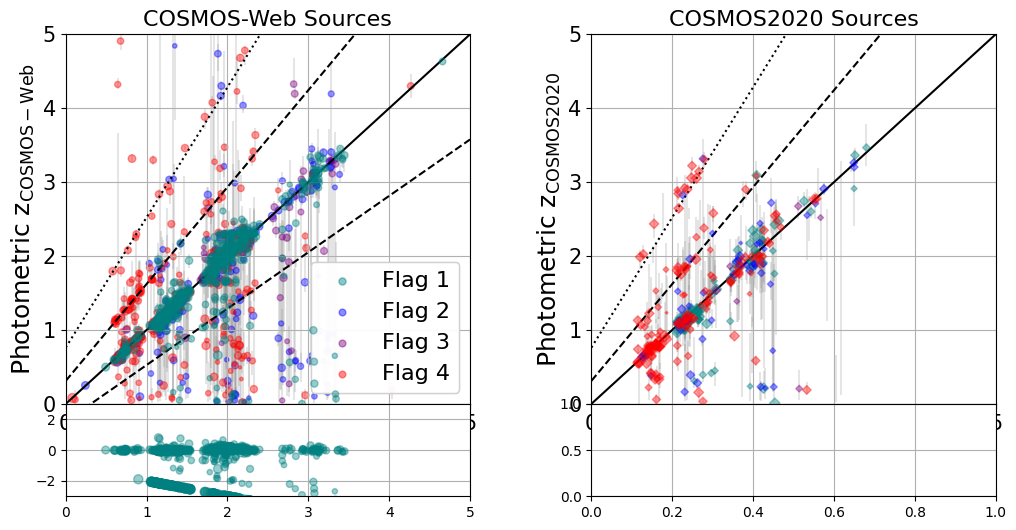

In [124]:
x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

#print(dz2)
import matplotlib.gridspec as gridspec
print('min',min(x))
print('max',max(x))

#fig, (ax0,ax1) = plt.subplots(1, 2,figsize=(12,5))
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(
    2, 2,
    hspace=0,   # no vertical space between rows
    wspace=0.3  # small horizontal gap
    , height_ratios=[4, 1]
)

# Top left and top right subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Bottom subplot spanning both columns, sharing x-axis with the top panels
ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[1, 1], sharex=ax2)



from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(size),vmax=np.max(size))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
#print(size)
#size=np.log10(np.array(size[f==1])/1-20)*10

size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
# = 5 + (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==1]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
#size=np.subtract(size,20)
#print(size)
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=99,label='Flag 1',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)
ax3.scatter(x,y-x,color="teal",s=size,norm=norm,zorder=99,label='Flag 1',alpha=0.4)

df9agn=df[df['redshift']>4.5]
ax0.scatter(df9agn['redshift'],[4.64],color="teal",s=[22.625453],norm=norm,zorder=99,alpha=0.4)
#for jj in df9:
#    if df9==
#650143




x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmoshst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmoshst']

print(np.min(dz2))
print(np.max(dz2))

size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==1]
size=np.where(size<0,0,size)
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="teal",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==2]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="blue",s=size,norm=norm,label='Flag 2',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmoshst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmoshst']

x=x[f==2]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==2]
size=np.where(size<0,0,size)
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="blue",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']
x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==3]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="purple",s=size,norm=norm,label='Flag 3',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmoshst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmoshst']

x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==3]
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="purple",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=df['redshift']
y=df['cosmosz']
dz2=df['cosmoshst']
f=df['emline_flag']
yup=df['cosmoszup']
ylow=df['cosmoszlow']
size=df['cosmoshst']

x=x[f==4]
size=np.array(dz2)#np.array(size)
size=np.where(size<15,22,size)
#print(dz2)
#prin(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==4]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="r",s=size,norm=norm,label='Flag 4',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=dfq['redshift']
y=dfq['cosmos2020z']
dz2=dfq['cosmoshst']
f=dfq['emline_flag']
yup=dfq['cosmos2020zup']
ylow=dfq['cosmos2020zlow']
size=dfq['cosmoshst']

x=x[f==4]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==4]
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="r",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")


x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
ax1.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha


#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax1.plot(x,y,"k:")


ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{COSMOS-Web}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")
ax1.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax1.set_ylabel(r'$\rm Photometric\ z_{COSMOS2020}$', fontsize=18)
ax0.set_title('COSMOS-Web Sources', fontsize=16)
ax1.set_title('COSMOS2020 Sources', fontsize=16)
#plt.title('Flag 4 Only', fontsize=13)
ax1.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)


ax1.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax1.yaxis.set_tick_params(labelsize=15)

#plt.legend(fontsize=15)
first_legend = ax0.legend(fontsize=16,loc='lower right')
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax0.add_artist(first_legend)
# Create the second legend

ax3.grid()
ax4.grid()
ax3.set_ylim(-3,3)
ax3.set_xlim(0,5)
#l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
#l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
#second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)


In [70]:
with open('zoutput.csv', 'r') as f:
    newz = list(map(float, f.read().split(',')))
#newz

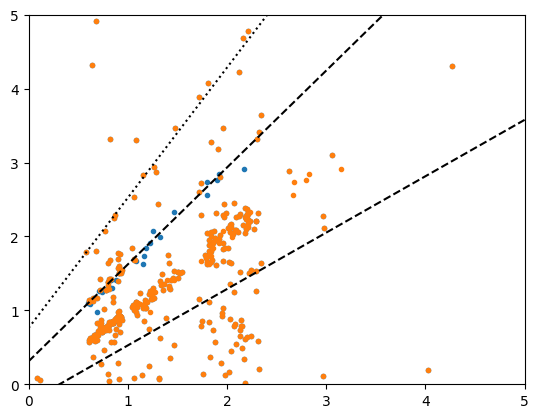

In [86]:
allow4=[4]
#dfcw2=dfcw[dfcw['emline_flag'].isin(allow4)]

plt.scatter(dfcw['redshift'][dfcw['emline_flag'].isin(allow4)],dfcw['cosmosz'][dfcw['emline_flag'].isin(allow4)],marker=".")
plt.scatter(np.array(newz)[dfcw['emline_flag'].isin(allow4)],dfcw['cosmosz'][dfcw['emline_flag'].isin(allow4)],marker=".")
plt.xlim(0,5)
plt.ylim(0,5)
x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
plt.plot(x,y,"k:")

0.4968 1.80101 2.8173
0.1658 0.83954 1.5599
1.1585 1.25819 2.2758
0.5539 1.46679 3.063
0.3435 1.16752 6.2143
0.6799 1.0863 1.9168


(0.0, 5.0)

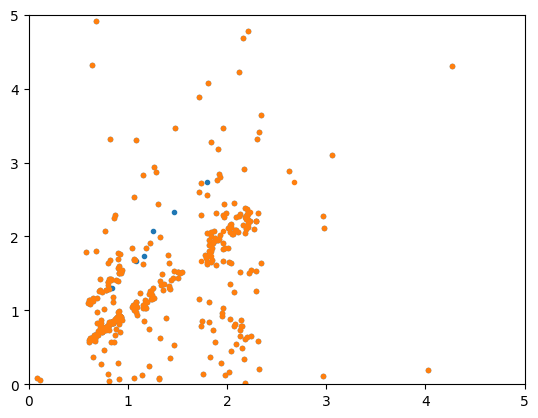

In [237]:

zpass=np.array(dfcw[dfcw['emline_flag'].isin(allow4)]['redshift'])
zcos=np.array(dfcw[dfcw['emline_flag'].isin(allow4)]['cosmosz'])
zcosup=np.array(dfcw[dfcw['emline_flag'].isin(allow4)]['cosmoszup'])
zcoslow=np.array(dfcw[dfcw['emline_flag'].isin(allow4)]['cosmoszlow'])
zn=[]
#print(zpass)
for i in range(len(zpass)):
    target=zpass[i]
    y5007=6564.61/5008.24*(1+target)-1
    if abs(y5007-zcos[i])>0.25:
        zn.append(target)
    else:
        if zcoslow[i]<target<zcosup[i]:
            print(zcoslow[i],target,zcosup[i])
            zn.append(y5007)
        else:
            zn.append(target)
plt.scatter(zpass,zcos,marker=".")
plt.scatter(zn,zcos,marker=".")
plt.xlim(0,5)
plt.ylim(0,5)

In [236]:
dfcw

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2169     2300  2764.0   2.58084         0.00106  150.111570  1.809054   
2170     2301  2836.0   2.76117         0.00049  150.097342  1.811004   
2181     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2182     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2183     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

      emline_flag     Par  index    cosmosra  cosmosdec  cosmosid  cosmosz  \
0             4.0  Par003      0  150.410715   2.384564  511464.0   0.1172   
1             4.0  Par003      1  150.410797   2.384621  511465.0   2.1090   
2             3.0  Par003      2  150.415515   2.387915  512161.0   0.6671   
3             4.0  Par003      3  150.406756   2.387884  511697.0   2.9169   
4             4.0  Par003      4  150.422776   2.389848  512848.0   3.1868   
...           ...     ...    ...         ...        ...       ...      ...   
2169          3.0  Par053   2169  150.111577   1.809041  311291.0   2.6624   
2170          2.0  Par053   2170  150.097345   1.811002  310970.0   2.7442   
2181          4.0  Par053   2181  150.117799   1.806220  311236.0   2.2941   
2182          4.0  Par053   2182  150.105874   1.808868  311071.0   3.8818   
2183          4.0  Par053   2183  150.108506   1.810472  311327.0   3.4153   

      cosmoshst  cosmoszmed  cosmoszlow  cosmoszup  
0     25.211860      0.1172      0.0454     0.1836  
1     25.216494      2.1090      2.0293     2.2053  
2     27.743172      0.6671      0.4550     0.7600  
3     25.966786      2.9169      2.7610     3.0821  
4     25.964520      3.1868      3.0388     3.4203  
...         ...         ...         ...        ...  
2169  25.325308      2.6624      2.5409     2.7304  
2170  26.251591      2.7442      2.6829     2.8077  
2181  26.928000      2.2941      0.2840     2.6514  
2182  24.959286      3.8818      3.7380     3.9778  
2183  25.855949      3.4153      3.3540     3.4581  

[1295 rows x 17 columns]

In [97]:
dzs=(zcos-zpass)/(1+zpass)
sigmanmad=1.48*np.nanmedian(np.abs(dzs-np.nanmedian(dzs)))
sigmanmad



0.09687207635337619

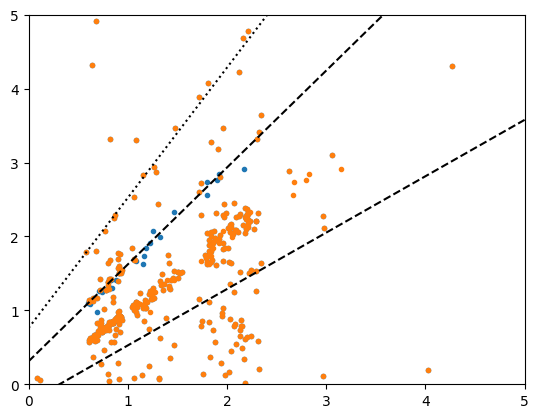

In [87]:
allow4=[4]
#dfcw2=dfcw[dfcw['emline_flag'].isin(allow4)]

plt.scatter(dfcw['redshift'][dfcw['emline_flag'].isin(allow4)],dfcw['cosmosz'][dfcw['emline_flag'].isin(allow4)],marker=".")
plt.scatter(np.array(newz)[dfcw['emline_flag'].isin(allow4)],dfcw['cosmosz'][dfcw['emline_flag'].isin(allow4)],marker=".")
plt.xlim(0,5)
plt.ylim(0,5)
x=np.linspace(0,5,20)
y=6565/5008*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha

y=5008/6565*(1+x)-1
#ax1.plot(x,y,"k--")
plt.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
plt.plot(x,y,"k:")

In [31]:
np.mean(df['redshift_error'])

0.0005476369687659979

In [32]:
np.median(df['redshift_error'])

0.00036

In [37]:
vals=[3266]
df8[df8['objid'].isin(vals)]

objid  redshift  redshift_error      ra_obj  dec_obj  snr_tot_others  \
251   3266    1.8735             0.0  150.085539  2.43329            86.8   

       snr_OII    snr_OIII     snr_Hb    snr_Ha  snr_Pb  snr_SIII  \
251  38.247863  130.473373  21.603563  57.54717    -1.0      -1.0   

     emline_flag     Par  
251            1  Par028

In [38]:
vals=[3266]
df[df['objid'].isin(vals)]

objid  redshift  redshift_error      ra_obj  dec_obj  snr_tot_others  \
1102  3266.0    1.8735             0.0  150.085539  2.43329            86.8   

        snr_OII    snr_OIII     snr_Hb    snr_Ha  ...  emline_flag     Par  \
1102  38.247863  130.473373  21.603563  57.54717  ...          1.0  Par028   

        cosmosra cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
1102  150.085549  2.433284  423415.0   1.9522  25.128779      1.9522   

      cosmoszlow  cosmoszup  
1102      1.9156      1.974  

[1 rows x 22 columns]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/2141008874.py:2: SyntaxWarning: invalid escape sequence '\s'
  dfc = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')


(array([45., 30.,  5., 43.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

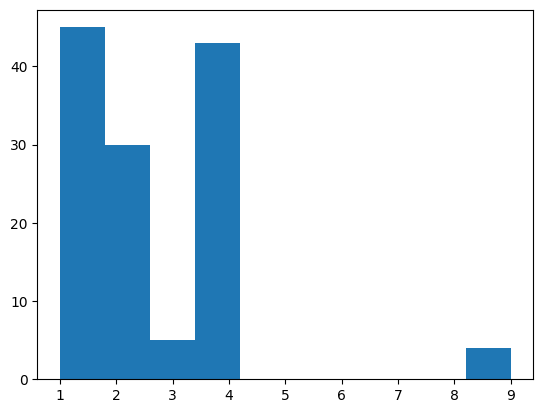

In [128]:
file_path_class1 = 'Par029lines_reconciled_with_flags.dat'
dfc = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
plt.hist(dfc['emline_flag'])

In [8]:
file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
df1

samp_x = np.array(df1['ra_obj'])#.data
samp_y = np.array(df1['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df1['cosmosra']=tt
df1['cosmosdec']=tt2
df1['cosmosid']=tt3
df1['cosmosz']=tt4
df1['cosmoshst']=tt44
df1['cosmoszmed']=tt5
df1['cosmoszlow']=tt6
df1['cosmoszup']=tt7

df1


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_36407/3909328702.py:2: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')


objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0        8   1.96988         0.00000  150.142174  2.476397      25.52   
1        9   1.97364         0.00025  150.142183  2.476540      24.11   
2       31   0.81933         0.00000  150.143154  2.478128      26.57   
3       91   2.11985         0.00115  150.144131  2.480157      24.91   
4      143   2.13190         0.00000  150.133466  2.481628      24.23   
..     ...       ...             ...         ...       ...        ...   
124   3703   1.42841         0.00177  150.126082  2.517314      25.87   
125   3713   2.28332         0.00099  150.131621  2.517379      24.77   
126   3721   0.59215         0.00041  150.119086  2.517642      25.10   
127   3726   2.29374         0.00209  150.127834  2.517718      25.25   
128   3808   1.32667         0.00000  150.127576  2.518902      21.79   

     a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_SIII  \
0          3.587        2.976            7.33   9.88  ...      -1.0   
1          4.029        2.975           41.54  15.14  ...      -1.0   
2          2.899        2.584            8.65   9.35  ...      -1.0   
3          3.009        2.087           10.53  10.20  ...      -1.0   
4          6.425        3.035            9.00  15.09  ...      -1.0   
..           ...          ...             ...    ...  ...       ...   
124        3.036        2.688            9.20  14.32  ...      -1.0   
125        4.382        3.210            4.47  13.08  ...      -1.0   
126        4.774        2.951            0.00  -5.07  ...      -1.0   
127        4.258        2.594            3.12  10.53  ...      -1.0   
128       12.613       10.496            9.51  21.25  ...      -1.0   

     emline_flag    cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  \
0              2   -1.000000  -1.000000      -1.0  -1.0000  -1.000000   
1              1  150.142181   2.476513  431674.0   1.6867  24.219292   
2              4  150.143155   2.478125  431943.0   1.6826  27.680216   
3              2  150.144135   2.480148  432297.0   2.3428  25.440988   
4              1  150.133470   2.481622  431949.0   2.1160  25.157714   
..           ...         ...        ...       ...      ...        ...   
124            2  150.126085   2.517304  436410.0   1.5006  26.368976   
125            2  150.131626   2.517370  436749.0   2.1674  25.812756   
126            9  150.119100   2.517639  436079.0   1.0498  25.530955   
127            4  150.127841   2.517710  436589.0   2.2051  25.875244   
128            1  150.127573   2.518894  436785.0   1.1970  23.877369   

     cosmoszmed  cosmoszlow  cosmoszup  
0       -1.0000     -1.0000    -1.0000  
1        1.6867      1.6800     1.7000  
2        1.6826      1.1410     1.9177  
3        2.3428      2.3110     2.3612  
4        2.1160      2.0821     2.1656  
..          ...         ...        ...  
124      1.5006      1.3445     1.6353  
125      2.1674      2.0829     2.2813  
126      1.0498      1.0347     1.0677  
127      2.2051      2.1171     2.3190  
128      1.1970      1.1840     1.3037  

[129 rows x 286 columns]

In [470]:
file_path_class1 = 'Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')

samp_x = np.array(df2['ra_obj'])#.data
samp_y = np.array(df2['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df2['cosmosra']=tt
df2['cosmosdec']=tt2
df2['cosmosid']=tt3
df2['cosmosz']=tt4
df2['cosmoshst']=tt44
df2['cosmoszmed']=tt5
df2['cosmoszlow']=tt6
df2['cosmoszup']=tt7




In [472]:
df22=df2
df22=df22[df22['cosmosid'] == -1]
df22 = df22.reset_index()

samp_x = np.array(df22['ra_obj'])#.data
samp_y = np.array(df22['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df22['cosmos2020ra']=tt
df22['cosmos2020dec']=tt2
df22['cosmos2020id']=tt3
df22['cosmos2020z']=tt4
df22['cosmoshst']=tt44
df22['cosmos2020zlow']=tt6
df22['cosmos2020zup']=tt7
df22

index  objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0       0     43   1.42446         0.00056  150.508911  2.242165      21.98   
1       1     99   0.71327         0.00067  150.502323  2.244129      25.82   
2       5    175   0.84091         0.00000  150.505076  2.245905      23.40   
3       6    262   0.83280         0.00113  150.505114  2.247464      25.34   
4       8    450   0.86211         0.00000  150.505311  2.249965      24.27   
5      10    557   0.89893         0.00000  150.512166  2.250914      24.71   
6      12    615   0.88483         0.00000  150.514321  2.251821      25.71   
7      17    931   0.82105         0.00123  150.510925  2.254479      24.64   
8      22   1377   0.84037         0.00000  150.517505  2.258259      21.57   
9      25   1424   0.61967         0.00078  150.499056  2.259432      23.90   
10     27   1514   1.46787         0.00035  150.512087  2.260283      22.91   
11     32   1764   0.69944         0.00046  150.516541  2.262485      24.05   
12     33   1770   0.69507         0.00000  150.516297  2.262561      25.26   
13     34   1793   0.90718         0.00000  150.510076  2.262782      25.41   
14     38   1867   0.92888         0.00065  150.521518  2.263512      25.26   
15     41   1961   0.93648         0.00000  150.513679  2.264289      23.38   
16     42   1981   0.91526         0.00024  150.514687  2.264496      23.47   
17     45   2137   0.90916         0.00030  150.518073  2.265868      22.39   
18     48   2333   0.77107         0.00057  150.517163  2.267916      26.09   
19     50   2447   0.91666         0.00000  150.487304  2.269279      26.61   
20     51   2480   0.91649         0.00174  150.492938  2.269464      24.21   
21     52   2510   0.85484         0.00000  150.515783  2.269855      24.46   
22     53   2512   0.61063         0.00000  150.524887  2.269732      23.47   
23     54   2534   0.71062         0.00077  150.525799  2.270192      24.53   
24     55   2561   0.57421         0.00183  150.520682  2.270445      24.03   
25     57   2618   0.80469         0.00000  150.523554  2.271000      24.66   
26     60   2851   0.60361         0.00021  150.524970  2.273350      23.19   
27     61   2857   0.63642         0.00000  150.512886  2.273742      24.66   
28     63   2905   0.61063         0.00000  150.523942  2.274446      24.08   
29     64   2911   0.73236         0.00135  150.514526  2.274508      25.05   
30     66   3002   0.75590         0.00000  150.512544  2.275563      25.47   
31     67   3092   0.74778         0.00051  150.510063  2.276918      24.01   
32     70     88   1.48334         0.00000  150.506308  2.243861      26.31   
33     71    150   0.81507         0.00092  150.503702  2.245279      22.51   
34     77    993   0.90261         0.00385  150.498701  2.254954      24.00   
35     78   1563   1.49339         0.00035  150.513473  2.260617      24.67   
36     79   1813   0.79801         0.00000  150.516309  2.262901      24.15   
37     80   2190   0.87123         0.00083  150.512402  2.266440      23.88   
38     83   2953   1.50166         0.00000  150.511646  2.274861      24.37   

    a_image_obj  b_image_obj  snr_tot_others  ...  cosmoshst  cosmoszmed  \
0         7.809        6.795            0.00  ...  23.243340        -1.0   
1         3.127        2.368           15.44  ...  27.536448        -1.0   
2         6.405        4.600           12.59  ...  24.613409        -1.0   
3         4.901        2.701            6.09  ...  26.494606        -1.0   
4         5.787        3.827            0.00  ...  25.648041        -1.0   
5         4.624        2.657           28.32  ...  -1.000000        -1.0   
6         4.314        2.157            6.76  ...  26.976677        -1.0   
7         3.900        3.608            5.52  ...  26.418278        -1.0   
8         9.762        7.299           52.62  ...  23.038441        -1.0   
9         5.622        3.376           20.43  ...  -1.000000        -1.0   
10     

In [473]:
file_path_class1 = 'Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df3['ra_obj'])#.data
samp_y = np.array(df3['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df3['cosmosra']=tt
df3['cosmosdec']=tt2
df3['cosmosid']=tt3
df3['cosmosz']=tt4
df3['cosmoshst']=tt44
df3['cosmoszmed']=tt5
df3['cosmoszlow']=tt6
df3['cosmoszup']=tt7




In [474]:
file_path_class1 = 'Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df4['ra_obj'])#.data
samp_y = np.array(df4['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df4['cosmosra']=tt
df4['cosmosdec']=tt2
df4['cosmosid']=tt3
df4['cosmosz']=tt4
df4['cosmoshst']=tt44
df4['cosmoszmed']=tt5
df4['cosmoszlow']=tt6
df4['cosmoszup']=tt7




In [475]:
file_path_class1 = ' Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df5['ra_obj'])#.data
samp_y = np.array(df5['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df5['cosmosra']=tt
df5['cosmosdec']=tt2
df5['cosmosid']=tt3
df5['cosmosz']=tt4
df5['cosmoshst']=tt44
df5['cosmoszmed']=tt5
df5['cosmoszlow']=tt6
df5['cosmoszup']=tt7




In [476]:
df52=df5
df52=df52[df52['cosmosid'] == -1]
df52 = df52.reset_index()


samp_x = np.array(df52['ra_obj'])#.data
samp_y = np.array(df52['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df52['cosmos2020ra']=tt
df52['cosmos2020dec']=tt2
df52['cosmos2020id']=tt3
df52['cosmos2020z']=tt4
df52['cosmoshst']=tt44
df52['cosmos2020zlow']=tt6
df52['cosmos2020zup']=tt7
df52


index  objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0       0     42   1.72120         0.00050  150.107298  1.771812      26.41   
1       1     76   2.11829         0.00164  150.104486  1.773287      26.21   
2       2     85   2.08843         0.00176  150.100978  1.773589      26.43   
3       3    143   2.11868         0.00063  150.103809  1.775298      25.01   
4       4    174   3.06035         0.00113  150.108098  1.775918      25.28   
..    ...    ...       ...             ...         ...       ...        ...   
64     78   1385   1.98953         0.00173  150.083750  1.791630      23.84   
65     79   1726   1.73094         0.00324  150.086634  1.792008      23.66   
66     80   1760   1.90693         0.00253  150.106729  1.795688      25.15   
67     81   2204   2.85552         0.00140  150.099152  1.800593      28.13   
68     82   2379   3.24423         0.00000  150.096601  1.802628      25.35   

    a_image_obj  b_image_obj  snr_tot_others  ...  cosmoshst  cosmoszmed  \
0         4.755        3.218           24.83  ...        NaN        -1.0   
1         4.755        2.636            5.67  ...  -1.000000        -1.0   
2         5.700        2.528            4.93  ...  27.693474        -1.0   
3         6.669        3.981           14.32  ...  -1.000000        -1.0   
4         4.249        3.390           13.71  ...  -1.000000        -1.0   
..          ...          ...             ...  ...        ...         ...   
64        6.453        4.628            5.09  ...  23.734461        -1.0   
65       15.004       12.424           10.30  ...  -1.000000        -1.0   
66        8.688        3.780            5.09  ...  25.552387        -1.0   
67        2.227        1.929            7.50  ...  -1.000000        -1.0   
68        4.815        3.146           10.39  ...  25.735296        -1.0   

    cosmoszlow  cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  \
0         -1.0       -1.0    150.107276       1.771798      366641.0   
1         -1.0       -1.0     -1.000000      -1.000000          -1.0   
2         -1.0       -1.0    150.100994       1.773567      368695.0   
3         -1.0       -1.0     -1.000000      -1.000000          -1.0   
4         -1.0       -1.0     -1.000000      -1.000000          -1.0   
..         ...        ...           ...            ...           ...   
64        -1.0       -1.0    150.083743       1.791626      388114.0   
65        -1.0       -1.0     -1.000000      -1.000000          -1.0   
66        -1.0       -1.0    150.106742       1.795670      391486.0   
67        -1.0       -1.0     -1.000000      -1.000000          -1.0   
68        -1.0       -1.0    150.096611       1.802626      398706.0   

    cosmos2020z  cosmos2020zlow  cosmos2020zup  
0        1.0659          0.8963         1.2268  
1       -1.0000         -1.0000        -1.0000  
2           NaN          0.0726         0.4175  
3       -1.0000         -1.0000        -1.0000  
4       -1.0000         -1.0000        -1.0000  
..          ...             ...            ...  
64          NaN          1.0567         1.1628  
65      -1.0000         -1.0000        -1.0000  
66       2.9012          2.7692         2.9978  
67      -1.0000         -1.0000        -1.0000  
68       3.2625          3.1249         3.4148  

[69 rows x 308 columns]

In [477]:
file_path_class1 = ' Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df6['ra_obj'])#.data
samp_y = np.array(df6['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df6['cosmosra']=tt
df6['cosmosdec']=tt2
df6['cosmosid']=tt3
df6['cosmosz']=tt4
df6['cosmoshst']=tt44
df6['cosmoszmed']=tt5
df6['cosmoszlow']=tt6
df6['cosmoszup']=tt7




In [478]:
file_path_class1 = ' Par003lines_reconciled_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df7['ra_obj'])#.data
samp_y = np.array(df7['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df7['cosmosra']=tt
df7['cosmosdec']=tt2
df7['cosmosid']=tt3
df7['cosmosz']=tt4
df7['cosmoshst']=tt44
df7['cosmoszmed']=tt5
df7['cosmoszlow']=tt6
df7['cosmoszup']=tt7

In [479]:
file_path_class1 = ' Par017lines_catalog_matt_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df8['ra_obj'])#.data
samp_y = np.array(df8['dec_obj'])#.data
samp_y=[float(s) for s in samp_y]
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df8['cosmosra']=tt
df8['cosmosdec']=tt2
df8['cosmosid']=tt3
df8['cosmosz']=tt4
df8['cosmoshst']=tt44
df8['cosmoszmed']=tt5
df8['cosmoszlow']=tt6
df8['cosmoszup']=tt7

In [550]:
df9[df9['redshift']>4]

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
70   2038   4.65045             0.0  150.100964  2.419427      24.73   

    a_image_obj  b_image_obj  snr_tot_others   chisq  ...  snr_SIII  \
70       10.027        8.572           78.36  282.76  ...      -1.0   

    emline_flag    cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  \
70            4  150.100969   2.419415  650143.0    -99.0  22.625453   

    cosmoszmed  cosmoszlow  cosmoszup  
70      1.2799        1.27     1.2871  

[1 rows x 301 columns]

In [ ]:
#zchi2

In [543]:
file_path_class1 = ' Par028lines_reconciled_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df9['ra_obj'])#.data
samp_y = np.array(df9['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df9['cosmosra']=tt
df9['cosmosdec']=tt2
df9['cosmosid']=tt3
df9['cosmosz']=tt4
df9['cosmoshst']=tt44
df9['cosmoszmed']=tt5
df9['cosmoszlow']=tt6
df9['cosmoszup']=tt7

In [542]:
file_path_class1 = ' Par052lines_reconciled_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df10['ra_obj'])#.data
samp_y = np.array(df10['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df10['cosmosra']=tt
df10['cosmosdec']=tt2
df10['cosmosid']=tt3
df10['cosmosz']=tt4
df10['cosmoshst']=tt44
df10['cosmoszmed']=tt5
df10['cosmoszlow']=tt6
df10['cosmoszup']=tt7

In [482]:
file_path_class1 = ' Par005lines_reconciled_with_flags.dat'
df11 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df11['ra_obj'])#.data
samp_y = np.array(df11['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df11['cosmos2020ra']=tt
df11['cosmos2020dec']=tt2
df11['cosmos2020id']=tt3
df11['cosmos2020z']=tt4
df11['cosmoshst']=tt44
df11['cosmos2020zlow']=tt6
df11['cosmos2020zup']=tt7
df11



objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0       38   0.75611         0.00000  150.663636  2.060239      25.29   
1       61   0.83834         0.00055  150.660835  2.062183      25.99   
2      114   1.44138         0.00000  150.652965  2.063534      25.29   
3      122   1.25541         0.00063  150.661278  2.064566      27.34   
4      126   0.79801         0.00000  150.657307  2.064484      25.52   
..     ...       ...             ...         ...       ...        ...   
155   4137   1.99666         0.00000  150.644802  2.107119      28.80   
156   4142   1.83741         0.00000  150.655151  2.107036      25.88   
157   4153   2.27368         0.00053  150.649529  2.107389      28.37   
158   4248   1.32177         0.00288  150.643552  2.108964      26.05   
159   4272   1.16887         0.00159  150.641356  2.109601      26.74   

     a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_Pb  snr_SIII  \
0          7.105        3.955            7.57  -2.25  ...    -1.0      -1.0   
1          4.454        2.973           11.89  -0.98  ...    -1.0      -1.0   
2         10.705        5.080           14.24  10.56  ...    -1.0      -1.0   
3          2.850        2.479           14.82  -2.13  ...    -1.0      -1.0   
4         11.644        4.579           11.37  16.32  ...    -1.0      -1.0   
..           ...          ...             ...    ...  ...     ...       ...   
155        2.475        2.156           13.49  -2.11  ...    -1.0      -1.0   
156        7.836        5.084            6.17  11.04  ...    -1.0      -1.0   
157        2.423        2.206           15.14   7.31  ...    -1.0      -1.0   
158        8.151        7.372            4.86  -2.00  ...    -1.0      -1.0   
159        5.007        3.290            5.43  -1.83  ...    -1.0      -1.0   

     emline_flag  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
0              4    150.663634       2.060226      668627.0          NaN   
1              4    150.660829       2.062186      669553.0       0.7782   
2              1     -1.000000      -1.000000          -1.0      -1.0000   
3              2     -1.000000      -1.000000          -1.0      -1.0000   
4              4    150.657304       2.064493      672268.0       0.8131   
..           ...           ...            ...           ...          ...   
155            2    150.644813       2.107123      715384.0       1.7525   
156            2    150.655144       2.107061      716262.0       1.9956   
157            2     -1.000000      -1.000000          -1.0      -1.0000   
158            4    150.643554       2.108964      717961.0          NaN   
159            4    150.641358       2.109615      718462.0       1.8540   

     cosmoshst  cosmos2020zlow  cosmos2020zup  
0    24.397160          1.9204         2.1175  
1    24.456970          0.7423         0.8135  
2    -1.000000         -1.0000        -1.0000  
3    -1.000000         -1.0000        -1.0000  
4    23.724409          0.7742         0.8437  
..         ...             ...            ...  
155        NaN          1.1243         2.2335  
156  24.585243          1.7207         2.0575  
157  -1.000000         -1.0000        -1.0000  
158  24.041018          1.2302         1.3144  
159  25.221008          1.7503         1.9695  

[160 rows x 300 columns]

In [483]:
file_path_class1 = ' Par006lines_reconciled_with_flags.dat'
df12 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df12['ra_obj'])#.data
samp_y = np.array(df12['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df12['cosmos2020ra']=tt
df12['cosmos2020dec']=tt2
df12['cosmos2020id']=tt3
df12['cosmos2020z']=tt4
df12['cosmoshst']=tt44
df12['cosmos2020zlow']=tt6
df12['cosmos2020zup']=tt7
df12


objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0       14   0.75102         0.00123  150.688818  2.101829      28.21   
1       86   1.81744         0.00104  150.689814  2.107484      25.91   
2      164   0.71722         0.00136  150.686194  2.109769      26.06   
3      202   1.21998         0.00148  150.679993  2.110900      28.81   
4      216   1.30554         0.00051  150.680814  2.110987      25.64   
..     ...       ...             ...         ...       ...        ...   
166   4006   1.48830         0.00032  150.665337  2.149806      26.06   
167   4036   1.47753         0.00000  150.668916  2.150725      26.60   
168   4051   1.42790         0.00035  150.664138  2.150989      26.45   
169   4061   1.13137         0.00137  150.671471  2.151277      28.65   
170   4175   2.22452         0.00070  150.668701  2.153858      27.09   

     a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_Pb  snr_SIII  \
0          2.313        1.702            6.63  -1.71  ...    -1.0      -1.0   
1          8.301        4.179            7.73  -1.66  ...    -1.0      -1.0   
2          6.782        5.226            6.36  -1.75  ...    -1.0      -1.0   
3          2.998        2.128            4.43  11.05  ...    -1.0      -1.0   
4          9.773        6.659           17.26  15.37  ...    -1.0      -1.0   
..           ...          ...             ...    ...  ...     ...       ...   
166        5.645        4.641           22.62  -3.79  ...    -1.0      -1.0   
167        7.168        2.962           11.61  -4.22  ...    -1.0      -1.0   
168        5.662        4.831           25.79  -1.91  ...    -1.0      -1.0   
169        5.081        2.001            4.04   9.66  ...    -1.0      -1.0   
170        5.038        2.728           17.59  -3.75  ...    -1.0      -1.0   

     emline_flag  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
0              4     -1.000000      -1.000000          -1.0      -1.0000   
1              4     -1.000000      -1.000000          -1.0      -1.0000   
2              4    150.686192       2.109772      718726.0       1.2229   
3              4     -1.000000      -1.000000          -1.0      -1.0000   
4              1    150.680821       2.110993      720604.0       1.2890   
..           ...           ...            ...           ...          ...   
166            4     -1.000000      -1.000000          -1.0      -1.0000   
167            4     -1.000000      -1.000000          -1.0      -1.0000   
168            4    150.664138       2.150988      763529.0       1.3557   
169            2     -1.000000      -1.000000          -1.0      -1.0000   
170            2    150.668699       2.153847      768062.0       2.7209   

     cosmoshst  cosmos2020zlow  cosmos2020zup  
0    -1.000000         -1.0000        -1.0000  
1    -1.000000         -1.0000        -1.0000  
2    24.630112          1.1489         1.2519  
3    -1.000000         -1.0000        -1.0000  
4    23.966791          1.2554         1.3390  
..         ...             ...            ...  
166  -1.000000         -1.0000        -1.0000  
167  -1.000000         -1.0000        -1.0000  
168  27.408880          1.2245         1.4951  
169  -1.000000         -1.0000        -1.0000  
170  26.010021          2.3250         3.0401  

[171 rows x 300 columns]

In [544]:
file_path_class1 = ' Par020lines_reconciled_with_flags.dat'
df13 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df13['ra_obj'])#.data
samp_y = np.array(df13['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df13['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df13['cosmos2020ra']=tt
df13['cosmos2020dec']=tt2
df13['cosmos2020id']=tt3
df13['cosmos2020z']=tt4
df13['cosmoshst']=tt44
df13['cosmos2020zlow']=tt6
df13['cosmos2020zup']=tt7
df13


objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0        6   1.23579         0.00065  149.632780  2.201837      24.19   
1       24   1.75564         0.00017  149.631035  2.203673      24.89   
2       58   2.08120         0.00151  149.626597  2.204855      25.35   
3       77   2.07328         0.00000  149.627957  2.205329      24.86   
4       83   2.04868         0.00000  149.634691  2.205312      24.04   
..     ...       ...             ...         ...       ...        ...   
184   3680   2.26784         0.00336  149.627911  2.239084      23.91   
185   3932   0.90718         0.00000  149.627345  2.242172      24.57   
186   4011   2.11091         0.00218  149.626038  2.243453      27.24   
187   4066   1.39783         0.00000  149.618523  2.244210      25.22   
188   4085   1.53813         0.00000  149.622479  2.244640      23.53   

     a_image_obj b_image_obj  snr_tot_others  chisq  ...  snr_Pb snr_SIII  \
0          4.821       3.804            8.83  20.76  ...    -1.0     -1.0   
1          3.393       2.444           43.15  29.05  ...    -1.0     -1.0   
2          5.762        3.74            7.72  13.73  ...    -1.0     -1.0   
3          6.203       3.702            6.38  16.53  ...    -1.0     -1.0   
4          8.684       5.095           11.59  23.07  ...    -1.0     -1.0   
..           ...         ...             ...    ...  ...     ...      ...   
184       10.149       4.441            3.17  15.72  ...    -1.0     -1.0   
185        4.504       3.853            5.85  18.42  ...    -1.0     -1.0   
186        1.960       1.054            6.83  13.90  ...    -1.0     -1.0   
187        4.523       3.122            5.22  15.59  ...    -1.0     -1.0   
188       16.507       3.962           10.90   8.75  ...    -1.0     -1.0   

    emline_flag  cosmos2020ra  cosmos2020dec  cosmos2020id  cosmos2020z  \
0           1.0    149.632787       2.201831      820890.0       1.2941   
1           1.0    149.631043       2.203671      821279.0       1.8229   
2           1.0     -1.000000      -1.000000          -1.0      -1.0000   
3           1.0     -1.000000      -1.000000          -1.0      -1.0000   
4           1.0    149.634705       2.205310      824087.0       2.0255   
..          ...           ...            ...           ...          ...   
184         4.0    149.627923       2.239089      861890.0       2.5462   
185         4.0     -1.000000      -1.000000          -1.0      -1.0000   
186         2.0     -1.000000      -1.000000          -1.0      -1.0000   
187         4.0    149.618541       2.244215      867310.0       3.3069   
188         3.0     -1.000000      -1.000000          -1.0      -1.0000   

     cosmoshst  cosmos2020zlow  cosmos2020zup  
0    24.659828          1.2313         1.3973  
1    25.607609          1.6968         1.9756  
2    -1.000000         -1.0000        -1.0000  
3    -1.000000         -1.0000        -1.0000  
4    24.808516          1.8907         2.1926  
..         ...             ...            ...  
184  24.982828          2.4230         2.6883  
185  -1.000000         -1.0000        -1.0000  
186  -1.000000         -1.0000        -1.0000  
187  25.664555          3.2100         3.3921  
188  -1.000000         -1.0000        -1.0000  

[189 rows x 300 columns]

In [484]:
file_path_class1 = ' Par049lines_reconciled_with_flags.dat'
df15 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df15['ra_obj'])#.data
samp_y = np.array(df15['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu[1].data['mag_auto_hst-f814w'][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]


df15['cosmosra']=tt
df15['cosmosdec']=tt2
df15['cosmosid']=tt3
df15['cosmosz']=tt4
df15['cosmoshst']=tt44
df15['cosmoszmed']=tt5
df15['cosmoszlow']=tt6
df15['cosmoszup']=tt7


In [485]:
df152=df15
df152=df152[df152['cosmosid'] == -1]
df152 = df152.reset_index()

samp_x = np.array(df152['ra_obj'])#.data
samp_y = np.array(df152['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt44 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt44[sel_samp] = hdu20[1].data['ACS_F814W_MAG'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df152['cosmos2020ra']=tt
df152['cosmos2020dec']=tt2
df152['cosmos2020id']=tt3
df152['cosmos2020z']=tt4
df152['cosmoshst']=tt44
df152['cosmos2020zlow']=tt6
df152['cosmos2020zup']=tt7
df152


index  objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0       0    230   2.69271         0.00053  149.708085  2.043439      26.52   
1       7    740   2.02487         0.00000  149.680943  2.050733      26.43   
2      12    900   2.08887         0.00030  149.688436  2.052464      24.55   
3      13    902   2.55807         0.00000  149.690328  2.052526      25.89   
4      14    903   3.24853         0.00036  149.686599  2.052489      25.49   
..    ...    ...       ...             ...         ...       ...        ...   
58    111   2262   1.85238         0.00000  149.690606  2.069216      24.08   
59    112   2275   1.72630         0.00141  149.689222  2.069251      23.48   
60    114   2529   2.87519         0.00000  149.691295  2.073345      25.34   
61    116   2703   1.72349         0.00315  149.695108  2.076333      24.98   
62    117   2805   3.20259         0.00000  149.691814  2.079574      26.09   

    a_image_obj  b_image_obj  snr_tot_others  ...  cosmoshst  cosmoszmed  \
0         3.395        2.138           15.31  ...  -1.000000        -1.0   
1         4.527        2.736            6.81  ...  25.928535        -1.0   
2         4.693        4.176           33.33  ...  25.155539        -1.0   
3         3.948        3.059           21.28  ...  25.924921        -1.0   
4         3.798        3.433           27.22  ...  25.579624        -1.0   
..          ...          ...             ...  ...        ...         ...   
58        5.293        3.495           24.80  ...  25.234383        -1.0   
59       13.472        7.579           17.78  ...  -1.000000        -1.0   
60        6.509        3.457            4.45  ...  25.295914        -1.0   
61       12.118        3.697            8.57  ...  25.786272        -1.0   
62        4.780        3.729            0.00  ...  25.909630        -1.0   

    cosmoszlow  cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  \
0         -1.0       -1.0     -1.000000      -1.000000          -1.0   
1         -1.0       -1.0    149.680945       2.050727      656969.0   
2         -1.0       -1.0    149.688432       2.052448      659666.0   
3         -1.0       -1.0    149.690318       2.052532      659384.0   
4         -1.0       -1.0    149.686592       2.052491      659198.0   
..         ...        ...           ...            ...           ...   
58        -1.0       -1.0    149.690612       2.069209      677031.0   
59        -1.0       -1.0     -1.000000      -1.000000          -1.0   
60        -1.0       -1.0    149.691318       2.073345      681018.0   
61        -1.0       -1.0    149.695118       2.076331      684818.0   
62        -1.0       -1.0    149.691811       2.079576      687755.0   

    cosmos2020z  cosmos2020zlow  cosmos2020zup  
0       -1.0000         -1.0000        -1.0000  
1           NaN          1.9184         2.3936  
2        1.8920          1.8171         1.9667  
3        2.6746          2.5210         2.7985  
4        3.2049          3.1576         3.2544  
..          ...             ...            ...  
58       1.9273          1.8701         1.9801  
59      -1.0000         -1.0000        -1.0000  
60       2.9099          2.8326         2.9810  
61       1.6484          1.5313         1.7222  
62       0.5108          0.4054         0.6013  

[63 rows x 308 columns]

In [369]:
df1

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0        8   1.96988         0.00000  150.142174  2.476397      25.52   
1        9   1.97364         0.00025  150.142183  2.476540      24.11   
2       31   0.81933         0.00000  150.143154  2.478128      26.57   
3       91   2.11985         0.00115  150.144131  2.480157      24.91   
4      143   2.13190         0.00000  150.133466  2.481628      24.23   
..     ...       ...             ...         ...       ...        ...   
124   3703   1.42841         0.00177  150.126082  2.517314      25.87   
125   3713   2.28332         0.00099  150.131621  2.517379      24.77   
126   3721   0.59215         0.00041  150.119086  2.517642      25.10   
127   3726   2.29374         0.00209  150.127834  2.517718      25.25   
128   3808   1.32667         0.00000  150.127576  2.518902      21.79   

     a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_Pb  snr_SIII  \
0          3.587        2.976            7.33   9.88  ...    -1.0      -1.0   
1          4.029        2.975           41.54  15.14  ...    -1.0      -1.0   
2          2.899        2.584            8.65   9.35  ...    -1.0      -1.0   
3          3.009        2.087           10.53  10.20  ...    -1.0      -1.0   
4          6.425        3.035            9.00  15.09  ...    -1.0      -1.0   
..           ...          ...             ...    ...  ...     ...       ...   
124        3.036        2.688            9.20  14.32  ...    -1.0      -1.0   
125        4.382        3.210            4.47  13.08  ...    -1.0      -1.0   
126        4.774        2.951            0.00  -5.07  ...    -1.0      -1.0   
127        4.258        2.594            3.12  10.53  ...    -1.0      -1.0   
128       12.613       10.496            9.51  21.25  ...    -1.0      -1.0   

     emline_flag    cosmosra  cosmosdec  cosmosid  cosmosz  cosmoszmed  \
0              2   -1.000000  -1.000000      -1.0  -1.0000     -1.0000   
1              1  150.142181   2.476513  431674.0   1.6867      1.6867   
2              4  150.143155   2.478125  431943.0   1.6826      1.6826   
3              2  150.144135   2.480148  432297.0   2.3428      2.3428   
4              1  150.133470   2.481622  431949.0   2.1160      2.1160   
..           ...         ...        ...       ...      ...         ...   
124            2  150.126085   2.517304  436410.0   1.5006      1.5006   
125            2  150.131626   2.517370  436749.0   2.1674      2.1674   
126            9  150.119100   2.517639  436079.0   1.0498      1.0498   
127            4  150.127841   2.517710  436589.0   2.2051      2.2051   
128            1  150.127573   2.518894  436785.0   1.1970      1.1970   

     cosmoszlow  cosmoszup  
0       -1.0000    -1.0000  
1        1.6800     1.7000  
2        1.1410     1.9177  
3        2.3110     2.3612  
4        2.0821     2.1656  
..          ...        ...  
124      1.3445     1.6353  
125      2.0829     2.2813  
126      1.0347     1.0677  
127      2.1171     2.3190  
128      1.1840     1.3037  

[129 rows x 285 columns]

In [136]:
from collections import Counter

In [137]:
zpas=np.where(df1['emline_flag']!=1,-1,df1['redshift'])
print(Counter(zpas))
zpas=np.where(df1['emline_flag']!=2,-1,df1['redshift'])
print(Counter(zpas))
zpas=np.where(df1['emline_flag']!=3,-1,df1['redshift'])
print(Counter(zpas))
zpas=np.where(df1['emline_flag']!=4,-1,df1['redshift'])
print(Counter(zpas))


Counter({np.float64(-1.0): 77, np.float64(1.43021): 2, np.float64(2.17911): 2, np.float64(1.97364): 1, np.float64(2.1319): 1, np.float64(1.96633): 1, np.float64(1.12379): 1, np.float64(1.25291): 1, np.float64(2.18723): 1, np.float64(1.83423): 1, np.float64(1.16926): 1, np.float64(1.17517): 1, np.float64(1.5018): 1, np.float64(1.85385): 1, np.float64(1.31619): 1, np.float64(1.25952): 1, np.float64(1.96518): 1, np.float64(1.25489): 1, np.float64(2.18712): 1, np.float64(2.05691): 1, np.float64(1.11059): 1, np.float64(1.16561): 1, np.float64(1.49228): 1, np.float64(1.16694): 1, np.float64(2.18334): 1, np.float64(1.16644): 1, np.float64(1.23989): 1, np.float64(1.97031): 1, np.float64(1.172): 1, np.float64(1.42213): 1, np.float64(2.19152): 1, np.float64(2.02776): 1, np.float64(2.05841): 1, np.float64(2.1982): 1, np.float64(2.02381): 1, np.float64(2.21267): 1, np.float64(1.26316): 1, np.float64(2.18542): 1, np.float64(1.46645): 1, np.float64(2.20157): 1, np.float64(0.73552): 1, np.float64(0.7

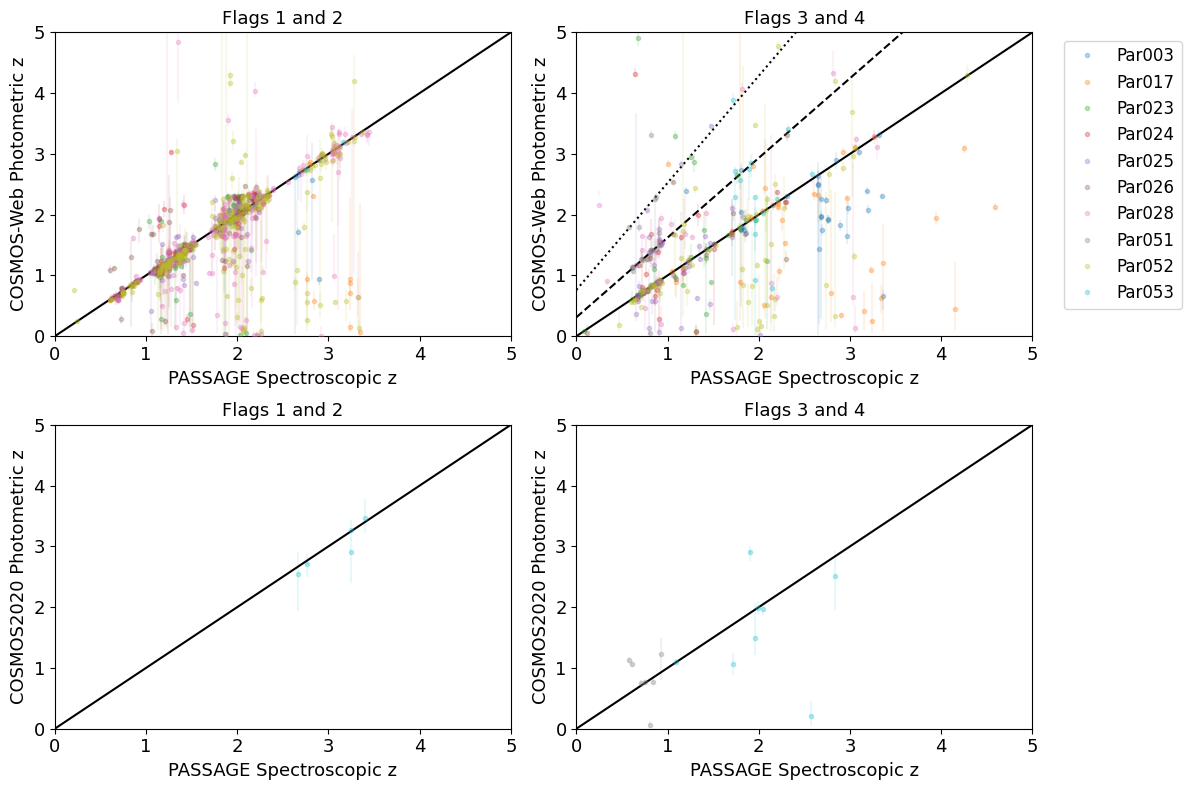

In [147]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))


zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpaserr=np.where(df7['cosmosz']<0,-1,df7['redshift_error'])#df1['redshift']
zcos=np.where(df7['cosmosz']<0,-1,df7['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df7['cosmosz']<0,-1,df7['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df7['cosmosz']<0,-1,df7['cosmoszup'])#df1['cosmosz']
zpas=np.where(df7['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par003',alpha=1, markersize=5,zorder=10,color='tab:blue')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpas=np.where((df7['emline_flag']>2)&(df7['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par003',alpha=1, markersize=5,zorder=10,color='tab:blue')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)


zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpaserr=np.where(df8['cosmosz']<0,-1,df8['redshift_error'])#df1['redshift']
zcos=np.where(df8['cosmosz']<0,-1,df8['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df8['cosmosz']<0,-1,df8['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df8['cosmosz']<0,-1,df8['cosmoszup'])#df1['cosmosz']
zpas=np.where(df8['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par017',alpha=1, markersize=5,zorder=10,color='tab:orange')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpas=np.where((df8['emline_flag']>2)&(df8['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par017',alpha=1, markersize=5,zorder=10,color='tab:orange')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)



zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpaserr=np.where(df4['cosmosz']<0,-1,df4['redshift_error'])#df1['redshift']
zcos=np.where(df4['cosmosz']<0,-1,df4['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df4['cosmosz']<0,-1,df4['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df4['cosmosz']<0,-1,df4['cosmoszup'])#df1['cosmosz']
zpas=np.where(df4['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par023',alpha=1, markersize=5,zorder=10,color='tab:green')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpas=np.where((df4['emline_flag']>2)&(df4['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par023',alpha=1, markersize=5,zorder=10,color='tab:green')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)


zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpaserr=np.where(df1['cosmosz']<0,-1,df1['redshift_error'])#df1['redshift']
zcos=np.where(df1['cosmosz']<0,-1,df1['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df1['cosmosz']<0,-1,df1['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df1['cosmosz']<0,-1,df1['cosmoszup'])#df1['cosmosz']
zpas=np.where(df1['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par024',alpha=1, markersize=5,zorder=10,color='tab:red')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpas=np.where((df1['emline_flag']>2)&(df1['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par024',alpha=1, markersize=5,zorder=10,color='tab:red')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)


zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpaserr=np.where(df3['cosmosz']<0,-1,df3['redshift_error'])#df1['redshift']
zcos=np.where(df3['cosmosz']<0,-1,df3['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df3['cosmosz']<0,-1,df3['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df3['cosmosz']<0,-1,df3['cosmoszup'])#df1['cosmosz']
zpas=np.where(df3['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par025',alpha=1, markersize=5,zorder=10,color='tab:purple')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpas=np.where((df3['emline_flag']>2)&(df3['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par025',alpha=1, markersize=5,zorder=10,color='tab:purple')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)



zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpaserr=np.where(df6['cosmosz']<0,-1,df6['redshift_error'])#df1['redshift']
zcos=np.where(df6['cosmosz']<0,-1,df6['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df6['cosmosz']<0,-1,df6['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df6['cosmosz']<0,-1,df6['cosmoszup'])#df1['cosmosz']
zpas=np.where(df6['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par026',alpha=1, markersize=5,zorder=10,color='tab:brown')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpas=np.where((df6['emline_flag']>2)&(df6['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par026',alpha=1, markersize=5,zorder=10,color='tab:brown')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)

zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpaserr=np.where(df9['cosmosz']<0,-1,df9['redshift_error'])#df1['redshift']
zcos=np.where(df9['cosmosz']<0,-1,df9['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df9['cosmosz']<0,-1,df9['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df9['cosmosz']<0,-1,df9['cosmoszup'])#df1['cosmosz']
zpas=np.where(df9['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par028',alpha=1, markersize=5,zorder=10,color='tab:pink')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpas=np.where((df9['emline_flag']>2)&(df9['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par028',alpha=1, markersize=5,zorder=10,color='tab:pink')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)



zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpaserr=np.where(df2['cosmosz']<0,-1,df2['redshift_error'])#df1['redshift']
zcos=np.where(df2['cosmosz']<0,-1,df2['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df2['cosmosz']<0,-1,df2['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df2['cosmosz']<0,-1,df2['cosmoszup'])#df1['cosmosz']
zpas=np.where(df2['emline_flag']>2,-1,zpas)#df1['redshift']
ax1.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpas=np.where((df2['emline_flag']>2)&(df2['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)

zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpaserr=np.where(df10['cosmosz']<0,-1,df10['redshift_error'])#df1['redshift']
zcos=np.where(df10['cosmosz']<0,-1,df10['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df10['cosmosz']<0,-1,df10['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df10['cosmosz']<0,-1,df10['cosmoszup'])#df1['cosmosz']
zpas=np.where(df10['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par052',alpha=1, markersize=5,zorder=10,color='tab:olive')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpas=np.where((df10['emline_flag']>2)&(df10['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par052',alpha=1, markersize=5,zorder=10,color='tab:olive')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)


zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpaserr=np.where(df5['cosmosz']<0,-1,df5['redshift_error'])#df1['redshift']
zcos=np.where(df5['cosmosz']<0,-1,df5['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df5['cosmosz']<0,-1,df5['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df5['cosmosz']<0,-1,df5['cosmoszup'])#df1['cosmosz']
zpas=np.where(df5['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpas=np.where((df5['emline_flag']>2)&(df5['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)

zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df52['cosmos2020z']<0,-1,df52['redshift_error'])#df1['redshift']
zcos=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df52['emline_flag']>2,-1,zpas)
ax3.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df52['emline_flag']>2)&(df52['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)


zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df22['cosmos2020z']<0,-1,df22['redshift_error'])#df1['redshift']
zcos=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df22['emline_flag']>2,-1,zpas)
ax3.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df22['emline_flag']>2)&(df22['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)




ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")

ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.plot([0,5],[0,5],"k")

ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
ax3.plot([0,5],[0,5],"k")

ax4.set_xlim(0,5)
ax4.set_ylim(0,5)
ax4.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax2.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
ax2.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
#plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
#plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

ax1.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax2.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax1.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax2.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax1.set_title('Flags 1 and 2', fontsize=13)
ax2.set_title('Flags 3 and 4', fontsize=13)


ax3.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax4.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax3.set_ylabel('COSMOS2020 Photometric z', fontsize=13)
ax4.set_ylabel('COSMOS2020 Photometric z', fontsize=13)
ax3.set_title('Flags 1 and 2', fontsize=13)
ax4.set_title('Flags 3 and 4', fontsize=13)

ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
#ax1.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
#ax1.set_yticks(fontsize=14)
ax2.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [236]:
df7

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0      43   2.97819         0.00262  150.410795  2.384626      24.94   
1     146   3.36305         0.00117  150.415518  2.387914      27.52   
2     277   1.80275         0.00026  150.399697  2.390531      22.84   
3     308   2.81944         0.00162  150.404507  2.391197      27.82   
4     541   2.66260         0.00000  150.410698  2.394876      24.29   
5     607   1.80108         0.00150  150.403083  2.395840      24.42   
6     692   2.88926         0.00163  150.407061  2.396807      24.16   
7     696   1.85883         0.00000  150.391651  2.396794      23.59   
8     703   1.81438         0.00080  150.411208  2.396906      24.78   
9     774   2.64611         0.00000  150.410257  2.397407      26.65   
10    780   2.75880         0.00157  150.406168  2.397626      26.13   
11    782   2.90115         0.00055  150.424115  2.397651      26.66   
12    813   2.69319         0.00235  150.405319  2.398059      25.53   
13    819   2.72786         0.00060  150.393480  2.398110      25.60   
14    825   2.66529         0.00127  150.423659  2.398168      26.05   
15    875   2.31316         0.00081  150.397948  2.398818      25.99   
16    914   1.20254         0.00060  150.391969  2.399237      25.75   
17    937   2.67822         0.00141  150.424237  2.399465      26.47   
18    949   2.66017         0.00083  150.391801  2.399625      25.96   
19    995   1.80101         0.00000  150.400118  2.400054      24.89   
20   1043   2.67917         0.00000  150.427210  2.400615      25.44   
21   1046   1.83286         0.00000  150.412961  2.400366      21.99   
22   1066   1.80161         0.00123  150.396117  2.400786      24.20   
23   1113   2.75999         0.00097  150.401749  2.401324      25.44   
24   1122   2.67774         0.00350  150.388465  2.401346      26.88   
25   1131   2.84237         0.00000  150.397266  2.401431      25.61   
26   1142   1.86067         0.00108  150.401481  2.401514      25.05   
27   1248   2.64767         0.00000  150.394516  2.402544      24.95   
28   1271   2.65435         0.00000  150.420584  2.402951      25.34   
29   1276   3.19373         0.00000  150.419380  2.402978      24.82   
30   1281   3.90338         0.00158  150.396957  2.403062      27.05   
31   1354   3.09886         0.00162  150.421488  2.403817      25.54   
32   1358   2.67917         0.00000  150.399126  2.403869      26.63   
33   1439   2.03592         0.00119  150.427845  2.404654      28.96   
34   1858   2.96593         0.00000  150.419943  2.409027      24.08   
35   1970   3.18221         0.00189  150.392092  2.410353      23.29   
36   1982   2.73350         0.00098  150.421684  2.410644      25.83   
37   2049   2.63121         0.00000  150.395608  2.411267      25.88   
38   2119   2.89273         0.00000  150.408549  2.411861      23.98   
39   2245   2.78625         0.00136  150.423608  2.413373      25.91   
40   2277   3.11201         0.00000  150.418069  2.413844      27.16   
41   2386   1.80735         0.00000  150.406861  2.415068      23.34   
42   2563   2.91624         0.00167  150.408520  2.417066      24.72   
43   2739   3.31468         0.00152  150.400377  2.419538      24.98   
44   2987   3.34795         0.00000  150.403306  2.423741      25.74   

    a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_Pb   snr_SIII  \
0         6.593        3.767            5.83 -13.07  ...    -1.0  -1.000000   
1         2.314        2.149            7.96 -17.63  ...    -1.0  -1.000000   
2         6.662        5.986           38.17 -29.87  ...    -1.0  -1.000000   
3         2.211        1.933            5.95 -14.43  ...    -1.0  -1.000000   
4         7.571        5.762            4.13 -33.95  ...    -1.0  -1.000000   
5         7.849        5.924            7.90 -17.08  ...    -1.0  -1.000000   
6         6.518        4.320           12.02 -16.83  ...    -1.0  -1.000000   
7         6.609        4.469           39.10 -24.91  ...   

In [ ]:
for iii in range(len(df)):
        if (np.array(df['snr_Ha'][iii])>2) and (df['snr_OIII'][iii]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_Pb'][i]<=2) and (df['snr_Hb'][i]<=2) and (df['snr_OII'][i]<=2):


            

In [168]:
from itertools import chain

Par003 1 1 68
Par017 2 1 160
Par023 2 3 315
Par024 7 3 439
Par025 14 6 590
Par026 17 7 746
Par028 21 8 1013
Par049 22 8 1130
Par051 36 12 1200
Par052 38 13 1530
Par053 43 14 1610
Par053 44 14 1615
Par051 46 14 1620
Par049 47 14 1642
Par005 54 20 1678
Par006 59 21 1710


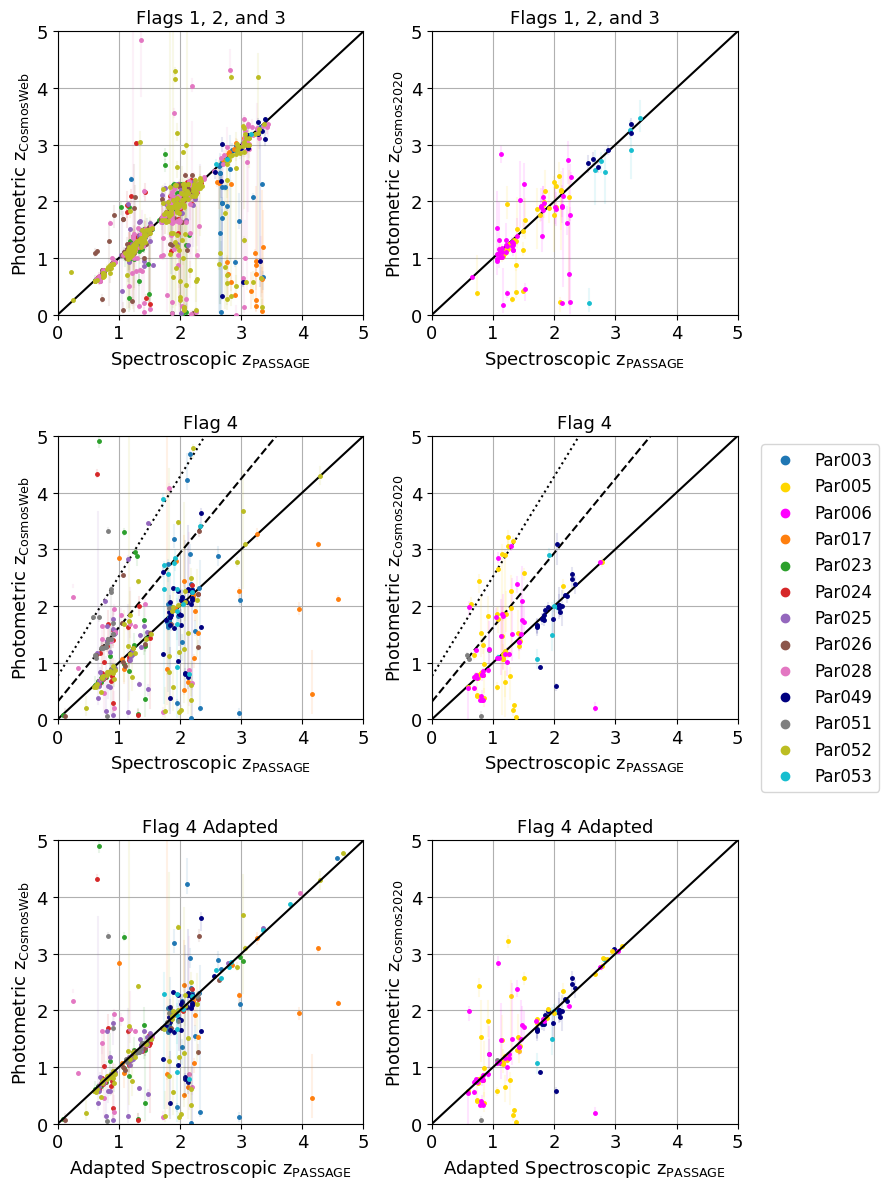

In [323]:
from itertools import chain
fig, ((ax1,ax3), (ax2,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(9,12))

colors2=['tab:blue','gold','magenta','tab:orange','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','navy','tab:gray','tab:olive', 'tab:cyan']
labs=['Par003','Par005','Par006','Par017','Par023','Par024','Par025','Par026','Par028','Par049','Par051','Par052','Par053']
for i in range(len(colors2)):
    ax4.scatter([-1,-1],[-1,-1],color=colors2[i],label=labs[i],marker="o")
ax4.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.05, 1))

dzs=[]
dzs2=[]

dzsog=[]
dzsog2=[]

dzsogf4=[]
dzsogf4c=[]

good=0
bad=0
zx=[]
zy=[]


o2move=0
o3move=0
nomove=0

zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpaserr=np.where(df7['cosmosz']<0,-1,df7['redshift_error'])#df1['redshift']
zcos=np.where(df7['cosmosz']<0,-1,df7['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df7['cosmosz']<0,-1,df7['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df7['cosmosz']<0,-1,df7['cosmoszup'])#df1['cosmosz']
zpas=np.where(df7['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par003',alpha=1, markersize=5,zorder=10,color='tab:blue')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpas=np.where((df7['emline_flag']>3)&(df7['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par003',alpha=1, markersize=5,zorder=10,color='tab:blue')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df7['snr_Ha'][i])>2) and (df7['snr_OIII'][i]<=2) and (df7['snr_SIII'][i]<=2) and (df7['snr_Pb'][i]<=2) and (df7['snr_Hb'][i]<=2) and (df7['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df7['snr_Ha'][i])>2) and (df7['snr_OIII'][i]<=2) and (df7['snr_SIII'][i]<=2) and (df7['snr_Pb'][i]<=2) and (df7['snr_Hb'][i]<=2) and (df7['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
        
        
print('Par003', o3move,o2move,nomove)

zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpaserr=np.where(df8['cosmosz']<0,-1,df8['redshift_error'])#df1['redshift']
zcos=np.where(df8['cosmosz']<0,-1,df8['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df8['cosmosz']<0,-1,df8['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df8['cosmosz']<0,-1,df8['cosmoszup'])#df1['cosmosz']
zpas=np.where(df8['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par017',alpha=1, markersize=5,zorder=10,color='tab:orange')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpas=np.where((df8['emline_flag']>3)&(df8['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par017',alpha=1, markersize=5,zorder=10,color='tab:orange')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df8['snr_Ha'][i])>2) and (df8['snr_OIII'][i]<=2) and (df8['snr_SIII'][i]<=2) and (df8['snr_Pb'][i]<=2) and (df8['snr_Hb'][i]<=2) and (df8['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df8['snr_Ha'][i])>2) and (df8['snr_OIII'][i]<=2) and (df8['snr_SIII'][i]<=2) and (df8['snr_Pb'][i]<=2) and (df8['snr_Hb'][i]<=2) and (df8['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
print('Par017',o3move,o2move,nomove)

zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpaserr=np.where(df4['cosmosz']<0,-1,df4['redshift_error'])#df1['redshift']
zcos=np.where(df4['cosmosz']<0,-1,df4['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df4['cosmosz']<0,-1,df4['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df4['cosmosz']<0,-1,df4['cosmoszup'])#df1['cosmosz']
zpas=np.where(df4['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par023',alpha=1, markersize=5,zorder=10,color='tab:green')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpas=np.where((df4['emline_flag']>3)&(df4['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par023',alpha=1, markersize=5,zorder=10,color='tab:green')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df4['snr_Ha'][i])>2) and (df4['snr_OIII'][i]<=2) and (df4['snr_SIII'][i]<=2) and (df4['snr_Pb'][i]<=2) and (df4['snr_Hb'][i]<=2) and (df4['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:green',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            x5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df4['snr_Ha'][i])>2) and (df4['snr_OIII'][i]<=2) and (df4['snr_SIII'][i]<=2) and (df4['snr_Pb'][i]<=2) and (df4['snr_Hb'][i]<=2) and (df4['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:green',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            x5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
print('Par023',o3move,o2move,nomove)

zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpaserr=np.where(df1['cosmosz']<0,-1,df1['redshift_error'])#df1['redshift']
zcos=np.where(df1['cosmosz']<0,-1,df1['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df1['cosmosz']<0,-1,df1['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df1['cosmosz']<0,-1,df1['cosmoszup'])#df1['cosmosz']
zpas=np.where(df1['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par024',alpha=1, markersize=5,zorder=10,color='tab:red')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpas=np.where((df1['emline_flag']>3)&(df1['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par024',alpha=1, markersize=5,zorder=10,color='tab:red')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpascorrected24=[]
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df1['snr_Ha'][i])>2) and (df1['snr_OIII'][i]<=2) and (df1['snr_SIII'][i]<=2) and (df1['snr_Pb'][i]<=2) and (df1['snr_Hb'][i]<=2) and (df1['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:red',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
            zpascorrected24.append(y5007)
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df1['snr_Ha'][i])>2) and (df1['snr_OIII'][i]<=2) and (df1['snr_SIII'][i]<=2) and (df1['snr_Pb'][i]<=2) and (df1['snr_Hb'][i]<=2) and (df1['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:red',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
            zpascorrected24.append(y3727)
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
            zpascorrected24.append(np.nan)
    else:
            zpascorrected24.append(np.nan)
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
        
print('Par024',o3move,o2move,nomove)

zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpaserr=np.where(df3['cosmosz']<0,-1,df3['redshift_error'])#df1['redshift']
zcos=np.where(df3['cosmosz']<0,-1,df3['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df3['cosmosz']<0,-1,df3['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df3['cosmosz']<0,-1,df3['cosmoszup'])#df1['cosmosz']
zpas=np.where(df3['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par025',alpha=1, markersize=5,zorder=10,color='tab:purple')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpas=np.where((df3['emline_flag']>3)&(df3['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par025',alpha=1, markersize=5,zorder=10,color='tab:purple')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df3['snr_Ha'][i])>2) and (df3['snr_OIII'][i]<=2) and (df3['snr_SIII'][i]<=2) and (df3['snr_Pb'][i]<=2) and (df3['snr_Hb'][i]<=2) and (df3['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df3['snr_Ha'][i])>2) and (df3['snr_OIII'][i]<=2) and (df3['snr_SIII'][i]<=2) and (df3['snr_Pb'][i]<=2) and (df3['snr_Hb'][i]<=2) and (df3['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par025',o3move,o2move,nomove)

zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpaserr=np.where(df6['cosmosz']<0,-1,df6['redshift_error'])#df1['redshift']
zcos=np.where(df6['cosmosz']<0,-1,df6['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df6['cosmosz']<0,-1,df6['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df6['cosmosz']<0,-1,df6['cosmoszup'])#df1['cosmosz']
zpas=np.where(df6['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par026',alpha=1, markersize=5,zorder=10,color='tab:brown')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpas=np.where((df6['emline_flag']>3)&(df6['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par026',alpha=1, markersize=5,zorder=10,color='tab:brown')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df6['snr_Ha'][i])>2) and (df6['snr_OIII'][i]<=2) and (df6['snr_SIII'][i]<=2) and (df6['snr_Pb'][i]<=2) and (df6['snr_Hb'][i]<=2) and (df6['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df6['snr_Ha'][i])>2) and (df6['snr_OIII'][i]<=2) and (df6['snr_SIII'][i]<=2) and (df6['snr_Pb'][i]<=2) and (df6['snr_Hb'][i]<=2) and (df6['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par026',o3move,o2move,nomove)

zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpaserr=np.where(df9['cosmosz']<0,-1,df9['redshift_error'])#df1['redshift']
zcos=np.where(df9['cosmosz']<0,-1,df9['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df9['cosmosz']<0,-1,df9['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df9['cosmosz']<0,-1,df9['cosmoszup'])#df1['cosmosz']
zpas=np.where(df9['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par028',alpha=1, markersize=5,zorder=10,color='tab:pink')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpas=np.where((df9['emline_flag']>3)&(df9['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par028',alpha=1, markersize=5,zorder=10,color='tab:pink')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df9['snr_Ha'][i])>2) and (df9['snr_OIII'][i]<=2) and (df9['snr_SIII'][i]<=2) and (df9['snr_Pb'][i]<=2) and (df9['snr_Hb'][i]<=2) and (df9['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df9['snr_Ha'][i])>2) and (df9['snr_OIII'][i]<=2) and (df9['snr_SIII'][i]<=2) and (df9['snr_Pb'][i]<=2) and (df9['snr_Hb'][i]<=2) and (df9['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:     
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par028',o3move,o2move,nomove)

zpas=np.where(df15['cosmosz']<0,-1,df15['redshift'])#df1['redshift']
zpaserr=np.where(df15['cosmosz']<0,-1,df15['redshift_error'])#df1['redshift']
zcos=np.where(df15['cosmosz']<0,-1,df15['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df15['cosmosz']<0,-1,df15['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df15['cosmosz']<0,-1,df15['cosmoszup'])#df1['cosmosz']
zpas=np.where(df15['emline_flag']>3,-1,zpas)#df1['redshift']
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
zpas=np.where(df15['cosmosz']<0,-1,df15['redshift'])#df1['redshift']
zpas=np.where((df15['emline_flag']>3)&(df15['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df15['snr_Ha'][i])>2) and (df15['snr_OIII'][i]<=2) and (df15['snr_SIII'][i]<=2) and (df15['snr_Pb'][i]<=2) and (df15['snr_Hb'][i]<=2) and (df15['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='navy',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df15['snr_Ha'][i])>2) and (df15['snr_OIII'][i]<=2) and (df15['snr_SIII'][i]<=2) and (df15['snr_Pb'][i]<=2) and (df15['snr_Hb'][i]<=2) and (df15['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='navy',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par049',o3move,o2move,nomove)

zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpaserr=np.where(df2['cosmosz']<0,-1,df2['redshift_error'])#df1['redshift']
zcos=np.where(df2['cosmosz']<0,-1,df2['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df2['cosmosz']<0,-1,df2['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df2['cosmosz']<0,-1,df2['cosmoszup'])#df1['cosmosz']
zpas=np.where(df2['emline_flag']>3,-1,zpas)#df1['redshift']
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpas=np.where((df2['emline_flag']>3)&(df2['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df2['snr_Ha'][i])>2) and (df2['snr_OIII'][i]<=2) and (df2['snr_SIII'][i]<=2) and (df2['snr_Pb'][i]<=2) and (df2['snr_Hb'][i]<=2) and (df2['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df2['snr_Ha'][i])>2) and (df2['snr_OIII'][i]<=2) and (df2['snr_SIII'][i]<=2) and (df2['snr_Pb'][i]<=2) and (df2['snr_Hb'][i]<=2) and (df2['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par051',o3move,o2move,nomove)

zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpaserr=np.where(df10['cosmosz']<0,-1,df10['redshift_error'])#df1['redshift']
zcos=np.where(df10['cosmosz']<0,-1,df10['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df10['cosmosz']<0,-1,df10['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df10['cosmosz']<0,-1,df10['cosmoszup'])#df1['cosmosz']
zpas=np.where(df10['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par052',alpha=1, markersize=5,zorder=10,color='tab:olive')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpas=np.where((df10['emline_flag']>3)&(df10['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par052',alpha=1, markersize=5,zorder=10,color='tab:olive')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df10['snr_Ha'][i])>2) and (df10['snr_OIII'][i]<=2) and (df10['snr_SIII'][i]<=2) and (df10['snr_Pb'][i]<=2) and (df10['snr_Hb'][i]<=2) and (df10['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df10['snr_Ha'][i])>2) and (df10['snr_OIII'][i]<=2) and (df10['snr_SIII'][i]<=2) and (df10['snr_Pb'][i]<=2) and (df10['snr_Hb'][i]<=2) and (df10['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par052',o3move,o2move,nomove)

zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpaserr=np.where(df5['cosmosz']<0,-1,df5['redshift_error'])#df1['redshift']
zcos=np.where(df5['cosmosz']<0,-1,df5['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df5['cosmosz']<0,-1,df5['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df5['cosmosz']<0,-1,df5['cosmoszup'])#df1['cosmosz']
zpas=np.where(df5['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpas=np.where((df5['emline_flag']>3)&(df5['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df5['snr_Ha'][i])>2) and (df5['snr_OIII'][i]<=2) and (df5['snr_SIII'][i]<=2) and (df5['snr_Pb'][i]<=2) and (df5['snr_Hb'][i]<=2) and (df5['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df5['snr_Ha'][i])>2) and (df5['snr_OIII'][i]<=2) and (df5['snr_SIII'][i]<=2) and (df5['snr_Pb'][i]<=2) and (df5['snr_Hb'][i]<=2) and (df5['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            #print(zpas[i]-zcos[i])
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            #print(zpas[i]-zcos[i])
            bad+=1

print('Par053',o3move,o2move,nomove)
    
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df52['cosmos2020z']<0,-1,df52['redshift_error'])#df1['redshift']
zcos=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df52['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df52['emline_flag']>3)&(df52['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df52['snr_Ha'][i])>2) and (df52['snr_OIII'][i]<=2) and (df52['snr_SIII'][i]<=2) and (df52['snr_Pb'][i]<=2) and (df52['snr_Hb'][i]<=2) and (df52['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df52['snr_Ha'][i])>2) and (df52['snr_OIII'][i]<=2) and (df52['snr_SIII'][i]<=2) and (df52['snr_Pb'][i]<=2) and (df52['snr_Hb'][i]<=2) and (df52['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par053',o3move,o2move,nomove)

zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df22['cosmos2020z']<0,-1,df22['redshift_error'])#df1['redshift']
zcos=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df22['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df22['emline_flag']>3)&(df22['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
#df22 = df22.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df22['snr_Ha'][i])>2) and (df22['snr_OIII'][i]<=2) and (df22['snr_SIII'][i]<=2) and (df22['snr_Pb'][i]<=2) and (df22['snr_Hb'][i]<=2) and (df22['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df22['snr_Ha'][i])>2) and (df22['snr_OIII'][i]<=2) and (df22['snr_SIII'][i]<=2) and (df22['snr_Pb'][i]<=2) and (df22['snr_Hb'][i]<=2) and (df22['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    elif y5007!=-1:     
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
    

print('Par051',o3move,o2move,nomove)

zpas=np.where(df152['cosmos2020z']<0,-1,df152['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df152['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df152['cosmos2020z']<0,-1,df152['redshift_error'])#df1['redshift']
zcos=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df152['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
zpas=np.where(df152['cosmos2020z']<0,-1,df152['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df152['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df152['emline_flag']>3)&(df152['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
#df152 = df152.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df152['snr_Ha'][i])>2) and (df152['snr_OIII'][i]<=2) and (df152['snr_SIII'][i]<=2) and (df152['snr_Pb'][i]<=2) and (df152['snr_Hb'][i]<=2) and (df152['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='navy',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df152['snr_Ha'][i])>2) and (df152['snr_OIII'][i]<=2) and (df152['snr_SIII'][i]<=2) and (df152['snr_Pb'][i]<=2) and (df152['snr_Hb'][i]<=2) and (df152['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='navy',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par049',o3move,o2move,nomove)


zpas=np.where(df11['cosmos2020z']<0,-1,df11['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df11['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df11['cosmos2020z']<0,-1,df11['redshift_error'])#df1['redshift']
zcos=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df11['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par005',alpha=1, markersize=5,zorder=10,color='gold')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='gold',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='gold',alpha=0.1)
zpas=np.where(df11['cosmos2020z']<0,-1,df11['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df11['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df11['emline_flag']>3)&(df11['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par005',alpha=1, markersize=5,zorder=10,color='gold')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='gold',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='gold',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df11['snr_Ha'][i])>2) and (df11['snr_OIII'][i]<=2) and (df11['snr_SIII'][i]<=2) and (df11['snr_Pb'][i]<=2) and (df11['snr_Hb'][i]<=2) and (df11['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='gold',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df11['snr_Ha'][i])>2) and (df11['snr_OIII'][i]<=2) and (df11['snr_SIII'][i]<=2) and (df11['snr_Pb'][i]<=2) and (df11['snr_Hb'][i]<=2) and (df11['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='gold',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par005',o3move,o2move,nomove)

zpas=np.where(df12['cosmos2020z']<0,-1,df12['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df12['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df12['cosmos2020z']<0,-1,df12['redshift_error'])#df1['redshift']
zcos=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df12['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par006',alpha=1, markersize=5,zorder=10,color='magenta')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='magenta',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='magenta',alpha=0.1)
zpas=np.where(df12['cosmos2020z']<0,-1,df12['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df12['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df12['emline_flag']>3)&(df12['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par006',alpha=1, markersize=5,zorder=10,color='magenta')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='magenta',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='magenta',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='magenta',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='magenta',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par006',o3move,o2move,nomove)

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")

ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.plot([0,5],[0,5],"k")

ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
ax3.plot([0,5],[0,5],"k")

ax4.set_xlim(0,5)
ax4.set_ylim(0,5)
ax4.plot([0,5],[0,5],"k")

ax5.set_xlim(0,5)
ax5.set_ylim(0,5)
ax5.plot([0,5],[0,5],"k")

ax6.set_xlim(0,5)
ax6.set_ylim(0,5)
ax6.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax2.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
ax4.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
ax2.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
ax4.plot(x,y,"k:")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
#plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
#plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

ax1.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax2.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax1.set_ylabel(r'$\rm Photometric\ z_{CosmosWeb}$', fontsize=13)
ax2.set_ylabel(r'$\rm Photometric\ z_{CosmosWeb}$', fontsize=13)
ax1.set_title('Flags 1, 2, and 3', fontsize=13)
ax2.set_title('Flag 4', fontsize=13)


ax3.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax4.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax3.set_ylabel(r'$\rm Photometric\ z_{Cosmos2020}$', fontsize=13)
ax4.set_ylabel(r'$\rm Photometric\ z_{Cosmos2020}$', fontsize=13)
ax3.set_title('Flags 1, 2, and 3', fontsize=13)
ax4.set_title('Flag 4', fontsize=13)

ax5.set_title('Flag 4 Adapted', fontsize=13)
ax6.set_title('Flag 4 Adapted', fontsize=13)
ax5.set_xlabel(r'$\rm Adapted\ Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax6.set_xlabel(r'$\rm Adapted\ Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax5.set_ylabel(r'$\rm Photometric\ z_{CosmosWeb}$', fontsize=13)
ax6.set_ylabel(r'$\rm Photometric\ z_{Cosmos2020}$', fontsize=13)


ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
ax5.tick_params(axis='both', labelsize=13)
ax6.tick_params(axis='both', labelsize=13)
#ax1.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
#ax1.set_yticks(fontsize=14)

plt.tight_layout()

dzs=list(chain.from_iterable(dzs))
dzs2=list(chain.from_iterable(dzs2))
#dzsog=list(chain.from_iterable(dzsog))
dzsog2=list(chain.from_iterable(dzsog2))
#zx=list(chain.from_iterable(zx))
#zy=list(chain.from_iterable(zy))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

#print(dzs)

In [241]:
df52

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0      42   1.72120         0.00050  150.107298  1.771812      26.41   
1      76   2.11829         0.00164  150.104486  1.773287      26.21   
2      85   2.08843         0.00176  150.100978  1.773589      26.43   
3     143   2.11868         0.00063  150.103809  1.775298      25.01   
4     174   3.06035         0.00113  150.108098  1.775918      25.28   
..    ...       ...             ...         ...       ...        ...   
78   1385   1.98953         0.00173  150.083750  1.791630      23.84   
79   1726   1.73094         0.00324  150.086634  1.792008      23.66   
80   1760   1.90693         0.00253  150.106729  1.795688      25.15   
81   2204   2.85552         0.00140  150.099152  1.800593      28.13   
82   2379   3.24423         0.00000  150.096601  1.802628      25.35   

    a_image_obj  b_image_obj  snr_tot_others  chisq  ...  cosmosz  cosmoszmed  \
0         4.755        3.218           24.83  30.78  ...     -1.0        -1.0   
1         4.755        2.636            5.67  -8.83  ...     -1.0        -1.0   
2         5.700        2.528            4.93  -8.32  ...     -1.0        -1.0   
3         6.669        3.981           14.32 -17.51  ...     -1.0        -1.0   
4         4.249        3.390           13.71  -7.61  ...     -1.0        -1.0   
..          ...          ...             ...    ...  ...      ...         ...   
78        6.453        4.628            5.09 -31.16  ...     -1.0        -1.0   
79       15.004       12.424           10.30  21.45  ...     -1.0        -1.0   
80        8.688        3.780            5.09 -10.86  ...     -1.0        -1.0   
81        2.227        1.929            7.50 -11.45  ...     -1.0        -1.0   
82        4.815        3.146           10.39  -9.29  ...     -1.0        -1.0   

    cosmoszlow  cosmoszup  cosmos2020ra  cosmos2020dec  cosmos2020id  \
0         -1.0       -1.0    150.107276       1.771798      366641.0   
1         -1.0       -1.0     -1.000000      -1.000000          -1.0   
2         -1.0       -1.0    150.100994       1.773567      368695.0   
3         -1.0       -1.0     -1.000000      -1.000000          -1.0   
4         -1.0       -1.0     -1.000000      -1.000000          -1.0   
..         ...        ...           ...            ...           ...   
78        -1.0       -1.0    150.083743       1.791626      388114.0   
79        -1.0       -1.0     -1.000000      -1.000000          -1.0   
80        -1.0       -1.0    150.106742       1.795670      391486.0   
81        -1.0       -1.0     -1.000000      -1.000000          -1.0   
82        -1.0       -1.0    150.096611       1.802626      398706.0   

    cosmos2020z  cosmos2020zlow  cosmos2020zup  
0        1.0659          0.8963         1.2268  
1       -1.0000         -1.0000        -1.0000  
2           NaN          0.0726         0.4175  
3       -1.0000         -1.0000        -1.0000  
4       -1.0000         -1.0000        -1.0000  
..          ...             ...            ...  
78          NaN          1.0567         1.1628  
79      -1.0000         -1.0000        -1.0000  
80       2.9012          2.7692         2.9978  
81      -1.0000         -1.0000        -1.0000  
82       3.2625          3.1249         3.4148  

[69 rows x 306 columns]

Par003 1 1 68
Par017 2 1 160
Par023 2 3 315
Par024 7 3 439
Par025 14 6 590
Par026 17 7 746
Par028 21 8 1013
Par049 22 8 1130
Par051 36 12 1200
Par052 38 13 1530
Par053 43 14 1610
Par053 44 14 1615
Par051 46 14 1620
Par049 47 14 1642
Par005 54 20 1678
Par006 59 21 1710


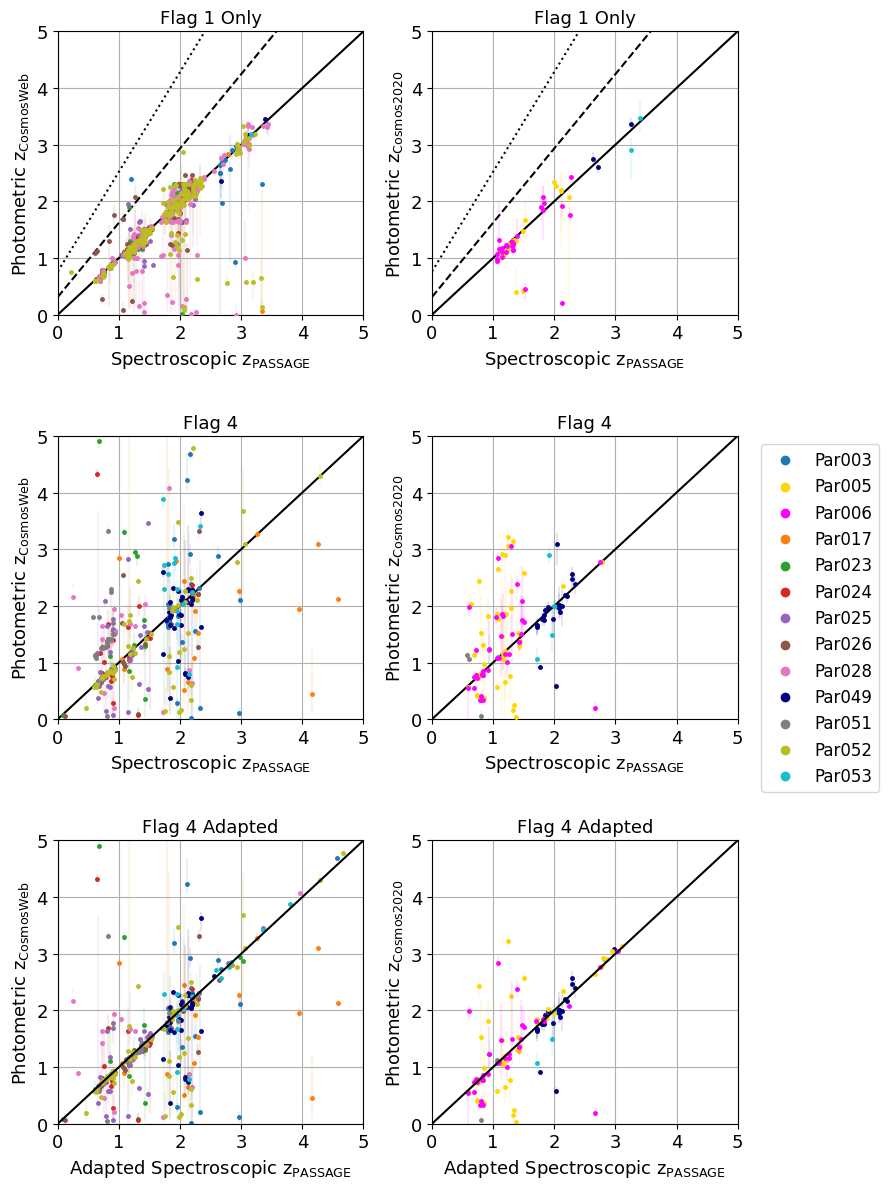

In [326]:
from itertools import chain
fig, ((ax1,ax3), (ax2,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(9,12))

colors2=['tab:blue','gold','magenta','tab:orange','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','navy','tab:gray','tab:olive', 'tab:cyan']
labs=['Par003','Par005','Par006','Par017','Par023','Par024','Par025','Par026','Par028','Par049','Par051','Par052','Par053']
for i in range(len(colors2)):
    ax4.scatter([-1,-1],[-1,-1],color=colors2[i],label=labs[i],marker="o")
ax4.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.05, 1))

dzs=[]
dzs2=[]

dzsog=[]
dzsog2=[]

dzsogf4=[]
dzsogf4c=[]

good=0
bad=0
zx=[]
zy=[]


o2move=0
o3move=0
nomove=0

zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpaserr=np.where(df7['cosmosz']<0,-1,df7['redshift_error'])#df1['redshift']
zcos=np.where(df7['cosmosz']<0,-1,df7['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df7['cosmosz']<0,-1,df7['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df7['cosmosz']<0,-1,df7['cosmoszup'])#df1['cosmosz']
zpas=np.where(df7['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par003',alpha=1, markersize=5,zorder=10,color='tab:blue')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpas=np.where((df7['emline_flag']>3)&(df7['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par003',alpha=1, markersize=5,zorder=10,color='tab:blue')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df7['snr_Ha'][i])>2) and (df7['snr_OIII'][i]<=2) and (df7['snr_SIII'][i]<=2) and (df7['snr_Pb'][i]<=2) and (df7['snr_Hb'][i]<=2) and (df7['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df7['snr_Ha'][i])>2) and (df7['snr_OIII'][i]<=2) and (df7['snr_SIII'][i]<=2) and (df7['snr_Pb'][i]<=2) and (df7['snr_Hb'][i]<=2) and (df7['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
        
        
print('Par003', o3move,o2move,nomove)

zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpaserr=np.where(df8['cosmosz']<0,-1,df8['redshift_error'])#df1['redshift']
zcos=np.where(df8['cosmosz']<0,-1,df8['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df8['cosmosz']<0,-1,df8['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df8['cosmosz']<0,-1,df8['cosmoszup'])#df1['cosmosz']
zpas=np.where(df8['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par017',alpha=1, markersize=5,zorder=10,color='tab:orange')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpas=np.where((df8['emline_flag']>3)&(df8['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par017',alpha=1, markersize=5,zorder=10,color='tab:orange')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df8['snr_Ha'][i])>2) and (df8['snr_OIII'][i]<=2) and (df8['snr_SIII'][i]<=2) and (df8['snr_Pb'][i]<=2) and (df8['snr_Hb'][i]<=2) and (df8['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df8['snr_Ha'][i])>2) and (df8['snr_OIII'][i]<=2) and (df8['snr_SIII'][i]<=2) and (df8['snr_Pb'][i]<=2) and (df8['snr_Hb'][i]<=2) and (df8['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
print('Par017',o3move,o2move,nomove)

zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpaserr=np.where(df4['cosmosz']<0,-1,df4['redshift_error'])#df1['redshift']
zcos=np.where(df4['cosmosz']<0,-1,df4['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df4['cosmosz']<0,-1,df4['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df4['cosmosz']<0,-1,df4['cosmoszup'])#df1['cosmosz']
zpas=np.where(df4['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par023',alpha=1, markersize=5,zorder=10,color='tab:green')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpas=np.where((df4['emline_flag']>3)&(df4['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par023',alpha=1, markersize=5,zorder=10,color='tab:green')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df4['snr_Ha'][i])>2) and (df4['snr_OIII'][i]<=2) and (df4['snr_SIII'][i]<=2) and (df4['snr_Pb'][i]<=2) and (df4['snr_Hb'][i]<=2) and (df4['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:green',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            x5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df4['snr_Ha'][i])>2) and (df4['snr_OIII'][i]<=2) and (df4['snr_SIII'][i]<=2) and (df4['snr_Pb'][i]<=2) and (df4['snr_Hb'][i]<=2) and (df4['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:green',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            x5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
print('Par023',o3move,o2move,nomove)

zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpaserr=np.where(df1['cosmosz']<0,-1,df1['redshift_error'])#df1['redshift']
zcos=np.where(df1['cosmosz']<0,-1,df1['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df1['cosmosz']<0,-1,df1['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df1['cosmosz']<0,-1,df1['cosmoszup'])#df1['cosmosz']
zpas=np.where(df1['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par024',alpha=1, markersize=5,zorder=10,color='tab:red')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpas=np.where((df1['emline_flag']>3)&(df1['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par024',alpha=1, markersize=5,zorder=10,color='tab:red')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpascorrected24=[]
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df1['snr_Ha'][i])>2) and (df1['snr_OIII'][i]<=2) and (df1['snr_SIII'][i]<=2) and (df1['snr_Pb'][i]<=2) and (df1['snr_Hb'][i]<=2) and (df1['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:red',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
            zpascorrected24.append(y5007)
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df1['snr_Ha'][i])>2) and (df1['snr_OIII'][i]<=2) and (df1['snr_SIII'][i]<=2) and (df1['snr_Pb'][i]<=2) and (df1['snr_Hb'][i]<=2) and (df1['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:red',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
            zpascorrected24.append(y3727)
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
            zpascorrected24.append(np.nan)
    else:
            zpascorrected24.append(np.nan)
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
        
print('Par024',o3move,o2move,nomove)

zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpaserr=np.where(df3['cosmosz']<0,-1,df3['redshift_error'])#df1['redshift']
zcos=np.where(df3['cosmosz']<0,-1,df3['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df3['cosmosz']<0,-1,df3['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df3['cosmosz']<0,-1,df3['cosmoszup'])#df1['cosmosz']
zpas=np.where(df3['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par025',alpha=1, markersize=5,zorder=10,color='tab:purple')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpas=np.where((df3['emline_flag']>3)&(df3['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par025',alpha=1, markersize=5,zorder=10,color='tab:purple')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df3['snr_Ha'][i])>2) and (df3['snr_OIII'][i]<=2) and (df3['snr_SIII'][i]<=2) and (df3['snr_Pb'][i]<=2) and (df3['snr_Hb'][i]<=2) and (df3['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df3['snr_Ha'][i])>2) and (df3['snr_OIII'][i]<=2) and (df3['snr_SIII'][i]<=2) and (df3['snr_Pb'][i]<=2) and (df3['snr_Hb'][i]<=2) and (df3['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par025',o3move,o2move,nomove)

zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpaserr=np.where(df6['cosmosz']<0,-1,df6['redshift_error'])#df1['redshift']
zcos=np.where(df6['cosmosz']<0,-1,df6['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df6['cosmosz']<0,-1,df6['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df6['cosmosz']<0,-1,df6['cosmoszup'])#df1['cosmosz']
zpas=np.where(df6['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par026',alpha=1, markersize=5,zorder=10,color='tab:brown')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpas=np.where((df6['emline_flag']>3)&(df6['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par026',alpha=1, markersize=5,zorder=10,color='tab:brown')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df6['snr_Ha'][i])>2) and (df6['snr_OIII'][i]<=2) and (df6['snr_SIII'][i]<=2) and (df6['snr_Pb'][i]<=2) and (df6['snr_Hb'][i]<=2) and (df6['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df6['snr_Ha'][i])>2) and (df6['snr_OIII'][i]<=2) and (df6['snr_SIII'][i]<=2) and (df6['snr_Pb'][i]<=2) and (df6['snr_Hb'][i]<=2) and (df6['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par026',o3move,o2move,nomove)

zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpaserr=np.where(df9['cosmosz']<0,-1,df9['redshift_error'])#df1['redshift']
zcos=np.where(df9['cosmosz']<0,-1,df9['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df9['cosmosz']<0,-1,df9['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df9['cosmosz']<0,-1,df9['cosmoszup'])#df1['cosmosz']
zpas=np.where(df9['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par028',alpha=1, markersize=5,zorder=10,color='tab:pink')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpas=np.where((df9['emline_flag']>3)&(df9['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par028',alpha=1, markersize=5,zorder=10,color='tab:pink')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df9['snr_Ha'][i])>2) and (df9['snr_OIII'][i]<=2) and (df9['snr_SIII'][i]<=2) and (df9['snr_Pb'][i]<=2) and (df9['snr_Hb'][i]<=2) and (df9['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df9['snr_Ha'][i])>2) and (df9['snr_OIII'][i]<=2) and (df9['snr_SIII'][i]<=2) and (df9['snr_Pb'][i]<=2) and (df9['snr_Hb'][i]<=2) and (df9['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:     
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par028',o3move,o2move,nomove)

zpas=np.where(df15['cosmosz']<0,-1,df15['redshift'])#df1['redshift']
zpaserr=np.where(df15['cosmosz']<0,-1,df15['redshift_error'])#df1['redshift']
zcos=np.where(df15['cosmosz']<0,-1,df15['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df15['cosmosz']<0,-1,df15['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df15['cosmosz']<0,-1,df15['cosmoszup'])#df1['cosmosz']
zpas=np.where(df15['emline_flag']>1,-1,zpas)#df1['redshift']
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
zpas=np.where(df15['cosmosz']<0,-1,df15['redshift'])#df1['redshift']
zpas=np.where((df15['emline_flag']>3)&(df15['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df15['snr_Ha'][i])>2) and (df15['snr_OIII'][i]<=2) and (df15['snr_SIII'][i]<=2) and (df15['snr_Pb'][i]<=2) and (df15['snr_Hb'][i]<=2) and (df15['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='navy',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df15['snr_Ha'][i])>2) and (df15['snr_OIII'][i]<=2) and (df15['snr_SIII'][i]<=2) and (df15['snr_Pb'][i]<=2) and (df15['snr_Hb'][i]<=2) and (df15['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='navy',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par049',o3move,o2move,nomove)

zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpaserr=np.where(df2['cosmosz']<0,-1,df2['redshift_error'])#df1['redshift']
zcos=np.where(df2['cosmosz']<0,-1,df2['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df2['cosmosz']<0,-1,df2['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df2['cosmosz']<0,-1,df2['cosmoszup'])#df1['cosmosz']
zpas=np.where(df2['emline_flag']>1,-1,zpas)#df1['redshift']
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpas=np.where((df2['emline_flag']>3)&(df2['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df2['snr_Ha'][i])>2) and (df2['snr_OIII'][i]<=2) and (df2['snr_SIII'][i]<=2) and (df2['snr_Pb'][i]<=2) and (df2['snr_Hb'][i]<=2) and (df2['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df2['snr_Ha'][i])>2) and (df2['snr_OIII'][i]<=2) and (df2['snr_SIII'][i]<=2) and (df2['snr_Pb'][i]<=2) and (df2['snr_Hb'][i]<=2) and (df2['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par051',o3move,o2move,nomove)

zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpaserr=np.where(df10['cosmosz']<0,-1,df10['redshift_error'])#df1['redshift']
zcos=np.where(df10['cosmosz']<0,-1,df10['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df10['cosmosz']<0,-1,df10['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df10['cosmosz']<0,-1,df10['cosmoszup'])#df1['cosmosz']
zpas=np.where(df10['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par052',alpha=1, markersize=5,zorder=10,color='tab:olive')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpas=np.where((df10['emline_flag']>3)&(df10['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par052',alpha=1, markersize=5,zorder=10,color='tab:olive')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df10['snr_Ha'][i])>2) and (df10['snr_OIII'][i]<=2) and (df10['snr_SIII'][i]<=2) and (df10['snr_Pb'][i]<=2) and (df10['snr_Hb'][i]<=2) and (df10['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df10['snr_Ha'][i])>2) and (df10['snr_OIII'][i]<=2) and (df10['snr_SIII'][i]<=2) and (df10['snr_Pb'][i]<=2) and (df10['snr_Hb'][i]<=2) and (df10['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par052',o3move,o2move,nomove)

zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpaserr=np.where(df5['cosmosz']<0,-1,df5['redshift_error'])#df1['redshift']
zcos=np.where(df5['cosmosz']<0,-1,df5['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df5['cosmosz']<0,-1,df5['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df5['cosmosz']<0,-1,df5['cosmoszup'])#df1['cosmosz']
zpas=np.where(df5['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpas=np.where((df5['emline_flag']>3)&(df5['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df5['snr_Ha'][i])>2) and (df5['snr_OIII'][i]<=2) and (df5['snr_SIII'][i]<=2) and (df5['snr_Pb'][i]<=2) and (df5['snr_Hb'][i]<=2) and (df5['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df5['snr_Ha'][i])>2) and (df5['snr_OIII'][i]<=2) and (df5['snr_SIII'][i]<=2) and (df5['snr_Pb'][i]<=2) and (df5['snr_Hb'][i]<=2) and (df5['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            #print(zpas[i]-zcos[i])
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            #print(zpas[i]-zcos[i])
            bad+=1

print('Par053',o3move,o2move,nomove)
    
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df52['cosmos2020z']<0,-1,df52['redshift_error'])#df1['redshift']
zcos=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df52['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df52['emline_flag']>3)&(df52['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=1, markersize=5,zorder=10,color='tab:cyan')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df52['snr_Ha'][i])>2) and (df52['snr_OIII'][i]<=2) and (df52['snr_SIII'][i]<=2) and (df52['snr_Pb'][i]<=2) and (df52['snr_Hb'][i]<=2) and (df52['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df52['snr_Ha'][i])>2) and (df52['snr_OIII'][i]<=2) and (df52['snr_SIII'][i]<=2) and (df52['snr_Pb'][i]<=2) and (df52['snr_Hb'][i]<=2) and (df52['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par053',o3move,o2move,nomove)

zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df22['cosmos2020z']<0,-1,df22['redshift_error'])#df1['redshift']
zcos=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df22['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df22['emline_flag']>3)&(df22['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par051',alpha=1, markersize=5,zorder=10,color='tab:gray')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
#df22 = df22.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df22['snr_Ha'][i])>2) and (df22['snr_OIII'][i]<=2) and (df22['snr_SIII'][i]<=2) and (df22['snr_Pb'][i]<=2) and (df22['snr_Hb'][i]<=2) and (df22['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df22['snr_Ha'][i])>2) and (df22['snr_OIII'][i]<=2) and (df22['snr_SIII'][i]<=2) and (df22['snr_Pb'][i]<=2) and (df22['snr_Hb'][i]<=2) and (df22['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    elif y5007!=-1:     
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
    

print('Par051',o3move,o2move,nomove)

zpas=np.where(df152['cosmos2020z']<0,-1,df152['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df152['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df152['cosmos2020z']<0,-1,df152['redshift_error'])#df1['redshift']
zcos=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df152['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
zpas=np.where(df152['cosmos2020z']<0,-1,df152['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df152['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df152['emline_flag']>3)&(df152['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par049',alpha=1, markersize=5,zorder=10,color='navy')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
#df152 = df152.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df152['snr_Ha'][i])>2) and (df152['snr_OIII'][i]<=2) and (df152['snr_SIII'][i]<=2) and (df152['snr_Pb'][i]<=2) and (df152['snr_Hb'][i]<=2) and (df152['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='navy',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df152['snr_Ha'][i])>2) and (df152['snr_OIII'][i]<=2) and (df152['snr_SIII'][i]<=2) and (df152['snr_Pb'][i]<=2) and (df152['snr_Hb'][i]<=2) and (df152['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='navy',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par049',o3move,o2move,nomove)


zpas=np.where(df11['cosmos2020z']<0,-1,df11['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df11['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df11['cosmos2020z']<0,-1,df11['redshift_error'])#df1['redshift']
zcos=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df11['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par005',alpha=1, markersize=5,zorder=10,color='gold')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='gold',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='gold',alpha=0.1)
zpas=np.where(df11['cosmos2020z']<0,-1,df11['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df11['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df11['emline_flag']>3)&(df11['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par005',alpha=1, markersize=5,zorder=10,color='gold')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='gold',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='gold',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df11['snr_Ha'][i])>2) and (df11['snr_OIII'][i]<=2) and (df11['snr_SIII'][i]<=2) and (df11['snr_Pb'][i]<=2) and (df11['snr_Hb'][i]<=2) and (df11['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='gold',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df11['snr_Ha'][i])>2) and (df11['snr_OIII'][i]<=2) and (df11['snr_SIII'][i]<=2) and (df11['snr_Pb'][i]<=2) and (df11['snr_Hb'][i]<=2) and (df11['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='gold',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par005',o3move,o2move,nomove)

zpas=np.where(df12['cosmos2020z']<0,-1,df12['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df12['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df12['cosmos2020z']<0,-1,df12['redshift_error'])#df1['redshift']
zcos=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df12['emline_flag']>1,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par006',alpha=1, markersize=5,zorder=10,color='magenta')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='magenta',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='magenta',alpha=0.1)
zpas=np.where(df12['cosmos2020z']<0,-1,df12['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df12['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df12['emline_flag']>3)&(df12['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par006',alpha=1, markersize=5,zorder=10,color='magenta')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='magenta',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='magenta',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='magenta',alpha=1, markersize=5)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='magenta',alpha=1, markersize=5)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par006',o3move,o2move,nomove)

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")

ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.plot([0,5],[0,5],"k")

ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
ax3.plot([0,5],[0,5],"k")

ax4.set_xlim(0,5)
ax4.set_ylim(0,5)
ax4.plot([0,5],[0,5],"k")

ax5.set_xlim(0,5)
ax5.set_ylim(0,5)
ax5.plot([0,5],[0,5],"k")

ax6.set_xlim(0,5)
ax6.set_ylim(0,5)
ax6.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax1.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
ax3.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
ax1.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
ax3.plot(x,y,"k:")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
#plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
#plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

ax1.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax2.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax1.set_ylabel(r'$\rm Photometric\ z_{CosmosWeb}$', fontsize=13)
ax2.set_ylabel(r'$\rm Photometric\ z_{CosmosWeb}$', fontsize=13)
ax1.set_title('Flag 1 Only', fontsize=13)
ax2.set_title('Flag 4', fontsize=13)


ax3.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax4.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax3.set_ylabel(r'$\rm Photometric\ z_{Cosmos2020}$', fontsize=13)
ax4.set_ylabel(r'$\rm Photometric\ z_{Cosmos2020}$', fontsize=13)
ax3.set_title('Flag 1 Only', fontsize=13)
ax4.set_title('Flag 4', fontsize=13)

ax5.set_title('Flag 4 Adapted', fontsize=13)
ax6.set_title('Flag 4 Adapted', fontsize=13)
ax5.set_xlabel(r'$\rm Adapted\ Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax6.set_xlabel(r'$\rm Adapted\ Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax5.set_ylabel(r'$\rm Photometric\ z_{CosmosWeb}$', fontsize=13)
ax6.set_ylabel(r'$\rm Photometric\ z_{Cosmos2020}$', fontsize=13)


ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
ax5.tick_params(axis='both', labelsize=13)
ax6.tick_params(axis='both', labelsize=13)
#ax1.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
#ax1.set_yticks(fontsize=14)

plt.tight_layout()

dzs=list(chain.from_iterable(dzs))
dzs2=list(chain.from_iterable(dzs2))
#dzsog=list(chain.from_iterable(dzsog))
dzsog2=list(chain.from_iterable(dzsog2))
#zx=list(chain.from_iterable(zx))
#zy=list(chain.from_iterable(zy))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

#print(dzs)

20.34
29.49
21.57
30.02


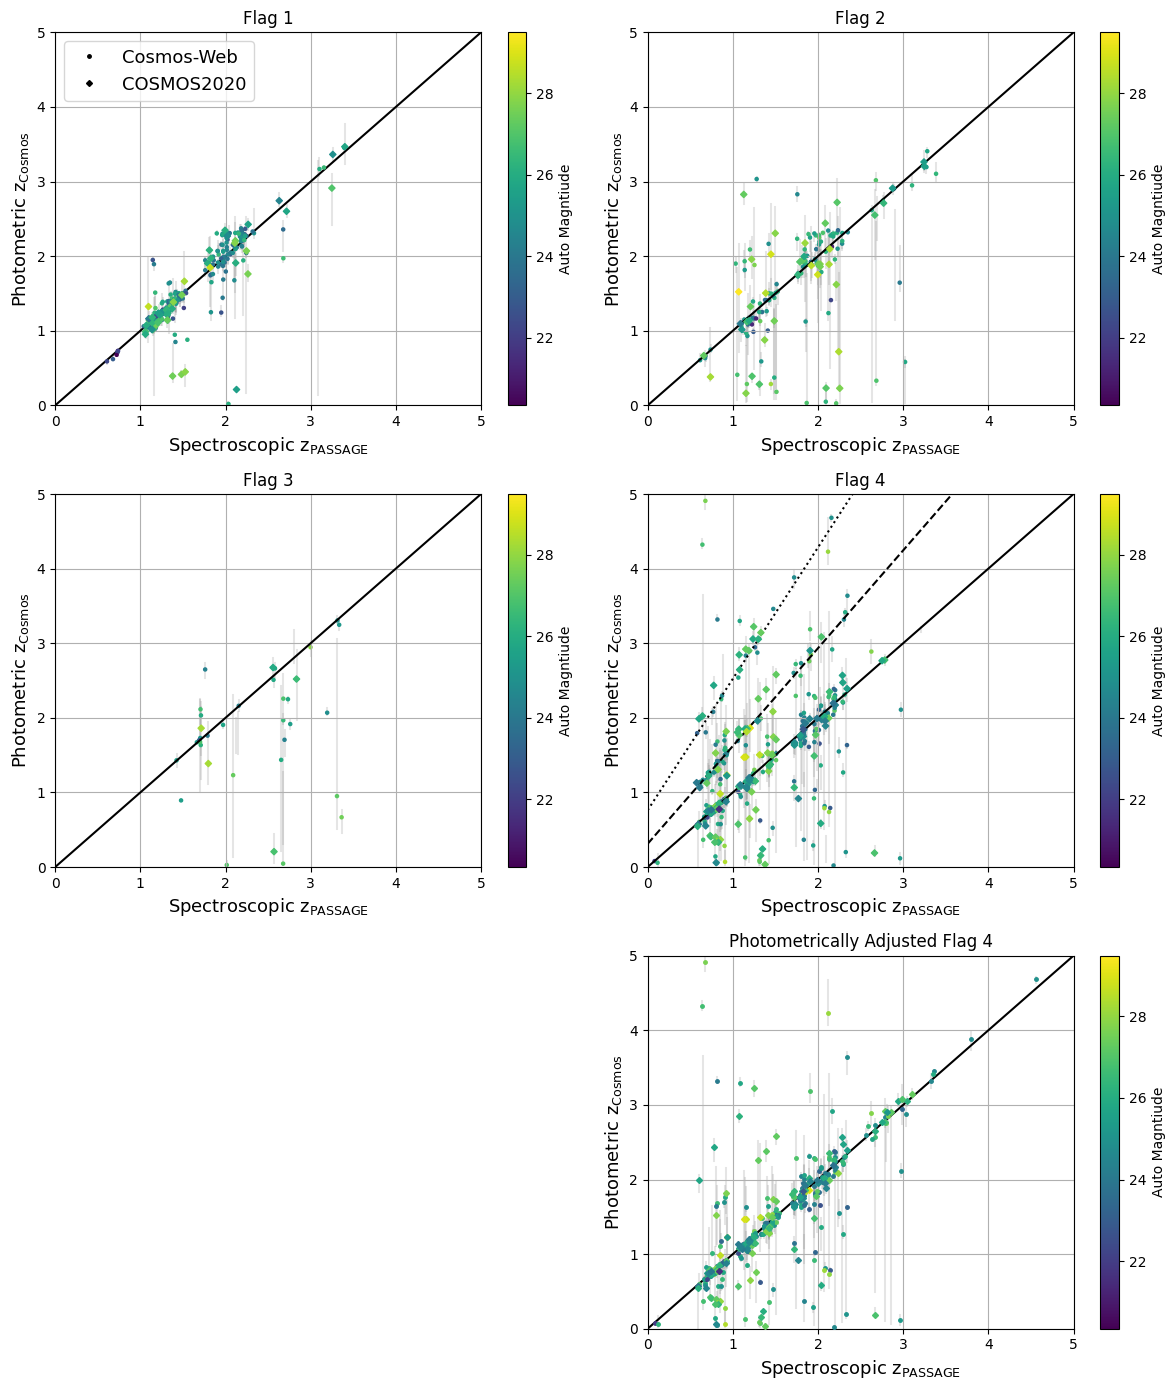

In [486]:
x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df15['cosmoszlow']))

#print(dz2)

fig, axs = plt.subplots(3, 2,figsize=(12,14))
ax0=axs[0,0]
ax1=axs[0,1]
ax2=axs[1,0]
ax3=axs[1,1]
ax4=axs[2,0]
ax6=axs[2,1]


from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(dz2),vmax=np.max(dz2))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,c=dz,s=5,norm=norm,zorder=99)
fig.colorbar(sp, label='Auto Magntiude')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df11['redshift'],df12['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))

print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,c=dz,marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df15['cosmoszlow']))


x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax1.scatter(x,y,c=dz,s=5,norm=norm)
fig.colorbar(sp, label='Auto Magntiude')
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df11['redshift'],df12['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,c=dz,marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df15['cosmoszlow']))


x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax2.scatter(x,y,c=dz,s=5,norm=norm)
fig.colorbar(sp, label='Auto Magntiude')
ax2.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax2.scatter(x,y,c=dz,marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax2.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df15['cosmoszlow']))



x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax3.scatter(x,y,c=dz,s=5,norm=norm)
fig.colorbar(sp, label='Auto Magntiude')
ax3.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax3.scatter(x,y,c=dz,marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax3.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax3.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax3.plot(x,y,"k:")

ax0.set_title('Flag 1')
ax1.set_title('Flag 2')
ax2.set_title('Flag 3')
ax3.set_title('Flag 4')

ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.plot([0,5],[0,5],"k")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
ax3.plot([0,5],[0,5],"k")
ax6.set_xlim(0,5)
ax6.set_ylim(0,5)
ax6.plot([0,5],[0,5],"k")
ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax0.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=13)
ax1.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax1.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=13)
ax2.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax2.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=13)
ax3.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax3.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=13)
ax6.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=13)
ax6.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=13)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax6.grid()



x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df15['cosmoszlow']))


x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
zpas=x
zcos=y
zcoslow=ylow
zcosup=yup
zpaserr=np.full(len(zpas),0)



from matplotlib import cm
cmap=cm.viridis
#norm=Normalize(vmin=min(dz2), vmax=max(dz2))
o3move=0
o2move=0
nomove=0
for i in range(len(zpas)):
    color=cmap(norm(dz[i]))
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        #if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color=color,alpha=1, markersize=5,zorder=99)
            ax6.plot([y5007,y5007],[zcoslow[i],zcosup[i]],color="gray",alpha=0.2,zorder=0)
            o3move+=1
        #else:
        #    ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
        #    ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
        #    ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
        #    nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        #if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color=color,alpha=1, markersize=5,zorder=99)
            ax6.plot([y3727,y3727],[zcoslow[i],zcosup[i]],color="gray",alpha=0.2,zorder=0)
            #ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color="gray",alpha=0.3,zorder=0))
            o2move+=1
        #else:
        #    ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=1, markersize=5)
        #    ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
        #    ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
        #    nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color=color,alpha=1, markersize=5,zorder=99)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color="gray",alpha=0.2,zorder=0)
            #ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color="gray",alpha=0.2,zorder=0)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
fig.colorbar(sp,ax=ax6, label='Auto Magntiude')




x=np.concatenate((df11['redshift'],df12['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))


x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
yup=np.where(np.isnan(y)==False,yup,-1)
ylow=np.where(np.isnan(y)==False,ylow,-1)
zpas=x
zcos=y
zcoslow=ylow
zcosup=yup
zpaserr=np.full(len(zpas),0)

o3move=0
o2move=0
nomove=0
for i in range(len(zpas)):
    color=cmap(norm(dz[i]))
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#
            ax6.plot(y5007,zcos[i],"D",color=color,alpha=1, markersize=3,zorder=99)
            ax6.plot([y5007,y5007],[zcoslow[i],zcosup[i]],color="gray",alpha=0.2,zorder=0)
            o3move+=1
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
            ax6.plot(y3727,zcos[i],"D",color=color,alpha=1, markersize=3,zorder=99)
            ax6.plot([y3727,y3727],[zcoslow[i],zcosup[i]],color="gray",alpha=0.2,zorder=0)
            o2move+=1
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],"D",color=color,alpha=1, markersize=3,zorder=99)
            #print(zcos[i],zcoslow[i],zcosup[i])
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color="gray",alpha=0.2,zorder=0)
            #ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color="gray",alpha=0.2,zorder=0)
            nomove+=1
    else:
        print(y5007)
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

ax6.set_title('Photometrically Adjusted Flag 4')



ax4.set_visible=False
ax4.axis('off')
ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
ax0.legend(fontsize=13)
plt.tight_layout()


20.34
32.35
20.57
30.02


/tmp/ipykernel_2290997/115191062.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",s=5,norm=norm,zorder=99,label='Flag 1')
/tmp/ipykernel_2290997/115191062.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
/tmp/ipykernel_2290997/115191062.py:84: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="blue",s=5,norm=norm,label='Flag 2')
/tmp/ipykernel_2290997/115191062.py:102: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="blue",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
/tmp/ipykernel_2290997/115191062.py:124: UserWarning: No data for colormapping provided via 'c'. 

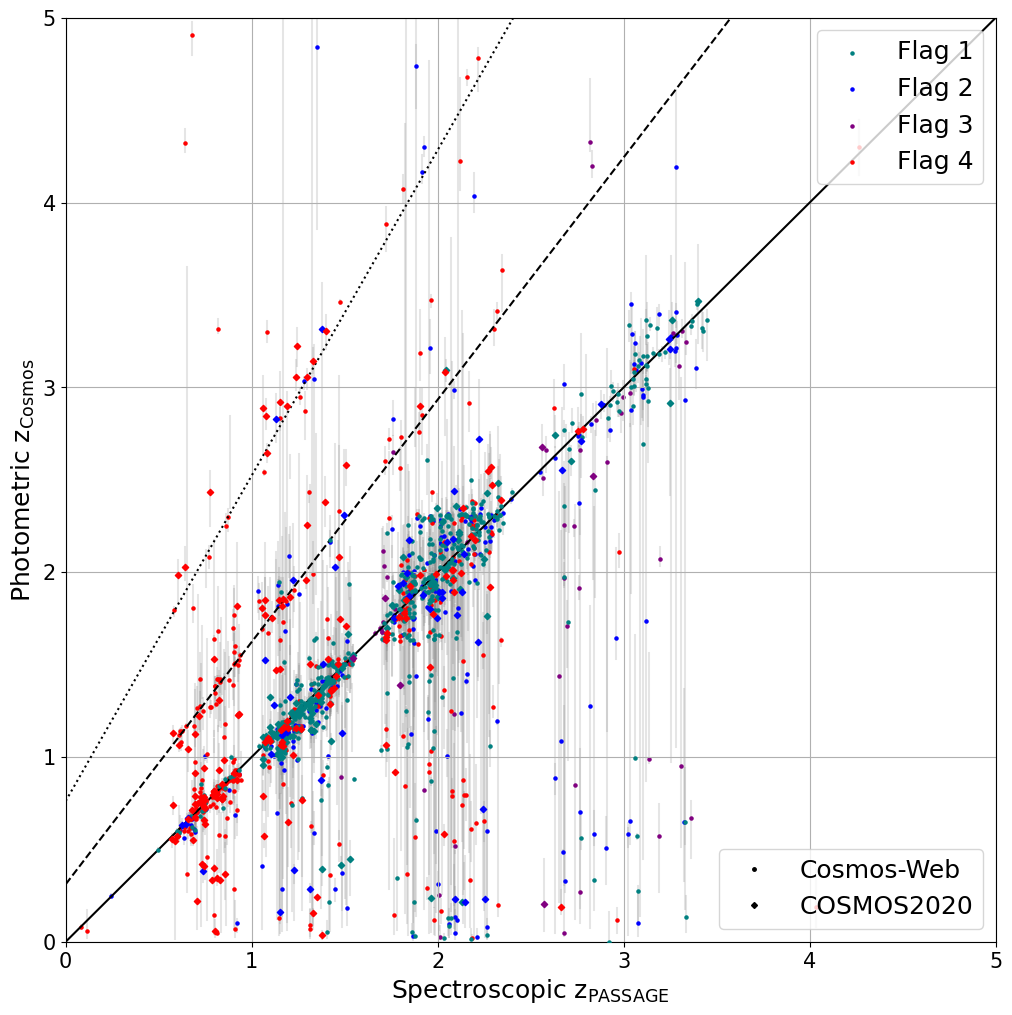

In [547]:
x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))

#print(dz2)

fig, ax0 = plt.subplots(1, 1,figsize=(12,12))




from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(dz2),vmax=np.max(dz2))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="teal",s=5,norm=norm,zorder=99,label='Flag 1')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))

print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="teal",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))


x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="blue",s=5,norm=norm,label='Flag 2')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="blue",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))


x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="purple",s=5,norm=norm,label='Flag 3')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))
x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="purple",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))



x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="r",s=5,norm=norm,label='Flag 4')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))
x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="r",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")



ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)
#plt.legend(fontsize=15)
first_legend = ax0.legend(loc='upper right', fontsize=18)
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax0.add_artist(first_legend)
# Create the second legend
l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)


In [552]:
df9agn=df9[df9['redshift']>4.5]
df9agn

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
70   2038   4.65045             0.0  150.100964  2.419427      24.73   

    a_image_obj  b_image_obj  snr_tot_others   chisq  ...  snr_SIII  \
70       10.027        8.572           78.36  282.76  ...      -1.0   

    emline_flag    cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  \
70            4  150.100969   2.419415  650143.0    -99.0  22.625453   

    cosmoszmed  cosmoszlow  cosmoszup  
70      1.2799        1.27     1.2871  

[1 rows x 301 columns]

min 0.08103
max 4.65045
20.34
32.35
20.57
30.02


/tmp/ipykernel_2290997/531788072.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=99,label='Flag 1',alpha=0.4)
/tmp/ipykernel_2290997/531788072.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  ax0.scatter(df9agn['redshift'],[4.64],color="teal",s=[22.625453],norm=norm,zorder=99,alpha=0.4)
/tmp/ipykernel_2290997/531788072.py:93: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax1.scatter(x,y,color="teal",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
/tmp/ipykernel_2290997/531788072.py:127: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="blue",s=size,norm=norm,label='Flag 2',alpha=0.4)
/tmp/ipykernel_2290997/531788072.py:153: UserWarning: No data for colormapping prov

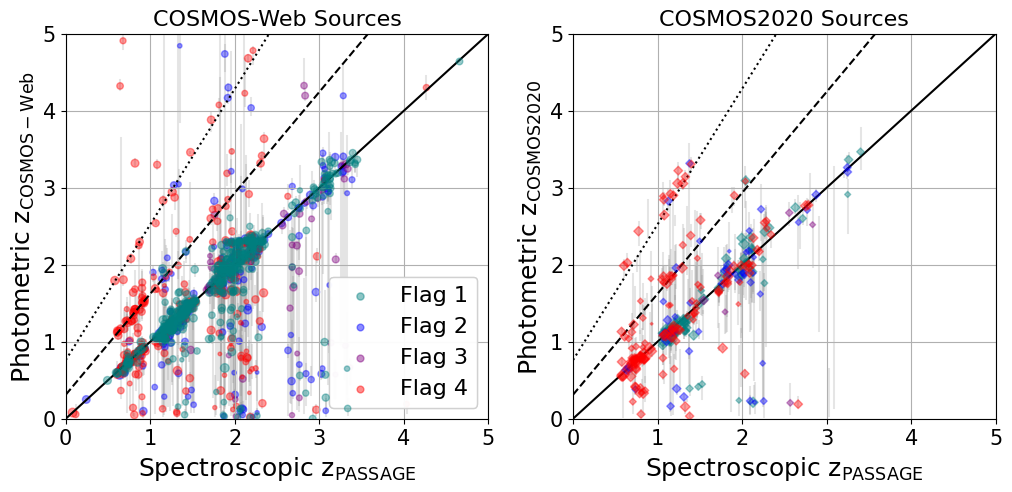

In [574]:
x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))

#print(dz2)
print('min',min(x))
print('max',max(x))

fig, (ax0,ax1) = plt.subplots(1, 2,figsize=(12,5))




from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(dz2),vmax=np.max(dz2))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
#print(size)
#size=np.log10(np.array(size[f==1])/1-20)*10

size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
# = 5 + (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==1]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
#size=np.subtract(size,20)
#print(size)
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="teal",s=size,norm=norm,zorder=99,label='Flag 1',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)

df9agn=df9[df9['redshift']>4.5]
ax0.scatter(df9agn['redshift'],[4.64],color="teal",s=[22.625453],norm=norm,zorder=99,alpha=0.4)
#for jj in df9:
#    if df9==
#650143




x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))

print(np.min(dz2))
print(np.max(dz2))

size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==1]
size=np.where(size<0,0,size)
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="teal",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==2]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="blue",s=size,norm=norm,label='Flag 2',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))


x=x[f==2]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==2]
size=np.where(size<0,0,size)
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="blue",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))

x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
#print(max(size))
#print(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==3]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="purple",s=size,norm=norm,label='Flag 3',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))



x=x[f==3]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==3]
size=np.where(size<0,0,size)
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="purple",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))


x=x[f==4]
size=np.array(dz2)#np.array(size)
size=np.where(size<15,22,size)
#print(dz2)
#prin(min(size))
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
#print(size)
size=size[f==4]
#(size - size.min()+1)**3/50# / (size.max() - size.min())
#size = sizes_norm  + 10
#print(size)
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="r",s=size,norm=norm,label='Flag 4',alpha=0.4)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))


x=x[f==4]
size=np.array(size)
size=np.where(size<15,22,size)
size = 150 - (np.array(size) - min(size)) * (150 - 2) / (max(size) - min(size))
#size = 45 - (np.array(size) - min(size)) * (45 - 5) / (max(size) - min(size))
size=size[f==4]
size=np.where(size<0,0,size)
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax1.scatter(x,y,color="r",marker='D',s=size,norm=norm,zorder=99,alpha=0.4)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax1.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")


x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax1.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax1.plot(x,y,"k:")


ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{COSMOS-Web}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")
ax1.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax1.set_ylabel(r'$\rm Photometric\ z_{COSMOS2020}$', fontsize=18)
ax0.set_title('COSMOS-Web Sources', fontsize=16)
ax1.set_title('COSMOS2020 Sources', fontsize=16)
#plt.title('Flag 4 Only', fontsize=13)
ax1.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)


ax1.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax1.yaxis.set_tick_params(labelsize=15)

#plt.legend(fontsize=15)
first_legend = ax0.legend(fontsize=16,loc='lower right')
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax0.add_artist(first_legend)
# Create the second legend
#l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
#l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
#second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)


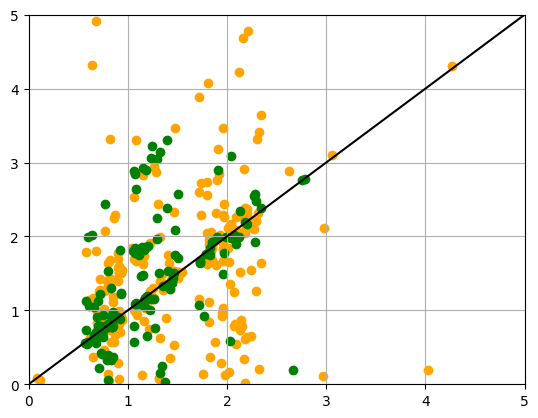

In [571]:
xallzpw=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
yallzcw=np.concatenate((df1['cosmosz'],df2['cosmosz'],df3['cosmosz'],df4['cosmosz'],df5['cosmosz'],df6['cosmosz'],df7['cosmosz'],df9['cosmosz'],df10['cosmosz'],df15['cosmosz']))
xallzp2=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
yallzc2=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
fw=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
f2=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))


xallzpw=xallzpw[fw==4]
yallzcw=yallzcw[fw==4]
xallzp2=xallzp2[f2==4]
yallzc2=yallzc2[f2==4]

plt.scatter(xallzpw,yallzcw,color="orange")
plt.scatter(xallzp2,yallzc2,color="green")
plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([0,5],[0,5],"k")
plt.grid()

In [468]:
df1

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0        8   1.96988         0.00000  150.142174  2.476397      25.52   
1        9   1.97364         0.00025  150.142183  2.476540      24.11   
2       31   0.81933         0.00000  150.143154  2.478128      26.57   
3       91   2.11985         0.00115  150.144131  2.480157      24.91   
4      143   2.13190         0.00000  150.133466  2.481628      24.23   
..     ...       ...             ...         ...       ...        ...   
124   3703   1.42841         0.00177  150.126082  2.517314      25.87   
125   3713   2.28332         0.00099  150.131621  2.517379      24.77   
126   3721   0.59215         0.00041  150.119086  2.517642      25.10   
127   3726   2.29374         0.00209  150.127834  2.517718      25.25   
128   3808   1.32667         0.00000  150.127576  2.518902      21.79   

     a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_SIII  \
0          3.587        2.976            7.33   9.88  ...      -1.0   
1          4.029        2.975           41.54  15.14  ...      -1.0   
2          2.899        2.584            8.65   9.35  ...      -1.0   
3          3.009        2.087           10.53  10.20  ...      -1.0   
4          6.425        3.035            9.00  15.09  ...      -1.0   
..           ...          ...             ...    ...  ...       ...   
124        3.036        2.688            9.20  14.32  ...      -1.0   
125        4.382        3.210            4.47  13.08  ...      -1.0   
126        4.774        2.951            0.00  -5.07  ...      -1.0   
127        4.258        2.594            3.12  10.53  ...      -1.0   
128       12.613       10.496            9.51  21.25  ...      -1.0   

     emline_flag    cosmosra  cosmosdec  cosmosid  cosmosz  cosmosf150mag  \
0              2   -1.000000  -1.000000      -1.0  -1.0000      -1.000000   
1              1  150.142181   2.476513  431674.0   1.6867      23.769703   
2              4  150.143155   2.478125  431943.0   1.6826      26.344396   
3              2  150.144135   2.480148  432297.0   2.3428      25.036664   
4              1  150.133470   2.481622  431949.0   2.1160      23.998338   
..           ...         ...        ...       ...      ...            ...   
124            2  150.126085   2.517304  436410.0   1.5006      25.870429   
125            2  150.131626   2.517370  436749.0   2.1674      24.648877   
126            9  150.119100   2.517639  436079.0   1.0498      24.882427   
127            4  150.127841   2.517710  436589.0   2.2051      25.002403   
128            1  150.127573   2.518894  436785.0   1.1970      21.873958   

     cosmoszmed  cosmoszlow  cosmoszup  
0       -1.0000     -1.0000    -1.0000  
1        1.6867      1.6800     1.7000  
2        1.6826      1.1410     1.9177  
3        2.3428      2.3110     2.3612  
4        2.1160      2.0821     2.1656  
..          ...         ...        ...  
124      1.5006      1.3445     1.6353  
125      2.1674      2.0829     2.2813  
126      1.0498      1.0347     1.0677  
127      2.2051      2.1171     2.3190  
128      1.1970      1.1840     1.3037  

[129 rows x 286 columns]

20.34
32.35
20.57
30.02


/tmp/ipykernel_2290997/2377745379.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",s=5,norm=norm,zorder=99,label='Flag 1')
/tmp/ipykernel_2290997/2377745379.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="teal",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
/tmp/ipykernel_2290997/2377745379.py:84: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="blue",s=5,norm=norm,label='Flag 2')
/tmp/ipykernel_2290997/2377745379.py:102: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  sp=ax0.scatter(x,y,color="blue",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
/tmp/ipykernel_2290997/2377745379.py:124: UserWarning: No data for colormapping provided via 

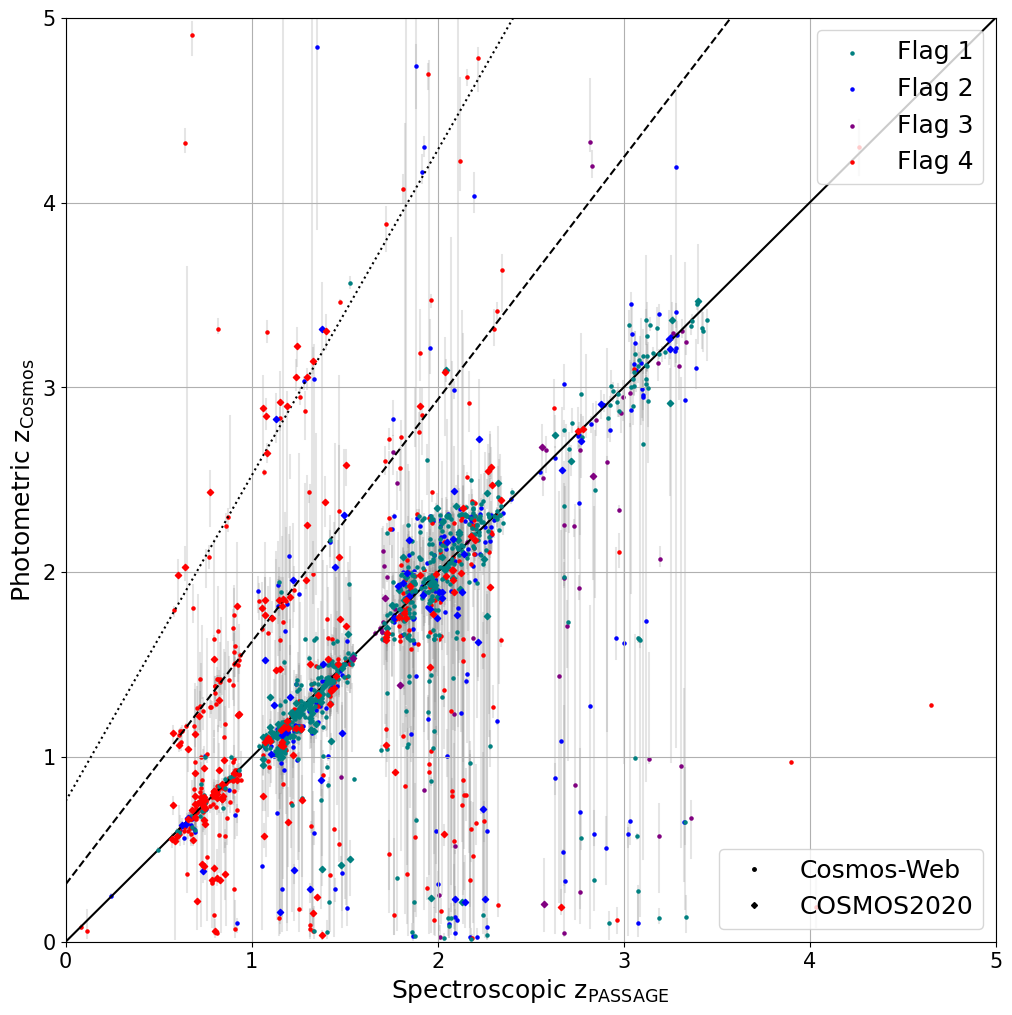

In [561]:
x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmoszmed'],df2['cosmoszmed'],df3['cosmoszmed'],df4['cosmoszmed'],df5['cosmoszmed'],df6['cosmoszmed'],df7['cosmoszmed'],df9['cosmoszmed'],df10['cosmoszmed'],df15['cosmoszmed']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))

#print(dz2)

fig, ax0 = plt.subplots(1, 1,figsize=(12,12))




from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(dz2),vmax=np.max(dz2))
print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]

#for i in range(len(y)):
#    print(x[i],y[i],ylow[i])


yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
####yup=yup[y!=-1
#ylow=ylow[y!=-1]
#y=y##[y!=-1]
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="teal",s=5,norm=norm,zorder=99,label='Flag 1')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))

print(np.min(dz2))
print(np.max(dz2))
x=x[f==1]
yup=yup[f==1]
ylow=ylow[f==1]
y=y[f==1]
dz=dz2[f==1]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="teal",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmoszmed'],df2['cosmoszmed'],df3['cosmoszmed'],df4['cosmoszmed'],df5['cosmoszmed'],df6['cosmoszmed'],df7['cosmoszmed'],df9['cosmoszmed'],df10['cosmoszmed'],df15['cosmoszmed']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))


x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="blue",s=5,norm=norm,label='Flag 2')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))
x=x[f==2]
yup=yup[f==2]
ylow=ylow[f==2]
y=y[f==2]
dz=dz2[f==2]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="blue",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)


x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmoszmed'],df2['cosmoszmed'],df3['cosmoszmed'],df4['cosmoszmed'],df5['cosmoszmed'],df6['cosmoszmed'],df7['cosmoszmed'],df9['cosmoszmed'],df10['cosmoszmed'],df15['cosmoszmed']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))


x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="purple",s=5,norm=norm,label='Flag 3')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))
x=x[f==3]
yup=yup[f==3]
ylow=ylow[f==3]
y=y[f==3]
dz=dz2[f==3]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="purple",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)




x=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift'],df7['redshift'],df9['redshift'],df10['redshift'],df15['redshift']))
y=np.concatenate((df1['cosmoszmed'],df2['cosmoszmed'],df3['cosmoszmed'],df4['cosmoszmed'],df5['cosmoszmed'],df6['cosmoszmed'],df7['cosmoszmed'],df9['cosmoszmed'],df10['cosmoszmed'],df15['cosmoszmed']))
dz2=np.concatenate((df1['f140w_mag'],df2['f140w_mag'],df3['f140w_mag'],df4['f140w_mag'],df5['f140w_mag'],df6['f140w_mag'],df7['f140w_mag'],df9['f140w_mag'],df10['f140w_mag'],df15['f140w_mag']))
f=dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag'],df7['emline_flag'],df9['emline_flag'],df10['emline_flag'],df15['emline_flag']))
yup=np.concatenate((df1['cosmoszup'],df2['cosmoszup'],df3['cosmoszup'],df4['cosmoszup'],df5['cosmoszup'],df6['cosmoszup'],df7['cosmoszup'],df9['cosmoszup'],df10['cosmoszup'],df15['cosmoszup']))
ylow=np.concatenate((df1['cosmoszlow'],df2['cosmoszlow'],df3['cosmoszlow'],df4['cosmoszlow'],df5['cosmoszlow'],df6['cosmoszlow'],df7['cosmoszlow'],df9['cosmoszlow'],df10['cosmoszlow'],df15['cosmoszlow']))
size=np.concatenate((df1['cosmoshst'],df2['cosmoshst'],df3['cosmoshst'],df4['cosmoshst'],df5['cosmoshst'],df6['cosmoshst'],df7['cosmoshst'],df9['cosmoshst'],df10['cosmoshst'],df15['cosmoshst']))
xagn=x


x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
#print(dz)
#f=f[f==1]
sp=ax0.scatter(x,y,color="r",s=5,norm=norm,label='Flag 4')
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.concatenate((df11['redshift'],df12['redshift'],df13['redshift'],df22['redshift'],df52['redshift'],df152['redshift']))
y=np.concatenate((df11['cosmos2020z'],df12['cosmos2020z'],df13['cosmos2020z'],df22['cosmos2020z'],df52['cosmos2020z'],df152['cosmos2020z']))
dz2=np.concatenate((df11['f140w_mag'],df12['f140w_mag'],df13['f140w_mag'],df22['f140w_mag'],df52['f140w_mag'],df152['f140w_mag']))
f=dz=np.concatenate((df11['emline_flag'],df12['emline_flag'],df13['emline_flag'],df22['emline_flag'],df52['emline_flag'],df152['emline_flag']))
yup=np.concatenate((df11['cosmos2020zup'],df12['cosmos2020zup'],df13['cosmos2020zup'],df22['cosmos2020zup'],df52['cosmos2020zup'],df152['cosmos2020zup']))
ylow=np.concatenate((df11['cosmos2020zlow'],df12['cosmos2020zlow'],df13['cosmos2020zlow'],df22['cosmos2020zlow'],df52['cosmos2020zlow'],df152['cosmos2020zlow']))
size=np.concatenate((df11['cosmoshst'],df12['cosmoshst'],df13['cosmoshst'],df22['cosmoshst'],df52['cosmoshst'],df152['cosmoshst']))
x=x[f==4]
yup=yup[f==4]
ylow=ylow[f==4]
y=y[f==4]
dz=dz2[f==4]
yup=np.where(y!=-99,yup,-1)
ylow=np.where(y!=-99,ylow,-1)
sp=ax0.scatter(x,y,color="r",marker='D',s=10,norm=norm,zorder=99)#,facecolors='none',edgecolors=None,linewidths=1.5)
ax0.plot([x,x],[yup,ylow],color="gray",alpha=0.2,zorder=0)



x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax0.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)
y=6565/3727*(1+x)-1
ax0.plot(x,y,"k:")



ax0.set_xlim(0,5)
ax0.set_ylim(0,5)
ax0.plot([0,5],[0,5],"k")

ax0.set_xlabel(r'$\rm Spectroscopic\ z_{PASSAGE}$', fontsize=18)
ax0.set_ylabel(r'$\rm Photometric\ z_{Cosmos}$', fontsize=18)
#plt.title('Flag 4 Only', fontsize=13)
ax0.grid()

ax0.xaxis.set_tick_params(labelsize=15)
# Increase font size for y-axis tick labels on 'ax'
ax0.yaxis.set_tick_params(labelsize=15)
#plt.legend(fontsize=15)
first_legend = ax0.legend(loc='upper right', fontsize=18)
# Add the first legend to the axes as an artist
# This is crucial to prevent it from being overwritten by the second legend
ax0.add_artist(first_legend)
# Create the second legend
l1,=ax0.plot([-1],[-1],'.',color="k",markersize=5,label='Cosmos-Web')
l2,=ax0.plot([-1],[-1],'D',color="k",markersize=3,label='COSMOS2020')
#ax0.legend(fontsize=18)
second_legend = ax0.legend(handles=[l1,l2],loc='lower right', fontsize=18)



In [564]:
xagn[xagn>4]

array([4.65045, 4.26625, 4.03114])

In [563]:
xagn

array([1.96988, 1.97364, 0.81933, ..., 1.83314, 1.72349, 3.20259],
      shape=(1599,))

In [304]:
df52['snr_Ha']

0     24.756098
1      5.647619
2      4.901961
3     14.314516
4     -1.000000
        ...    
78     5.090909
79    10.333333
80     5.061728
81    -1.000000
82    -1.000000
Name: snr_Ha, Length: 69, dtype: float64

In [259]:
print(good)
print(bad)

139
150


In [262]:
139/(139+150)

0.4809688581314879

In [242]:
len(zpas)

69

In [223]:
zpascorrected24

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.3711227581386054),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.4875410425404434),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(2.0541213900539246),
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.2155006590772914),
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.4946606650689036),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [218]:
zy

[np.float64(2.97819),
 np.float64(3.36305),
 np.float64(2.81944),
 np.float64(2.6626),
 np.float64(2.88926),
 np.float64(2.64611),
 np.float64(2.7588),
 np.float64(2.90115),
 np.float64(2.69319),
 np.float64(2.72786),
 np.float64(2.66529),
 np.float64(2.67822),
 np.float64(2.66017),
 np.float64(2.67917),
 np.float64(2.75999),
 np.float64(2.84237),
 np.float64(2.64767),
 np.float64(2.65435),
 np.float64(3.19373),
 np.float64(3.09886),
 np.float64(2.67917),
 np.float64(2.96593),
 np.float64(3.18221),
 np.float64(2.7335),
 np.float64(2.63121),
 np.float64(2.89273),
 np.float64(2.91624),
 np.float64(3.31468),
 np.float64(3.34795),
 np.float64(3.24133),
 np.float64(2.84037),
 np.float64(2.93258),
 np.float64(2.78872),
 np.float64(2.91917),
 np.float64(2.7906),
 np.float64(2.60037),
 np.float64(3.36094),
 np.float64(2.64499),
 np.float64(2.88605),
 np.float64(3.23645),
 np.float64(2.80087),
 np.float64(3.06579),
 np.float64(3.06199),
 np.float64(3.24133),
 np.float64(3.34239),
 np.float64(3.

In [219]:
zx

[np.float64(2.109),
 np.float64(0.6671),
 np.float64(2.5722),
 np.float64(1.7071),
 np.float64(1.8238),
 np.float64(2.4949),
 np.float64(1.9346),
 np.float64(0.9344),
 np.float64(1.7439),
 np.float64(2.7315),
 np.float64(2.6582),
 np.float64(1.9677),
 np.float64(1.4365),
 np.float64(2.6978),
 np.float64(1.9167),
 np.float64(2.8989),
 np.float64(2.5016),
 np.float64(2.6403),
 np.float64(2.0688),
 np.float64(3.0259),
 np.float64(1.9715),
 np.float64(1.645),
 np.float64(2.3869),
 np.float64(2.2493),
 np.float64(2.6168),
 np.float64(2.9051),
 np.float64(2.9792),
 np.float64(3.305),
 np.float64(2.3055),
 np.float64(0.7167),
 np.float64(0.575),
 np.float64(2.9904),
 np.float64(2.8413),
 np.float64(3.0349),
 np.float64(0.7185),
 np.float64(2.3443),
 np.float64(1.1972),
 np.float64(2.3256),
 np.float64(2.9242),
 np.float64(0.2582),
 np.float64(2.8738),
 np.float64(3.0235),
 np.float64(3.0227),
 np.float64(0.8801),
 np.float64(0.0689),
 np.float64(0.9424),
 np.float64(0.9348),
 np.float64(0.351

In [220]:
correlation_matrix = np.corrcoef(zx, zy)
correlation_matrix

array([[1.       , 0.5564148],
       [0.5564148, 1.       ]])

In [172]:
len(dzs)

1524

In [266]:
np.nanmedian(np.abs(dzsogf4))

np.float64(0.2445650000000001)

In [267]:
np.nanmedian(np.abs(dzsogf4c))

np.float64(0.06553486419013382)

In [268]:
np.nanmean(np.abs(dzsogf4))

np.float64(0.5494526449275362)

In [269]:
np.nanmean(np.abs(dzsogf4c))

np.float64(0.38547813545261617)

In [173]:
len(dzs2)

2

In [235]:
sigmanmad=1.48*np.nanmedian(np.abs(dzs-np.nanmedian(dzs)))
sigmanmad

np.float64(0.041416411740410115)

In [182]:
np.nanmedian(dzsog)*2

np.float64(0.15739999999999998)

In [192]:
print(o3move)
print(o2move)
print(nomove)
print('total',o3move+o2move+nomove)

48
13
228
total 289


In [193]:
48/289

0.16608996539792387

In [194]:
13/289

0.04498269896193772

In [ ]:
df['new_column'] = 0

In [227]:
df1

objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0        8   1.96988         0.00000  150.142174  2.476397      25.52   
1        9   1.97364         0.00025  150.142183  2.476540      24.11   
2       31   0.81933         0.00000  150.143154  2.478128      26.57   
3       91   2.11985         0.00115  150.144131  2.480157      24.91   
4      143   2.13190         0.00000  150.133466  2.481628      24.23   
..     ...       ...             ...         ...       ...        ...   
124   3703   1.42841         0.00177  150.126082  2.517314      25.87   
125   3713   2.28332         0.00099  150.131621  2.517379      24.77   
126   3721   0.59215         0.00041  150.119086  2.517642      25.10   
127   3726   2.29374         0.00209  150.127834  2.517718      25.25   
128   3808   1.32667         0.00000  150.127576  2.518902      21.79   

     a_image_obj  b_image_obj  snr_tot_others  chisq  ...  snr_Pb  snr_SIII  \
0          3.587        2.976            7.33   9.88  ...    -1.0      -1.0   
1          4.029        2.975           41.54  15.14  ...    -1.0      -1.0   
2          2.899        2.584            8.65   9.35  ...    -1.0      -1.0   
3          3.009        2.087           10.53  10.20  ...    -1.0      -1.0   
4          6.425        3.035            9.00  15.09  ...    -1.0      -1.0   
..           ...          ...             ...    ...  ...     ...       ...   
124        3.036        2.688            9.20  14.32  ...    -1.0      -1.0   
125        4.382        3.210            4.47  13.08  ...    -1.0      -1.0   
126        4.774        2.951            0.00  -5.07  ...    -1.0      -1.0   
127        4.258        2.594            3.12  10.53  ...    -1.0      -1.0   
128       12.613       10.496            9.51  21.25  ...    -1.0      -1.0   

     emline_flag    cosmosra  cosmosdec  cosmosid  cosmosz  cosmoszmed  \
0              2   -1.000000  -1.000000      -1.0  -1.0000     -1.0000   
1              1  150.142181   2.476513  431674.0   1.6867      1.6867   
2              4  150.143155   2.478125  431943.0   1.6826      1.6826   
3              2  150.144135   2.480148  432297.0   2.3428      2.3428   
4              1  150.133470   2.481622  431949.0   2.1160      2.1160   
..           ...         ...        ...       ...      ...         ...   
124            2  150.126085   2.517304  436410.0   1.5006      1.5006   
125            2  150.131626   2.517370  436749.0   2.1674      2.1674   
126            9  150.119100   2.517639  436079.0   1.0498      1.0498   
127            4  150.127841   2.517710  436589.0   2.2051      2.2051   
128            1  150.127573   2.518894  436785.0   1.1970      1.1970   

     cosmoszlow  cosmoszup  
0       -1.0000    -1.0000  
1        1.6800     1.7000  
2        1.1410     1.9177  
3        2.3110     2.3612  
4        2.0821     2.1656  
..          ...        ...  
124      1.3445     1.6353  
125      2.0829     2.2813  
126      1.0347     1.0677  
127      2.1171     2.3190  
128      1.1840     1.3037  

[129 rows x 285 columns]

In [233]:
df1['z_passage_corrected'] = zpascorrected24
df1.to_csv(' Par024lines_reconciled_with_flags_corrected.dat', sep=' ', index=False, header=False)

In [234]:
file_path_class1 = ' Par024lines_reconciled_with_flags_corrected.dat'
df1mod = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
df1mod

ParserError: Error tokenizing data. C error: Expected 285 fields in line 13, saw 286


In [229]:
len(zpascorrected24)

129

In [224]:

def duplicate_fits_and_add_column(input_fits_file, output_fits_file, column_name, column_data, column_format='D'):
    """
    Duplicates a FITS file and adds a new column to its first table extension.

    Args:
        input_fits_file (str): Path to the input FITS file.
        output_fits_file (str): Path for the new FITS file with the added column.
        column_name (str): Name of the new column to add.
        column_data (array-like): Data for the new column. Must have the same length
                                   as the existing table rows.
        column_format (str, optional): FITS format code for the new column (e.g., 'D' for float64,
                                       'J' for int32, 'A' for string). Defaults to 'D'.
    """
    with fits.open(input_fits_file) as hdulist:
        # Create a new HDUList to store the modified data
        new_hdulist = fits.HDUList()

        # Iterate through existing HDUs and copy them
        for hdu in hdulist:
            if isinstance(hdu, fits.BinTableHDU) or isinstance(hdu, fits.TableHDU):
                # If it's a table HDU, create a new column definition
                # and add it to the existing column definitions
                orig_cols = hdu.columns
                new_col = fits.Column(name=column_name, format=column_format, array=column_data)
                all_cols = orig_cols + new_col
                
                # Create a new BinTableHDU with the updated columns and data
                new_table_hdu = fits.BinTableHDU.from_columns(all_cols, header=hdu.header)
                new_hdulist.append(new_table_hdu)
            else:
                # For other HDU types (e.g., PrimaryHDU), just copy them directly
                new_hdulist.append(hdu)

        # Write the new HDUList to the output file
        new_hdulist.writeto(output_fits_file, overwrite=True)


#file_path_class1 = ' Par024lines_reconciled_with_flags.dat'

# Example Usage:
if __name__ == "__main__":

    # Define the new column data and parameters
    new_column_data = zpascorrected24
    new_column_name = 'z_passage_corrected'
    new_column_format = 'D'  # Double-precision float

    # Duplicate the FITS file and add the new column
    duplicate_fits_and_add_column(' Par024lines_reconciled_with_flags.dat', ' Par024lines_reconciled_with_flags_corrected.dat', 
                                  new_column_name, new_column_data, new_column_format)

    print(f"FITS file 'original.fits' duplicated to 'modified.fits' with a new column '{new_column_name}'.")



OSError: No SIMPLE card found, this file does not appear to be a valid FITS file. If this is really a FITS file, try with ignore_missing_simple=True

In [100]:
hud=fits.open(' v20150922/zCOSMOS_VIMOS_BRIGHT_DR3_CATALOGUE.fits')
hud[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  104 / length of dimension 1                          
NAXIS2  =                20689 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   11 / number of table fields                         
EXTNAME = 'PHASE3CATALOG'                                                       
TTYPE1  = 'OBJECT_ID'          / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TUNIT1  = '' / units for column 1                                               
TCOMM1  = 'zCOSMOS identific

In [108]:
file_path_class1 = ' Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df1 = df1[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df1['Par']  = ['Par024' for _ in range(len(df1))]
file_path_class1 = ' Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df2 = df2[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df2['Par']  = ['Par051' for _ in range(len(df2))]
file_path_class1 = ' Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df3 = df3[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df3['Par']  = ['Par025' for _ in range(len(df3))]
file_path_class1 = ' Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df4 = df4[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df4['Par']  = ['Par023' for _ in range(len(df4))]
file_path_class1 = ' Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df5 = df5[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df5['Par']  = ['Par053' for _ in range(len(df5))]
file_path_class1 = ' Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df6 = df6[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df6['Par']  = ['Par026' for _ in range(len(df6))]
file_path_class1 = ' Par003lines_catalog_matt_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df7 = df7[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df7['Par']  = ['Par003' for _ in range(len(df7))]
file_path_class1 = ' Par028lines_catalog_scarlata_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df8 = df8[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df8['Par']  = ['Par028' for _ in range(len(df8))]
file_path_class1 = ' Par052lines_catalog_vmehta_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df9 = df9[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df9['Par']  = ['Par052' for _ in range(len(df9))]
file_path_class1 = ' Par017lines_catalog_matt_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df10 = df10[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df10['Par']  = ['Par017' for _ in range(len(df10))]
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
df




objid  redshift  redshift_error      ra_obj   dec_obj  snr_tot_others  \
0        8.0   1.96988         0.00000  150.142174  2.476397            7.33   
1        9.0   1.97364         0.00025  150.142183  2.476540           41.54   
2       31.0   0.81933         0.00000  150.143154  2.478128            8.65   
3       91.0   2.11985         0.00115  150.144131  2.480157           10.53   
4      143.0   2.13190         0.00000  150.133466  2.481628            9.00   
...      ...       ...             ...         ...       ...             ...   
1519  4418.0   3.03836         0.00035  150.293398  1.909951           40.10   
1520  4426.0   4.25459         0.00000  150.297944  1.909959           13.66   
1521  4443.0   2.77165         0.00000  150.292938  1.910175            0.00   
1522  4500.0   3.97713         0.02947  150.294710  1.911706            0.00   
1523  4505.0   1.79358         0.00116  150.294814  1.912251            6.34   

        snr_OII   snr_OIII     snr_Hb    snr_Ha  snr_Pb  snr_SIII  \
0      4.067612   8.238994   1.587156 -1.000000    -1.0      -1.0   
1     24.607843  52.884615  11.690141 -1.000000    -1.0      -1.0   
2     -1.000000  -1.000000  -1.000000  8.640646    -1.0      -1.0   
3      3.012912  11.250000   1.484127 -1.000000    -1.0      -1.0   
4      8.907035   9.005848   0.035373 -1.000000    -1.0      -1.0   
...         ...        ...        ...       ...     ...       ...   
1519  -1.000000  45.058448   3.842282 -1.000000    -1.0      -1.0   
1520  16.480000  -1.000000  -1.000000 -1.000000    -1.0      -1.0   
1521  -1.000000   2.723183   2.068441 -1.000000    -1.0      -1.0   
1522   0.059763  -1.000000  -1.000000 -1.000000    -1.0      -1.0   
1523  -1.000000  -1.000000  -1.000000  6.348684    -1.0      -1.0   

      emline_flag     Par  
0             2.0  Par024  
1             1.0  Par024  
2             4.0  Par024  
3             2.0  Par024  
4             1.0  Par024  
...           ...     ...  
1519          2.0  Par017  
1520          4.0  Par017  
1521          4.0  Par017  
1522          9.0  Par017  
1523          4.0  Par017  

[1524 rows x 14 columns]

In [109]:
samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hud[1].data['RAJ2000 ']#dat['ra      ']#.data
cat_y = hud[1].data['DEJ2000 ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.2*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hud[1].data['RAJ2000 '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hud[1].data['DEJ2000 '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt3[sel_samp] = hud[1].data['REDSHIFT'][idx[sel_samp]]

df['zcosmosra']=tt
df['zcosmosdec']=tt2
df['zcosmosredshift']=tt3
df

objid  redshift  redshift_error      ra_obj   dec_obj  snr_tot_others  \
0        8.0   1.96988         0.00000  150.142174  2.476397            7.33   
1        9.0   1.97364         0.00025  150.142183  2.476540           41.54   
2       31.0   0.81933         0.00000  150.143154  2.478128            8.65   
3       91.0   2.11985         0.00115  150.144131  2.480157           10.53   
4      143.0   2.13190         0.00000  150.133466  2.481628            9.00   
...      ...       ...             ...         ...       ...             ...   
1519  4418.0   3.03836         0.00035  150.293398  1.909951           40.10   
1520  4426.0   4.25459         0.00000  150.297944  1.909959           13.66   
1521  4443.0   2.77165         0.00000  150.292938  1.910175            0.00   
1522  4500.0   3.97713         0.02947  150.294710  1.911706            0.00   
1523  4505.0   1.79358         0.00116  150.294814  1.912251            6.34   

        snr_OII   snr_OIII     snr_Hb    snr_Ha  snr_Pb  snr_SIII  \
0      4.067612   8.238994   1.587156 -1.000000    -1.0      -1.0   
1     24.607843  52.884615  11.690141 -1.000000    -1.0      -1.0   
2     -1.000000  -1.000000  -1.000000  8.640646    -1.0      -1.0   
3      3.012912  11.250000   1.484127 -1.000000    -1.0      -1.0   
4      8.907035   9.005848   0.035373 -1.000000    -1.0      -1.0   
...         ...        ...        ...       ...     ...       ...   
1519  -1.000000  45.058448   3.842282 -1.000000    -1.0      -1.0   
1520  16.480000  -1.000000  -1.000000 -1.000000    -1.0      -1.0   
1521  -1.000000   2.723183   2.068441 -1.000000    -1.0      -1.0   
1522   0.059763  -1.000000  -1.000000 -1.000000    -1.0      -1.0   
1523  -1.000000  -1.000000  -1.000000  6.348684    -1.0      -1.0   

      emline_flag     Par  zcosmosra  zcosmosdec  zcosmosredshift  
0             2.0  Par024       -1.0        -1.0             -1.0  
1             1.0  Par024       -1.0        -1.0             -1.0  
2             4.0  Par024       -1.0        -1.0             -1.0  
3             2.0  Par024       -1.0        -1.0             -1.0  
4             1.0  Par024       -1.0        -1.0             -1.0  
...           ...     ...        ...         ...              ...  
1519          2.0  Par017       -1.0        -1.0             -1.0  
1520          4.0  Par017       -1.0        -1.0             -1.0  
1521          4.0  Par017       -1.0        -1.0             -1.0  
1522          9.0  Par017       -1.0        -1.0             -1.0  
1523          4.0  Par017       -1.0        -1.0             -1.0  

[1524 rows x 17 columns]

 ...]

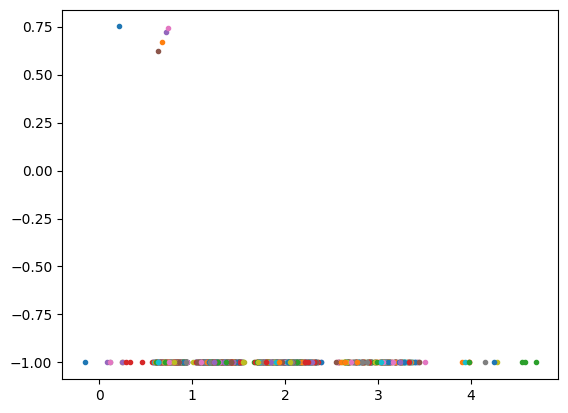

In [148]:
plt.plot([df['redshift']],[df['zcosmosredshift']],".")
#plt.plot([0,1],[0,1],color="k")

In [272]:
fits_file_path=' Par023_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df1 = astropy_table.to_pandas()
df1

hdum=fits.open(fits_file_path)

In [277]:
file_path_class1 = ' Par023lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df1['emline_flag']=tt7

df1
np.unique(tt7)

array([1., 2., 3., 4., 9.])

In [197]:
colstokeep=["index",'ra_obj','dec_obj',"zbest",'emline_flag_best','redshift_error','Par','cosmosid']#,'snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','pb_12822_flux',

#file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
#df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')


dftaby1 = pd.read_csv('passageincosmosweb_finalizedz_forpeter_final.dat', sep='\t')
#dftaby = dftaby[colstokeep]
dftaby1
#dftaby.to_csv('passageincosmosweb_finalizedz_forcosmos_group.dat', sep='\t', index=False)

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
1327     2300  2764.0   2.58084         0.00106  150.111570  1.809054   
1328     2301  2836.0   2.76117         0.00049  150.097342  1.811004   
1329     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
1330     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
1331     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
1327  -1.000000          3.0  Par053   2169  2.580840               3.0   
1328  -1.000000          2.0  Par053   2170  2.761170               2.0   
1329  11.651786          4.0  Par053   2181  1.739150               4.0   
1330  10.322581          4.0  Par053   2182  3.788742               1.5   
1331   6.029963          4.0  Par053   2183  3.351100               1.5   

        cosmosra  cosmosdec  cosmosid  cosmosz  cosmoshst  cosmoszmed  \
0     150.410715   2.384564  511464.0   0.1172  25.211860      0.1172   
1     150.410797   2.384621  511465.0   2.1090  25.216494      2.1090   
2     150.415515   2.387915  512161.0   0.6671  27.743172      0.6671   
3     150.406756   2.387884  511697.0   2.9169  25.966786      2.9169   
4     150.422776   2.389848  512848.0   3.1868  25.964520      3.1868   
...          ...        ...       ...      ...        ...         ...   
1327  150.111577   1.809041  311291.0   2.6624  25.325308      2.6624   
1328  150.097345   1.811002  310970.0   2.7442  26.251591      2.7442   
1329  150.117799   1.806220  311236.0   2.2941  26.928000      2.2941   
1330  150.105874   1.808868  311071.0   3.8818  24.959286      3.8818   
1331  150.108506   1.810472  311327.0   3.4153  25.855949      3.4153   

      cosmoszlow  cosmoszup  
0         0.0454     0.1836  
1         2.0293     2.2053  
2         0.4550     0.7600  
3         2.7610     3.0821  
4         3.0388     3.4203  
...          ...        ...  
1327      2.5409     2.7304  
1328      2.6829     2.8077  
1329      0.2840     2.6514  
1330      3.7380     3.9778  
1331      3.3540     3.4581  

[1332 rows x 20 columns]

In [198]:

dftaby = pd.read_csv('passagezfinal_updatedz_forpeter2.dat')
#dftaby = dftaby[colstokeep]
dftaby#[dftaby['']==]

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  
0     -1.000000          4.0  Par003      0  2.963650               4.0  
1     -1.000000          4.0  Par003      1  2.973340               4.0  
2     -1.000000          3.0  Par003      2  3.363050               3.0  
3      6.531915          4.0  Par003      3  2.166660               4.0  
4      9.038095          4.0  Par003      4  1.907170               4.0  
...         ...          ...     ...    ...       ...               ...  
2178  -1.000000          3.0  Par053   2179  2.855520               3.0  
2179  -1.000000          2.0  Par053   2180  3.244230               2.0  
2180  11.651786          4.0  Par053   2181  1.739150               4.0  
2181  10.322581          4.0  Par053   2182  3.788742               1.5  
2182   6.029963          4.0  Par053   2183  3.351100               1.5  

[2183 rows x 12 columns]

In [199]:
samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = np.array(dftaby1['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftaby1['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = dftaby1['cosmosid'][idx[sel_samp]]
dftaby['cosmosid']=tt7


dftaby

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  
0     511464.0  
1     511465.0  
2     512161.0  
3     511697.0  
4     512848.0  
...        ...  
2178     -99.0  
2179     -99.0  
2180  311236.0  
2181  311071.0  
2182  311327.0  

[2183 rows x 13 columns]

In [210]:
#dfq=df
#dfq=dfq[dfq['cosmosid'] == -1]
#dfq = dfq.reset_index()

samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt3 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

dftaby['cosmos2020id']=tt3

dftaby



level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  cosmos2020id  warn_flag  type  cosmosz  
0     511464.0     1020375.0        0.0   0.0   0.1172  
1     511465.0     1020375.0        0.0   0.0   2.1090  
2     512161.0         -99.0        0.0   0.0   0.6671  
3     511697.0     1023478.0        0.0   0.0   2.9169  
4     512848.0     1025574.0        0.0   0.0   3.1868  
...        ...           ...        ...   ...      ...  
2178     -99.0         -99.0      -99.0 -99.0 -99.0000  
2179     -99.0      398706.0      -99.0 -99.0 -99.0000  
2180  311236.0      402221.0        0.0   0.0   2.2941  
2181  311071.0      405671.0        0.0   0.0   3.8818  
2182  311327.0      406952.0        0.0   0.0   3.4153  

[2183 rows x 17 columns]

In [204]:
samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt45 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt45[sel_samp] = hdu[1].data['warn_flag'][idx[sel_samp]]

tt55 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt55[sel_samp] = hdu2[1].data['type'][idx[sel_samp]]

dftaby['warn_flag']=tt45
dftaby['type']=tt55

dftaby


level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  cosmos2020id  warn_flag  type  
0     511464.0     1020375.0        0.0   0.0  
1     511465.0     1020375.0        0.0   0.0  
2     512161.0         -99.0        0.0   0.0  
3     511697.0     1023478.0        0.0   0.0  
4     512848.0     1025574.0        0.0   0.0  
...        ...           ...        ...   ...  
2178     -99.0         -99.0      -99.0 -99.0  
2179     -99.0      398706.0      -99.0 -99.0  
2180  311236.0      402221.0        0.0   0.0  
2181  311071.0      405671.0        0.0   0.0  
2182  311327.0      406952.0        0.0   0.0  

[2183 rows x 16 columns]

In [205]:
samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = np.array(dftaby1['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftaby1['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = dftaby1['cosmosz'][idx[sel_samp]]
dftaby['cosmosz']=tt7


dftaby

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  cosmos2020id  warn_flag  type  cosmosz  
0     511464.0     1020375.0        0.0   0.0   0.1172  
1     511465.0     1020375.0        0.0   0.0   2.1090  
2     512161.0         -99.0        0.0   0.0   0.6671  
3     511697.0     1023478.0        0.0   0.0   2.9169  
4     512848.0     1025574.0        0.0   0.0   3.1868  
...        ...           ...        ...   ...      ...  
2178     -99.0         -99.0      -99.0 -99.0 -99.0000  
2179     -99.0      398706.0      -99.0 -99.0 -99.0000  
2180  311236.0      402221.0        0.0   0.0   2.2941  
2181  311071.0      405671.0        0.0   0.0   3.8818  
2182  311327.0      406952.0        0.0   0.0   3.4153  

[2183 rows x 17 columns]

In [211]:
samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt3 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt3[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

dftaby['cosmos2020z']=tt3

dftaby



#tt4 = np.ones(shape=(len(np.array(dfq['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  cosmos2020id  warn_flag  type  cosmosz  cosmos2020z  
0     511464.0     1020375.0        0.0   0.0   0.1172       2.2344  
1     511465.0     1020375.0        0.0   0.0   2.1090       2.2344  
2     512161.0         -99.0        0.0   0.0   0.6671     -99.0000  
3     511697.0     1023478.0        0.0   0.0   2.9169       3.1820  
4     512848.0     1025574.0        0.0   0.0   3.1868          NaN  
...        ...           ...        ...   ...      ...          ...  
2178     -99.0         -99.0      -99.0 -99.0 -99.0000     -99.0000  
2179     -99.0      398706.0      -99.0 -99.0 -99.0000       3.2625  
2180  311236.0      402221.0        0.0   0.0   2.2941       0.0510  
2181  311071.0      405671.0        0.0   0.0   3.8818       3.7344  
2182  311327.0      406952.0        0.0   0.0   3.4153       3.5645  

[2183 rows x 18 columns]

In [224]:
newzerr=[]
for jj in range(len(dftaby)):
    if dftaby['zbest'][jj]!=dftaby['redshift'][jj]:
        if dftaby['cosmosz'][jj]!=-99:
            #print(dftaby['zbest'][jj],dftaby['redshift'][jj])
            cosz=dftaby['cosmosz'][jj]
            target = dftaby['redshift'][jj]
            y5007=6564.61/5008.24*(1+target)-1
            y3727=6564.61/3728.485*(1+target)-1
            if np.abs(y5007-cosz)<0.1828051579601147:
                zerr=dftaby['redshift_error'][jj]*6564.61/5008.24
                newzerr.append(zerr)
            elif np.abs(y3727-cosz)<0.1828051579601147:
                #print('her2')
                zerr=dftaby['redshift_error'][jj]*6564.61/3728.485
                newzerr.append(zerr)
            else:
                print('something wrong 1')
        else:
            #print('z2020')
            cosz=dftaby['cosmos2020z'][jj]
            target = dftaby['redshift'][jj]
            y5007=6564.61/5008.24*(1+target)-1
            y3727=6564.61/3728.485*(1+target)-1
            if np.abs(y5007-cosz)<0.1828051579601147:
                zerr=dftaby['redshift_error'][jj]*6564.61/5008.24
                newzerr.append(zerr)
            elif np.abs(y3727-cosz)<0.1828051579601147:
                zerr=dftaby['redshift_error'][jj]*6564.61/3728.485
                newzerr.append(zerr)
            else:
                print('something wrong')
    else:
        newzerr.append(dftaby['redshift_error'][jj])
            
dftaby['zbesterr']=np.array(newzerr)
dftaby

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  cosmos2020id  warn_flag  type  cosmosz  cosmos2020z  zbesterr  
0     511464.0     1020375.0        0.0   0.0   0.1172       2.2344  0.000000  
1     511465.0     1020375.0        0.0   0.0   2.1090       2.2344  0.000000  
2     512161.0         -99.0        0.0   0.0   0.6671     -99.0000  0.001170  
3     511697.0     1023478.0        0.0   0.0   2.9169       3.1820  0.000000  
4     512848.0     1025574.0        0.0   0.0   3.1868          NaN  0.001050  
...        ...           ...        ...   ...      ...          ...       ...  
2178     -99.0         -99.0      -99.0 -99.0 -99.0000     -99.0000  0.001400  
2179     -99.0      398706.0      -99.0 -99.0 -99.0000       3.2625  0.000000  
2180  311236.0      402221.0        0.0   0.0   2.2941       0.0510  0.000960  
2181  311071.0      405671.0        0.0   0.0   3.8818       3.7344  0.000000  
2182  311327.0      406952.0        0.0   0.0   3.4153       3.5645  0.001796  

[2183 rows x 19 columns]

In [227]:
fits_file_path='passagepipe_v0.5_SED_fits_v1.0.0-alpha.fits'
astropy_table = Table.read(fits_file_path)
df77 = astropy_table.to_pandas()
df77#[1].header

samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = np.array(df77['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(df77['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['stellar_mass_50'][idx[sel_samp]]
dftaby['stellar_mass_50']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['stellar_mass_16'][idx[sel_samp]]
dftaby['stellar_mass_16']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['stellar_mass_84'][idx[sel_samp]]
dftaby['stellar_mass_84']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f115wn_err'][idx[sel_samp]]
dftaby['f115wn_err']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f150wn_err'][idx[sel_samp]]
dftaby['f150wn_err']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f200wn_err'][idx[sel_samp]]
dftaby['f200wn_err']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f115wn_flux'][idx[sel_samp]]
dftaby['f115wn_flux']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f150wn_flux'][idx[sel_samp]]
dftaby['f150wn_flux']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f200wn_flux'][idx[sel_samp]]
dftaby['f200wn_flux']=tt7



dftaby

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  ...  zbesterr  stellar_mass_50  \
0     -1.000000          4.0  Par003      0  ...  0.000000         9.317549   
1     -1.000000          4.0  Par003      1  ...  0.000000         9.491844   
2     -1.000000          3.0  Par003      2  ...  0.001170         7.565868   
3      6.531915          4.0  Par003      3  ...  0.000000         8.912856   
4      9.038095          4.0  Par003      4  ...  0.001050         7.988383   
...         ...          ...     ...    ...  ...       ...              ...   
2178  -1.000000          3.0  Par053   2179  ...  0.001400       -99.000000   
2179  -1.000000          2.0  Par053   2180  ...  0.000000       -99.000000   
2180  11.651786          4.0  Par053   2181  ...  0.000960         8.217788   
2181  10.322581          4.0  Par053   2182  ...  0.000000         9.682765   
2182   6.029963          4.0  Par053   2183  ...  0.001796         9.156729   

      stellar_mass_16  stellar_mass_84  f115wn_err  f150wn_err  f200wn_err  \
0            9.294654         9.346128         NaN         NaN    0.005844   
1            9.429039         9.543330         NaN         NaN    0.007531   
2            7.502408         7.673045         NaN         NaN    0.003780   
3            8.700457         9.101561         NaN         NaN    0.005251   
4            7.823332         8.189365         NaN         NaN    0.003552   
...               ...              ...         ...         ...         ...   
2178       -99.000000       -99.000000       -99.0       -99.0  -99.000000   
2179       -99.000000       -99.000000       -99.0       -99.0  -99.000000   
2180         7.918329         8.419031         NaN         NaN    0.007495   
2181         9.532908         9.716319         NaN         NaN    0.010044   
2182         9.108635         9.199459         NaN         NaN    0.006055   

      f115wn_flux  f150wn_flux  f200wn_flux  
0             NaN          NaN     0.542786  
1             NaN          NaN     0.744727  
2             NaN          NaN     0.067803  
3             NaN          NaN     0.364734  
4             NaN          NaN     0.118119  
...           ...          ...          ...  
2178        -99.0        -99.0   -99.000000  
2179        -99.0        -99.0   -99.000000  
2180          NaN          NaN     0.109710  
2181          NaN          NaN     0.883397  
2182          NaN          NaN     0.302137  

[2183 rows x 28 columns]

In [236]:
samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

#sel_samp, idx = count_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)
numbs=count_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

print(np.unique(numbs))
#tt45 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
#tt45[sel_samp] = hdu[1].data['warn_flag'][idx[sel_samp]]

#dftaby['confusion_flag']=tt45


#dftaby




[0 1 2]


In [237]:
samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data
#print(samp_x)

#sel_samp, idx = count_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)
numbs2=count_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

print(np.unique(numbs2))

[0 1]


In [234]:
conf=[]
for kk in numbs:
    #kk1=numbs[kk]
    #kk2=numbs2[kk]
    if kk==1:
        conf.append(0)
    elif kk==2:
        conf.append(1)
    else:
        conf.append(-99)
    #conf.append()


dftaby['confusion_flag']=np.array(conf)
dftaby

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  ...  stellar_mass_50  \
0     -1.000000          4.0  Par003      0  ...         9.317549   
1     -1.000000          4.0  Par003      1  ...         9.491844   
2     -1.000000          3.0  Par003      2  ...         7.565868   
3      6.531915          4.0  Par003      3  ...         8.912856   
4      9.038095          4.0  Par003      4  ...         7.988383   
...         ...          ...     ...    ...  ...              ...   
2178  -1.000000          3.0  Par053   2179  ...       -99.000000   
2179  -1.000000          2.0  Par053   2180  ...       -99.000000   
2180  11.651786          4.0  Par053   2181  ...         8.217788   
2181  10.322581          4.0  Par053   2182  ...         9.682765   
2182   6.029963          4.0  Par053   2183  ...         9.156729   

      stellar_mass_16  stellar_mass_84  f115wn_err  f150wn_err  f200wn_err  \
0            9.294654         9.346128         NaN         NaN    0.005844   
1            9.429039         9.543330         NaN         NaN    0.007531   
2            7.502408         7.673045         NaN         NaN    0.003780   
3            8.700457         9.101561         NaN         NaN    0.005251   
4            7.823332         8.189365         NaN         NaN    0.003552   
...               ...              ...         ...         ...         ...   
2178       -99.000000       -99.000000       -99.0       -99.0  -99.000000   
2179       -99.000000       -99.000000       -99.0       -99.0  -99.000000   
2180         7.918329         8.419031         NaN         NaN    0.007495   
2181         9.532908         9.716319         NaN         NaN    0.010044   
2182         9.108635         9.199459         NaN         NaN    0.006055   

      f115wn_flux  f150wn_flux  f200wn_flux  confusion_flag  
0             NaN          NaN     0.542786               0  
1             NaN          NaN     0.744727               0  
2             NaN          NaN     0.067803               0  
3             NaN          NaN     0.364734               0  
4             NaN          NaN     0.118119               0  
...           ...          ...          ...             ...  
2178        -99.0        -99.0   -99.000000             -99  
2179        -99.0        -99.0   -99.000000             -99  
2180          NaN          NaN     0.109710               0  
2181          NaN          NaN     0.883397               0  
2182          NaN          NaN     0.302137               0  

[2183 rows x 29 columns]

In [246]:

agnlist=[]
for qq in dftaby['type']:
    if qq==2:
        agnlist.append(1)
    elif qq==-99:
        agnlist.append(-99)
    else:
        agnlist.append(0)

#dftaby[dftaby['type']==2]
dftaby['agn_flag']=np.array(agnlist)
dftaby

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index  ...  stellar_mass_16  \
0     -1.000000          4.0  Par003      0  ...         9.294654   
1     -1.000000          4.0  Par003      1  ...         9.429039   
2     -1.000000          3.0  Par003      2  ...         7.502408   
3      6.531915          4.0  Par003      3  ...         8.700457   
4      9.038095          4.0  Par003      4  ...         7.823332   
...         ...          ...     ...    ...  ...              ...   
2178  -1.000000          3.0  Par053   2179  ...       -99.000000   
2179  -1.000000          2.0  Par053   2180  ...       -99.000000   
2180  11.651786          4.0  Par053   2181  ...         7.918329   
2181  10.322581          4.0  Par053   2182  ...         9.532908   
2182   6.029963          4.0  Par053   2183  ...         9.108635   

      stellar_mass_84  f115wn_err  f150wn_err  f200wn_err  f115wn_flux  \
0            9.346128         NaN         NaN    0.005844          NaN   
1            9.543330         NaN         NaN    0.007531          NaN   
2            7.673045         NaN         NaN    0.003780          NaN   
3            9.101561         NaN         NaN    0.005251          NaN   
4            8.189365         NaN         NaN    0.003552          NaN   
...               ...         ...         ...         ...          ...   
2178       -99.000000       -99.0       -99.0  -99.000000        -99.0   
2179       -99.000000       -99.0       -99.0  -99.000000        -99.0   
2180         8.419031         NaN         NaN    0.007495          NaN   
2181         9.716319         NaN         NaN    0.010044          NaN   
2182         9.199459         NaN         NaN    0.006055          NaN   

      f150wn_flux  f200wn_flux  confusion_flag  agn_flag  
0             NaN     0.542786               0         0  
1             NaN     0.744727               0         0  
2             NaN     0.067803               0         0  
3             NaN     0.364734               0         0  
4             NaN     0.118119               0         0  
...           ...          ...             ...       ...  
2178        -99.0   -99.000000             -99       -99  
2179        -99.0   -99.000000             -99       -99  
2180          NaN     0.109710               0         0  
2181          NaN     0.883397               0         0  
2182          NaN     0.302137               0         0  

[2183 rows x 30 columns]

In [248]:
dftaby[dftaby['agn_flag']==1]

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
408       439   334.0   1.73400        0.000560  150.306219  1.875139   
955      1025  2898.0   1.51090        0.000125  150.264900  1.986962   
1248     1337  2038.0   4.65045        0.000000  150.100964  2.419427   
1937     2058  2518.0   1.19803        0.000000  150.145596  2.043054   

         snr_Ha  emline_flag     Par  index  ...  stellar_mass_16  \
408   21.398964          4.0  Par017    408  ...         9.636369   
955   39.534884          1.0  Par025    955  ...        10.667568   
1248  -1.000000          1.0  Par028   1248  ...        11.798839   
1937  74.598071          1.0  Par052   1937  ...        10.209511   

      stellar_mass_84  f115wn_err  f150wn_err  f200wn_err  f115wn_flux  \
408          9.771815         NaN         NaN    0.015832          NaN   
955         10.722024         NaN    0.024496         NaN          NaN   
1248        11.804351    0.012828    0.016231    0.020632     2.608242   
1937        10.307238         NaN    0.046243    0.050254          NaN   

      f150wn_flux  f200wn_flux  confusion_flag  agn_flag  
408           NaN     4.703026               0         1  
955      5.939976          NaN               0         1  
1248     4.425148     6.941269               0         1  
1937    22.600487    27.984386               0         1  

[4 rows x 30 columns]

In [249]:
dftaby.columns

Index(['level_0', 'objid', 'redshift', 'redshift_error', 'ra_obj', 'dec_obj',
       'snr_Ha', 'emline_flag', 'Par', 'index', 'zbest', 'emline_flag_best',
       'cosmosid', 'cosmos2020id', 'warn_flag', 'type', 'cosmosz',
       'cosmos2020z', 'zbesterr', 'stellar_mass_50', 'stellar_mass_16',
       'stellar_mass_84', 'f115wn_err', 'f150wn_err', 'f200wn_err',
       'f115wn_flux', 'f150wn_flux', 'f200wn_flux', 'confusion_flag',
       'agn_flag'],
      dtype='object')

In [260]:
#colstokeep=["index",'ra_obj','dec_obj',"zbest",'emline_flag_best','redshift_error','Par','cosmosid']#
dftaby23 = dftaby.rename(columns={'index': 'id','ra_obj': 'ra','dec_obj': 'dec','emline_flag': 'oldflag','Par':'field','redshift':'zpassagelinefinder','redshift_error':'zpassageerr'})
#dftaby23[colstokeep]
dftaby23 = dftaby23.rename(columns={'emline_flag_best':'emline_flag','cosmosid':'cosmoswebid'})

dftaby23



level_0   objid  zpassagelinefinder  zpassageerr          ra       dec  \
0           0    42.0             2.96365      0.00000  150.410708  2.384564   
1           1    43.0             2.97334      0.00000  150.410795  2.384626   
2           2   146.0             3.36305      0.00117  150.415518  2.387914   
3           3   151.0             2.16666      0.00000  150.406757  2.387887   
4           4   236.0             1.90717      0.00105  150.422767  2.389853   
...       ...     ...                 ...          ...         ...       ...   
2178     2311  2204.0             2.85552      0.00140  150.099152  1.800593   
2179     2312  2379.0             3.24423      0.00000  150.096601  1.802628   
2180     2313  2619.0             1.73915      0.00096  150.117798  1.806238   
2181     2314  2760.0             1.71985      0.00000  150.105879  1.808878   
2182     2315  2820.0             2.31952      0.00137  150.108500  1.810481   

         snr_Ha  oldflag   field    id  ...  stellar_mass_16  stellar_mass_84  \
0     -1.000000      4.0  Par003     0  ...         9.294654         9.346128   
1     -1.000000      4.0  Par003     1  ...         9.429039         9.543330   
2     -1.000000      3.0  Par003     2  ...         7.502408         7.673045   
3      6.531915      4.0  Par003     3  ...         8.700457         9.101561   
4      9.038095      4.0  Par003     4  ...         7.823332         8.189365   
...         ...      ...     ...   ...  ...              ...              ...   
2178  -1.000000      3.0  Par053  2179  ...       -99.000000       -99.000000   
2179  -1.000000      2.0  Par053  2180  ...       -99.000000       -99.000000   
2180  11.651786      4.0  Par053  2181  ...         7.918329         8.419031   
2181  10.322581      4.0  Par053  2182  ...         9.532908         9.716319   
2182   6.029963      4.0  Par053  2183  ...         9.108635         9.199459   

      f115wn_err  f150wn_err  f200wn_err  f115wn_flux  f150wn_flux  \
0            NaN         NaN    0.005844          NaN          NaN   
1            NaN         NaN    0.007531          NaN          NaN   
2            NaN         NaN    0.003780          NaN          NaN   
3            NaN         NaN    0.005251          NaN          NaN   
4            NaN         NaN    0.003552          NaN          NaN   
...          ...         ...         ...          ...          ...   
2178       -99.0       -99.0  -99.000000        -99.0        -99.0   
2179       -99.0       -99.0  -99.000000        -99.0        -99.0   
2180         NaN         NaN    0.007495          NaN          NaN   
2181         NaN         NaN    0.010044          NaN          NaN   
2182         NaN         NaN    0.006055          NaN          NaN   

      f200wn_flux  confusion_flag  agn_flag  
0        0.542786               0         0  
1        0.744727               0         0  
2        0.067803               0         0  
3        0.364734               0         0  
4        0.118119               0         0  
...           ...             ...       ...  
2178   -99.000000             -99       -99  
2179   -99.000000             -99       -99  
2180     0.109710               0         0  
2181     0.883397               0         0  
2182     0.302137               0         0  

[2183 rows x 30 columns]

In [261]:
colstokeep=["id",'ra','dec','field',"zbest",'emline_flag','zbesterr','zpassagelinefinder','zpassageerr','cosmoswebid', 'cosmos2020id','confusion_flag','agn_flag','warn_flag','stellar_mass_50', 'stellar_mass_84',
       'stellar_mass_16','f115wn_flux','f115wn_err',  'f150wn_flux','f150wn_err', 'f200wn_flux', 'f200wn_err']
dftabyfinal=dftaby23[colstokeep]
dftabyfinal
#dftaby23



id          ra       dec   field     zbest  emline_flag  zbesterr  \
0        0  150.410708  2.384564  Par003  2.963650          4.0  0.000000   
1        1  150.410795  2.384626  Par003  2.973340          4.0  0.000000   
2        2  150.415518  2.387914  Par003  3.363050          3.0  0.001170   
3        3  150.406757  2.387887  Par003  2.166660          4.0  0.000000   
4        4  150.422767  2.389853  Par003  1.907170          4.0  0.001050   
...    ...         ...       ...     ...       ...          ...       ...   
2178  2179  150.099152  1.800593  Par053  2.855520          3.0  0.001400   
2179  2180  150.096601  1.802628  Par053  3.244230          2.0  0.000000   
2180  2181  150.117798  1.806238  Par053  1.739150          4.0  0.000960   
2181  2182  150.105879  1.808878  Par053  3.788742          1.5  0.000000   
2182  2183  150.108500  1.810481  Par053  3.351100          1.5  0.001796   

      zpassagelinefinder  zpassageerr  cosmoswebid  ...  warn_flag  \
0                2.96365      0.00000     511464.0  ...        0.0   
1                2.97334      0.00000     511465.0  ...        0.0   
2                3.36305      0.00117     512161.0  ...        0.0   
3                2.16666      0.00000     511697.0  ...        0.0   
4                1.90717      0.00105     512848.0  ...        0.0   
...                  ...          ...          ...  ...        ...   
2178             2.85552      0.00140        -99.0  ...      -99.0   
2179             3.24423      0.00000        -99.0  ...      -99.0   
2180             1.73915      0.00096     311236.0  ...        0.0   
2181             1.71985      0.00000     311071.0  ...        0.0   
2182             2.31952      0.00137     311327.0  ...        0.0   

      stellar_mass_50  stellar_mass_84  stellar_mass_16  f115wn_flux  \
0            9.317549         9.346128         9.294654          NaN   
1            9.491844         9.543330         9.429039          NaN   
2            7.565868         7.673045         7.502408          NaN   
3            8.912856         9.101561         8.700457          NaN   
4            7.988383         8.189365         7.823332          NaN   
...               ...              ...              ...          ...   
2178       -99.000000       -99.000000       -99.000000        -99.0   
2179       -99.000000       -99.000000       -99.000000        -99.0   
2180         8.217788         8.419031         7.918329          NaN   
2181         9.682765         9.716319         9.532908          NaN   
2182         9.156729         9.199459         9.108635          NaN   

      f115wn_err  f150wn_flux  f150wn_err  f200wn_flux  f200wn_err  
0            NaN          NaN         NaN     0.542786    0.005844  
1            NaN          NaN         NaN     0.744727    0.007531  
2            NaN          NaN         NaN     0.067803    0.003780  
3            NaN          NaN         NaN     0.364734    0.005251  
4            NaN          NaN         NaN     0.118119    0.003552  
...          ...          ...         ...          ...         ...  
2178       -99.0        -99.0       -99.0   -99.000000  -99.000000  
2179       -99.0        -99.0       -99.0   -99.000000  -99.000000  
2180         NaN          NaN         NaN     0.109710    0.007495  
2181         NaN          NaN         NaN     0.883397    0.010044  
2182         NaN          NaN         NaN     0.302137    0.006055  

[2183 rows x 23 columns]

In [262]:
dftabyfinal.to_csv('passageincosmos15fields2.dat', sep='\t', index=False)


In [255]:
dftabyfinal=dftaby23[colstokeep]
dftabyfinal

id          ra       dec   field     zbest  emline_flag  \
0        0  150.410708  2.384564  Par003  2.963650          4.0   
1        1  150.410795  2.384626  Par003  2.973340          4.0   
2        2  150.415518  2.387914  Par003  3.363050          3.0   
3        3  150.406757  2.387887  Par003  2.166660          4.0   
4        4  150.422767  2.389853  Par003  1.907170          4.0   
...    ...         ...       ...     ...       ...          ...   
2178  2179  150.099152  1.800593  Par053  2.855520          3.0   
2179  2180  150.096601  1.802628  Par053  3.244230          2.0   
2180  2181  150.117798  1.806238  Par053  1.739150          4.0   
2181  2182  150.105879  1.808878  Par053  3.788742          1.5   
2182  2183  150.108500  1.810481  Par053  3.351100          1.5   

      zpassagelinefinder  zpassageerr  cosmoswebid  cosmos2020id  ...  \
0                2.96365      0.00000     511464.0     1020375.0  ...   
1                2.97334      0.00000     511465.0     1020375.0  ...   
2                3.36305      0.00117     512161.0         -99.0  ...   
3                2.16666      0.00000     511697.0     1023478.0  ...   
4                1.90717      0.00105     512848.0     1025574.0  ...   
...                  ...          ...          ...           ...  ...   
2178             2.85552      0.00140        -99.0         -99.0  ...   
2179             3.24423      0.00000        -99.0      398706.0  ...   
2180             1.73915      0.00096     311236.0      402221.0  ...   
2181             1.71985      0.00000     311071.0      405671.0  ...   
2182             2.31952      0.00137     311327.0      406952.0  ...   

      warn_flag  stellar_mass_50  stellar_mass_84  stellar_mass_16  \
0           0.0         9.317549         9.346128         9.294654   
1           0.0         9.491844         9.543330         9.429039   
2           0.0         7.565868         7.673045         7.502408   
3           0.0         8.912856         9.101561         8.700457   
4           0.0         7.988383         8.189365         7.823332   
...         ...              ...              ...              ...   
2178      -99.0       -99.000000       -99.000000       -99.000000   
2179      -99.0       -99.000000       -99.000000       -99.000000   
2180        0.0         8.217788         8.419031         7.918329   
2181        0.0         9.682765         9.716319         9.532908   
2182        0.0         9.156729         9.199459         9.108635   

      f115wn_err  f150wn_err  f200wn_err  f115wn_flux  f150wn_flux  \
0            NaN         NaN    0.005844          NaN          NaN   
1            NaN         NaN    0.007531          NaN          NaN   
2            NaN         NaN    0.003780          NaN          NaN   
3            NaN         NaN    0.005251          NaN          NaN   
4            NaN         NaN    0.003552          NaN          NaN   
...          ...         ...         ...          ...          ...   
2178       -99.0       -99.0  -99.000000        -99.0        -99.0   
2179       -99.0       -99.0  -99.000000        -99.0        -99.0   
2180         NaN         NaN    0.007495          NaN          NaN   
2181         NaN         NaN    0.010044          NaN          NaN   
2182         NaN         NaN    0.006055          NaN          NaN   

      f200wn_flux  
0        0.542786  
1        0.744727  
2        0.067803  
3        0.364734  
4        0.118119  
...           ...  
2178   -99.000000  
2179   -99.000000  
2180     0.109710  
2181     0.883397  
2182     0.302137  

[2183 rows x 22 columns]

In [228]:
dftaby[dftaby['Par']=='Par028']

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
1179     1267     4.0   1.74457         0.00000  150.098489  2.395111   
1180     1268    18.0   3.18420         0.00104  150.097108  2.396032   
1181     1269    53.0   1.87000         0.00039  150.096164  2.396819   
1182     1271    86.0   1.86508         0.00000  150.099853  2.398299   
1183     1272    87.0   1.86340         0.00027  150.093976  2.398366   
...       ...     ...       ...             ...         ...       ...   
1459     1550  1807.0   2.19207         0.00067  150.071519  2.417384   
1460     1551  2317.0   3.13699         0.00066  150.071107  2.422020   
1461     1552  2319.0   2.09056         0.00159  150.071326  2.422132   
1462     1553  1661.0   1.53912         0.00000  150.095002  2.416386   
1463     1554  2178.0   2.10774         0.00000  150.090577  2.421087   

         snr_Ha  emline_flag     Par  index  ...  zbesterr  stellar_mass_50  \
1179  11.496063          4.0  Par028   1179  ...   0.00000         7.602980   
1180  -1.000000          3.0  Par028   1180  ...   0.00104         7.664370   
1181  10.422374          1.0  Par028   1181  ...   0.00039         9.273411   
1182   9.541284          1.0  Par028   1182  ...   0.00000         9.102406   
1183  20.843373          1.0  Par028   1183  ...   0.00027         8.673861   
...         ...          ...     ...    ...  ...       ...              ...   
1459   1.985915          2.0  Par028   1459  ...   0.00067         8.418174   
1460  -1.000000          3.0  Par028   1460  ...   0.00066         8.730650   
1461  11.960784          2.0  Par028   1461  ...   0.00159         8.338907   
1462  -1.000000          1.0  Par028   1462  ...   0.00000         8.641592   
1463   7.062500          2.0  Par028   1463  ...   0.00000         8.593732   

      stellar_mass_16  stellar_mass_84  f115wn_err  f150wn_err  f200wn_err  \
1179         7.329146         7.984559    0.002721    0.002811    0.002869   
1180         7.407705         7.918364    0.002383    0.002627    0.002288   
1181         9.225885         9.330343    0.007996    0.008793    0.008684   
1182         9.053814         9.155011    0.005931    0.006659    0.006580   
1183         8.536122         8.854082    0.003957    0.004532    0.003989   
...               ...              ...         ...         ...         ...   
1459         8.199610         8.523650    0.002957    0.003589    0.003265   
1460         8.511378         9.186973    0.003274    0.003409    0.004186   
1461         8.240265         8.537074    0.002283    0.003086    0.003723   
1462         8.592913         8.717362    0.004226    0.004285    0.004103   
1463         8.499736         8.669038    0.004087    0.004551    0.004213   

      f115wn_flux  f150wn_flux  f200wn_flux  
1179     0.031512     0.056562     0.047067  
1180     0.014999     0.021215     0.037137  
1181     0.712953     0.887811     0.949868  
1182     0.449930     0.569803     0.618573  
1183     0.160484     0.235295     0.199927  
...           ...          ...          ...  
1459     0.073694     0.133221     0.113782  
1460     0.065766     0.105704     0.250254  
1461     0.066252     0.116843     0.216000  
1462     0.210871     0.205790     0.214205  
1463     0.140749     0.178257     0.183278  

[285 rows x 28 columns]

In [209]:
0.037*5
0.1828051579601147/5
0.18071541033990154/5

0.03614308206798031

In [201]:
dftaby#[dftaby['cosmosid']!=-99]

level_0   objid  redshift  redshift_error      ra_obj   dec_obj  \
0           0    42.0   2.96365         0.00000  150.410708  2.384564   
1           1    43.0   2.97334         0.00000  150.410795  2.384626   
2           2   146.0   3.36305         0.00117  150.415518  2.387914   
3           3   151.0   2.16666         0.00000  150.406757  2.387887   
4           4   236.0   1.90717         0.00105  150.422767  2.389853   
...       ...     ...       ...             ...         ...       ...   
2178     2311  2204.0   2.85552         0.00140  150.099152  1.800593   
2179     2312  2379.0   3.24423         0.00000  150.096601  1.802628   
2180     2313  2619.0   1.73915         0.00096  150.117798  1.806238   
2181     2314  2760.0   1.71985         0.00000  150.105879  1.808878   
2182     2315  2820.0   2.31952         0.00137  150.108500  1.810481   

         snr_Ha  emline_flag     Par  index     zbest  emline_flag_best  \
0     -1.000000          4.0  Par003      0  2.963650               4.0   
1     -1.000000          4.0  Par003      1  2.973340               4.0   
2     -1.000000          3.0  Par003      2  3.363050               3.0   
3      6.531915          4.0  Par003      3  2.166660               4.0   
4      9.038095          4.0  Par003      4  1.907170               4.0   
...         ...          ...     ...    ...       ...               ...   
2178  -1.000000          3.0  Par053   2179  2.855520               3.0   
2179  -1.000000          2.0  Par053   2180  3.244230               2.0   
2180  11.651786          4.0  Par053   2181  1.739150               4.0   
2181  10.322581          4.0  Par053   2182  3.788742               1.5   
2182   6.029963          4.0  Par053   2183  3.351100               1.5   

      cosmosid  
0     511464.0  
1     511465.0  
2     512161.0  
3     511697.0  
4     512848.0  
...        ...  
2178     -99.0  
2179     -99.0  
2180  311236.0  
2181  311071.0  
2182  311327.0  

[2183 rows x 13 columns]

In [193]:
dftaby = dftaby.rename(columns={'index': 'id'})
dftaby

id      ra_obj   dec_obj     zbest  emline_flag_best  redshift_error  \
0        0  150.410708  2.384564  2.963650               4.0         0.00000   
1        1  150.410795  2.384626  2.973340               4.0         0.00000   
2        2  150.415518  2.387914  3.363050               3.0         0.00117   
3        3  150.406757  2.387887  2.166660               4.0         0.00000   
4        4  150.422767  2.389853  1.907170               4.0         0.00105   
...    ...         ...       ...       ...               ...             ...   
1327  2169  150.111570  1.809054  2.580840               3.0         0.00106   
1328  2170  150.097342  1.811004  2.761170               2.0         0.00049   
1329  2181  150.117798  1.806238  1.739150               4.0         0.00096   
1330  2182  150.105879  1.808878  3.788742               1.5         0.00000   
1331  2183  150.108500  1.810481  3.351100               1.5         0.00137   

         Par  cosmosid  
0     Par003  511464.0  
1     Par003  511465.0  
2     Par003  512161.0  
3     Par003  511697.0  
4     Par003  512848.0  
...      ...       ...  
1327  Par053  311291.0  
1328  Par053  310970.0  
1329  Par053  311236.0  
1330  Par053  311071.0  
1331  Par053  311327.0  

[1332 rows x 8 columns]

In [ ]:

dftaby = pd.read_csv('passagezfinal_updatedz_forpeter2.dat')
#dftaby = dftaby[colstokeep]
#dftaby#[dftaby['']==]

dftaby1 = pd.read_csv('passageincosmosweb_finalizedz_forpeter_final.dat', sep='\t')
#dftaby = dftaby[colstokeep]
#dftaby1


samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = np.array(dftaby1['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftaby1['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = dftaby1['cosmosid'][idx[sel_samp]]
dftaby['cosmosid']=tt7

samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt3 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

dftaby['cosmos2020id']=tt3

samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.3*u.arcsec)

tt45 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt45[sel_samp] = hdu[1].data['warn_flag'][idx[sel_samp]]

tt55 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt55[sel_samp] = hdu2[1].data['type'][idx[sel_samp]]

dftaby['warn_flag']=tt45
dftaby['type']=tt55

newzerr=[]
for jj in range(len(dftaby)):
    if dftaby['zbest'][jj]!=dftaby['redshift'][jj]:
        if dftaby['cosmosz'][jj]!=-99:
            #print(dftaby['zbest'][jj],dftaby['redshift'][jj])
            cosz=dftaby['cosmosz'][jj]
            target = dftaby['redshift'][jj]
            y5007=6564.61/5008.24*(1+target)-1
            y3727=6564.61/3728.485*(1+target)-1
            if np.abs(y5007-cosz)<0.1828051579601147:
                zerr=dftaby['redshift_error'][jj]*6564.61/5008.24
                newzerr.append(zerr)
            elif np.abs(y3727-cosz)<0.1828051579601147:
                #print('her2')
                zerr=dftaby['redshift_error'][jj]*6564.61/3728.485
                newzerr.append(zerr)
            else:
                print('something wrong 1')
        else:
            #print('z2020')
            cosz=dftaby['cosmos2020z'][jj]
            target = dftaby['redshift'][jj]
            y5007=6564.61/5008.24*(1+target)-1
            y3727=6564.61/3728.485*(1+target)-1
            if np.abs(y5007-cosz)<0.1828051579601147:
                zerr=dftaby['redshift_error'][jj]*6564.61/5008.24
                newzerr.append(zerr)
            elif np.abs(y3727-cosz)<0.1828051579601147:
                zerr=dftaby['redshift_error'][jj]*6564.61/3728.485
                newzerr.append(zerr)
            else:
                print('something wrong')
    else:
        newzerr.append(dftaby['redshift_error'][jj])
            
dftaby['zbesterr']=np.array(newzerr)


fits_file_path='passagepipe_v0.5_SED_fits_v1.0.0-alpha.fits'
astropy_table = Table.read(fits_file_path)
df77 = astropy_table.to_pandas()
df77#[1].header

samp_x = np.array(dftaby['ra_obj'])#.data
samp_y = np.array(dftaby['dec_obj'])#.data
cat_x = np.array(df77['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(df77['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['stellar_mass_50'][idx[sel_samp]]
dftaby['stellar_mass_50']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['stellar_mass_16'][idx[sel_samp]]
dftaby['stellar_mass_16']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['stellar_mass_84'][idx[sel_samp]]
dftaby['stellar_mass_84']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f115wn_err'][idx[sel_samp]]
dftaby['f115wn_err']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f150wn_err'][idx[sel_samp]]
dftaby['f150wn_err']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f200wn_err'][idx[sel_samp]]
dftaby['f200wn_err']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f115wn_flux'][idx[sel_samp]]
dftaby['f115wn_flux']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f150wn_flux'][idx[sel_samp]]
dftaby['f150wn_flux']=tt7

tt7 = np.ones(shape=(len(np.array(dftaby['ra_obj'])),)) * (-99)
tt7[sel_samp] = df77['f200wn_flux'][idx[sel_samp]]
dftaby['f200wn_flux']=tt7

conf=[]
for kk in numbs:
    #kk1=numbs[kk]
    #kk2=numbs2[kk]
    if kk==1:
        conf.append(0)
    elif kk==2:
        conf.append(1)
    else:
        conf.append(-99)
    #conf.append()


dftaby['confusion_flag']=np.array(conf)


agnlist=[]
for qq in dftaby['type']:
    if qq==2:
        agnlist.append(1)
    elif qq==-99:
        agnlist.append(-99)
    else:
        agnlist.append(0)

#dftaby[dftaby['type']==2]
dftaby['agn_flag']=np.array(agnlist)

dftaby23 = dftaby.rename(columns={'index': 'id','ra_obj': 'ra','dec_obj': 'dec','emline_flag': 'oldflag','Par':'field','redshift':'zpassagelinefinder','redshift_error':'zpassageerr'})
#dftaby23[colstokeep]
dftaby23 = dftaby23.rename(columns={'emline_flag_best':'emline_flag','cosmosid':'cosmoswebid'})


colstokeep=["id",'ra','dec','field',"zbest",'emline_flag','zbesterr','zpassagelinefinder','zpassageerr','cosmoswebid', 'cosmos2020id','confusion_flag','agn_flag','warn_flag','stellar_mass_50', 'stellar_mass_84',
       'stellar_mass_16','f115wn_err', 'f150wn_err', 'f200wn_err','f115wn_flux', 'f150wn_flux', 'f200wn_flux']
dftabyfinal=dftaby23[colstokeep]
dftabyfinal


dftabyfinal

In [263]:


dfwww = pd.read_csv('passageincosmos15fields.dat',header=0,sep='\t')
dfwww

id          ra       dec   field     zbest  emline_flag  zbesterr  \
0        0  150.410708  2.384564  Par003  2.963650          4.0  0.000000   
1        1  150.410795  2.384626  Par003  2.973340          4.0  0.000000   
2        2  150.415518  2.387914  Par003  3.363050          3.0  0.001170   
3        3  150.406757  2.387887  Par003  2.166660          4.0  0.000000   
4        4  150.422767  2.389853  Par003  1.907170          4.0  0.001050   
...    ...         ...       ...     ...       ...          ...       ...   
2178  2179  150.099152  1.800593  Par053  2.855520          3.0  0.001400   
2179  2180  150.096601  1.802628  Par053  3.244230          2.0  0.000000   
2180  2181  150.117798  1.806238  Par053  1.739150          4.0  0.000960   
2181  2182  150.105879  1.808878  Par053  3.788742          1.5  0.000000   
2182  2183  150.108500  1.810481  Par053  3.351100          1.5  0.001796   

      zpassagelinefinder  zpassageerr  cosmoswebid  ...  warn_flag  \
0                2.96365      0.00000     511464.0  ...        0.0   
1                2.97334      0.00000     511465.0  ...        0.0   
2                3.36305      0.00117     512161.0  ...        0.0   
3                2.16666      0.00000     511697.0  ...        0.0   
4                1.90717      0.00105     512848.0  ...        0.0   
...                  ...          ...          ...  ...        ...   
2178             2.85552      0.00140        -99.0  ...      -99.0   
2179             3.24423      0.00000        -99.0  ...      -99.0   
2180             1.73915      0.00096     311236.0  ...        0.0   
2181             1.71985      0.00000     311071.0  ...        0.0   
2182             2.31952      0.00137     311327.0  ...        0.0   

      stellar_mass_50  stellar_mass_84  stellar_mass_16  f115wn_flux  \
0            9.317549         9.346128         9.294654          NaN   
1            9.491844         9.543330         9.429039          NaN   
2            7.565868         7.673045         7.502408          NaN   
3            8.912856         9.101561         8.700457          NaN   
4            7.988383         8.189365         7.823332          NaN   
...               ...              ...              ...          ...   
2178       -99.000000       -99.000000       -99.000000        -99.0   
2179       -99.000000       -99.000000       -99.000000        -99.0   
2180         8.217788         8.419031         7.918329          NaN   
2181         9.682765         9.716319         9.532908          NaN   
2182         9.156729         9.199459         9.108635          NaN   

      f115wn_err  f150wn_flux  f150wn_err  f200wn_flux  f200wn_err  
0            NaN          NaN         NaN     0.542786    0.005844  
1            NaN          NaN         NaN     0.744727    0.007531  
2            NaN          NaN         NaN     0.067803    0.003780  
3            NaN          NaN         NaN     0.364734    0.005251  
4            NaN          NaN         NaN     0.118119    0.003552  
...          ...          ...         ...          ...         ...  
2178       -99.0        -99.0       -99.0   -99.000000  -99.000000  
2179       -99.0        -99.0       -99.0   -99.000000  -99.000000  
2180         NaN          NaN         NaN     0.109710    0.007495  
2181         NaN          NaN         NaN     0.883397    0.010044  
2182         NaN          NaN         NaN     0.302137    0.006055  

[2183 rows x 23 columns]